### Credit Card Fraud Detection


<hr>
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
<br>
<b>It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways.</b> <br>
In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.
<hr>

#### Understanding and Defining Fraud
Credit card fraud is any dishonest act and behaviour to obtain information without the proper authorization from the account holder for financial gain. Among different ways of frauds, Skimming is the most common one, which is the way of duplicating of information located on the magnetic strip of the card.  Apart from this, the other ways are:

- Manipulation/alteration of genuine cards <br>
- Creation of counterfeit cards<br>
- Stolen/lost credit cards<br>
- Fraudulent telemarketing

<hr>

#### Card Fraud - An Inside Edge
The global general purpose brands-American Express, Diners Club/Discover, JCB, Mastercard, Visa, and UnionPay-combined for `$33.731` trillion or 83.12 percentage of total worldwide card volume (purchases and cash) in 2018.
Gross fraud for the global brand cards amounted to `$24.86` billion in 2018, an increase of 16.9% over `$21.27` billion the previous year.
The global brand cards combined to account for 89.26 percentage of gross fraud losses worldwide for all cards in 2018, up from 88.75 percentage the prior year.
In three years (2023), total payment card volume worldwide is projected to reach `$57.080` trillion and gross card fraud is projected to reach `$35.67` billion.<br>
Issuer losses occurred when criminals took over valid accounts, cards were lost or stolen or counterfeited, new accounts were opened with the intent to commit fraud, accounts were opened using a mix of valid and bogus information (synthetic fraud), cardholders or their family members made purchases and then disputed the charges (friendly fraud), and a few smaller categories.

Account takeover and synthetic fraud losses grew in 2018, helped by the abundance of personally identifiable information (PII) available for sale on the dark web. Both are madle easier for criminals by new credit account applications that originate from mobile devices. Data breaches can provide 100 percentage of the information needed for an account takeover. The theft of healthcare records, which are rich in PII, are a particular problem. Criminals purchase PII, gain access to a valid account, change key details, and have a new card mailed to a different address. Account takeovers can result in a quick loss to fraud.
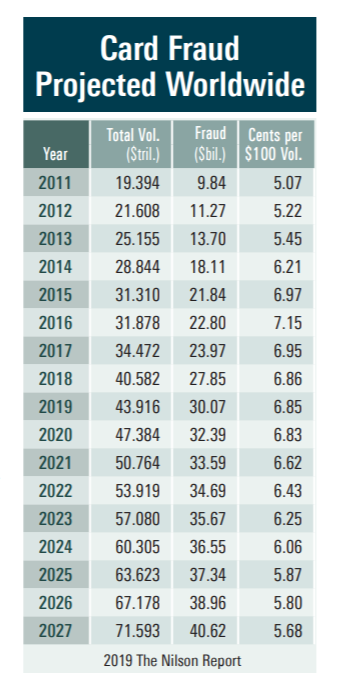

#### Dataset Details
<hr>The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.Due to confidentiality issues,the original features and more background information about the data are not provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. <br> <b> 
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
    <hr>

In [2]:
#Importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from scipy.stats import kurtosis
from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.tree    import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

#Importing the libraries for XGBoost.
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
import time

In [5]:
#To display a max of 40 columns of the dataframe
pd.set_option('display.max_columns',40)

## Data Understanding

In [6]:
#Reading the dataset to the dataframe df
df = pd.read_csv('./creditcard.csv')

In [7]:
#Head of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#Dimension of the dataframe
df.shape

(284807, 31)

We can see that there are around 2,84807 records in the dataframe where each record indicating a credit card transaction and 31 features in hand.

In [9]:
#More information of the data type of the features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can see that all the features in the dataframe are numeric variables. Hence there is no need for conversion from categorical to numeric here in this case. <br>
Also, we can see that, out of the 31 features, 28 features(V1-V28) are the PCA transformed variables as mentioned in the problem statement, hence we dont know which are the base features here. <br>
There are no NULL values present in any of the features,hence no need of any NULL value handling required here. <br>
<b> Since all are numeric values we can go ahead and check for the initial stats of the features.

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


From the above, we can see that the features V1-V28 are the PCA transformed variables and hence are in present in the similar scale. <br>
For the time feature, we can see minimum value is 0 and max is 172792. From the problem statement we know that <b> Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. </b>. So we can cross verify whether the dataset is containing only the transactions of 2 days as mentioned in the problem statement or more. We can check for this in the next cell. <br>
Concering the `Amount` feature, we can see the minimum value is 0 and 75th percentage is 77.16 but the maximum is 25691, hence indicating clear presence of Outliers which we need to deal with. <br>
The target variable with us is `Class`.

In [11]:
#Checking the timeline of the transactions present in the dataframe
max(df['Time'])/(60*60)

47.99777777777778

We can see that 47.99 hours hence the transactions are of 2 days.

## Exploratory Data Analysis

Here we will observe the distribution of our classes

In [12]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

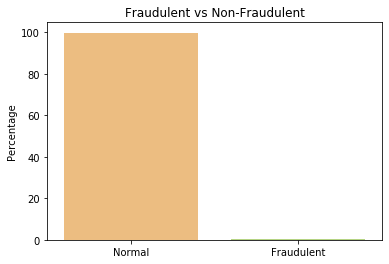

In [13]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
dist_df = pd.DataFrame({'Percentage':[normal_share,fraud_share]},index=['Normal','Fraudulent'])
sns.barplot(x=dist_df.index,y=dist_df['Percentage'],palette='RdYlGn')
plt.title('Fraudulent vs Non-Fraudulent')
plt.show()

In [14]:
dist_df

,Percentage
Normal,99.827251
Fraudulent,0.172749


From the above barplot we can see that, there is clear class imbalance present in the dataset where most of the records are non-fraudulent transactions. <br>
`dist_df` dataframe shows the percentage details for the same. There are only 0.172% of fraudulent records present in the dataset.

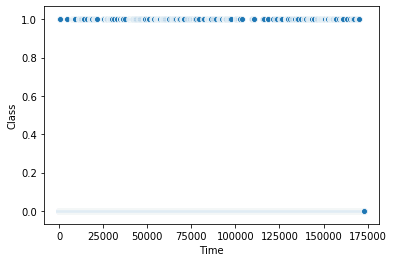

In [15]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=df['Time'],y=df['Class'])
plt.show()

From the above scatter plot between the Class and Time indicates a the fraudulent transactions have happened throughout the given time frame there are no fixed time patterns followed by these fraudulent transactions indicating that the `Time` feature is not an important feature in our dataframe hence can be removed.

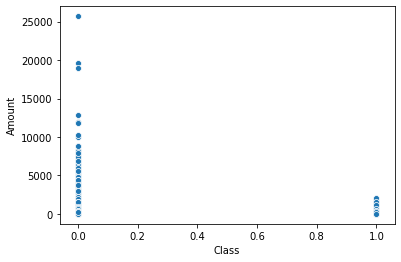

In [16]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df['Class'],y=df['Amount'])
plt.show()

Class 0 which is the non fraudulent transactions have happened for the amounts ranging from 0 to as high as 25000 Euros(Considering the dataset is of transactions of European Card Holders). When we can clearly state transactions more than say, 15000 as outliers, most of the non-fraudulent transactions are in range of 0 to 10000. <br>
<b> At the same time, fraudulent transactions have happened only for smaller amounts - 0 to 5000 Euros. This might be because of the fact that there is increased chance of higher value transactions to be constantly reviewed.

In [17]:
# Drop unnecessary columns
df.drop(['Time'],axis=1,inplace=True)

We dropped the `Time` feature from our dataframe, as said above since there are no value adds this feature presents here. Moreover we couldnt find any time dependent pattern present for the fraudulent transactions.

Now we can go ahead and check for the amount feature. With the Amount vs Class scatter plot we could observe there are pretty some outliers present for the `Amount` feature. Hence we can observe for this with a Boxplot and remove those by making sure we are not removing any important records.

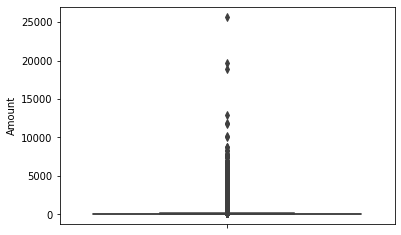

In [18]:
sns.boxplot(y=df['Amount'])
plt.show()

From the Boxplot we could see there are some outliers present. Initially from Scatter, we thought maybe 15,000 might be a good cap, but from here, we think 10,000 might be good cap. To concrete this, let us check how many transactions have happened in these two days for amount value greater than or equal to 10,000. <br>
<b> NOTE: Even if we remove these records, we won't be ending up removing any of the 0.172% of the fraudulent transactions, since we clearly saw from the scatterplot that, all the fraudulent transactions were for the value less than 5000 approx.

In [19]:
df.loc[df['Amount']>=10000]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,-5.533256,1.446695,0.902675,1.746979,2.354131,0.801598,2.068475,1.413407,0.748320,-3.637371,26.237391,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,-5.545590,1.067549,0.832726,1.592166,2.788521,2.569520,2.721505,-0.613875,3.490798,-3.838863,24.133894,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,-8.423404,1.186360,1.879982,3.496723,4.082503,1.406178,0.773133,0.902964,5.041069,-7.213527,39.420904,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,-8.908182,-0.083514,-2.281866,3.739366,5.989210,2.582162,3.032874,0.530779,4.712398,-6.938297,38.117209,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,-5.341249,0.713033,1.361297,1.410760,2.969936,1.441114,1.134212,0.297532,1.340820,-4.392421,23.649095,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
227921,-21.532478,-34.704768,-8.303035,10.264175,3.957175,-3.229695,-4.066768,-4.083971,0.554072,-2.166867,0.939705,3.108922,0.808613,4.109779,3.017039,0.554018,1.174609,0.601035,-4.353679,19.746453,5.198718,-7.331078,-32.828995,0.118986,-8.696627,-1.778061,-0.519786,2.716716,10000.00,0
274771,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,6.853897,-9.189418,7.126883,-6.795942,8.877742,17.315112,-7.173805,-1.968044,5.501747,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,-7.776435,0.214173,-4.499851,0.241005,0.537895,2.901938,2.326099,-0.402142,1.257379,2.008145,2.454553,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [20]:
df.loc[df['Amount']>=10000]['Amount'].count()

8

There are only 8 records with transaction amount greater than or equal to 10,000 Euros. We will go ahead and remove these records.

In [21]:
#Before removing the records
df.shape

(284807, 30)

In [22]:
df = df.loc[df['Amount']<10000]

In [23]:
#We can recheck the stats for the amount column now again, after removing the Outliers.
print(df['Amount'].describe())

count    284799.000000
mean         87.927043
std         235.414278
min           0.000000
25%           5.590000
50%          22.000000
75%          77.150000
max        8790.260000
Name: Amount, dtype: float64


Text(0.5, 1.0, 'Amount distribution for fraudulent transactions')

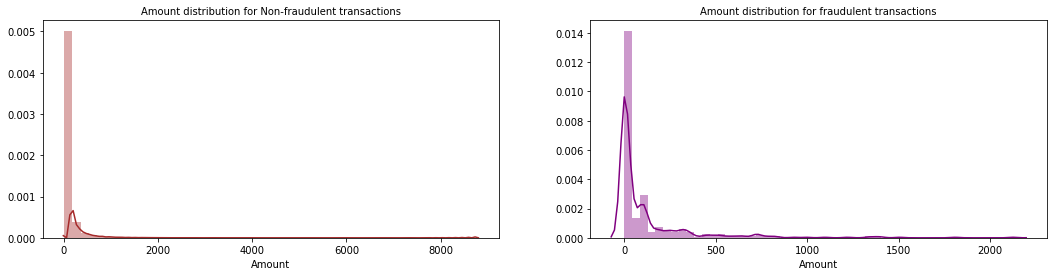

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

#plt.subplot(121)
sns.distplot(df[df['Class']==0]['Amount'],bins=50, ax=ax[0], color='brown')
ax[0].set_title('Amount distribution for Non-fraudulent transactions', fontsize=10)

#plt.subplot(122)
sns.distplot(df[df['Class']==1]['Amount'],bins=50, ax=ax[1], color='purple')
ax[1].set_title('Amount distribution for fraudulent transactions', fontsize=10)

In [25]:
#Finding the Min-Max values for fraudulent and valid transactions after the Outlier Removal.
print('Min amount for a fraudulent transaction:', df[df['Class']==1]['Amount'].min())
print('Max amount for a fraudulent transaction:', df[df['Class']==1]['Amount'].max())
print('Min amount for a valid transaction:', df[df['Class']==0]['Amount'].min())
print('Max amount for a valid transaction:', df[df['Class']==0]['Amount'].max())

Min amount for a fraudulent transaction: 0.0
Max amount for a fraudulent transaction: 2125.87
Min amount for a valid transaction: 0.0
Max amount for a valid transaction: 8790.26


The maximum value now is 8790, but still we could see a need to standardise the Amount column, since this is in not in same range of the columns V1-V28.

We can also observe that there are some transactions with an amount of 0.

In [26]:
print('No of transactions where amount is 0 for fraudulent transactions:', 
      df[(df['Class']==1) & (df['Amount']==0)].shape[0])
print('No of transactions where amount is 0 for valid transactions:', 
      df[(df['Class']==0) & (df['Amount']==0)].shape[0])

No of transactions where amount is 0 for fraudulent transactions: 27
No of transactions where amount is 0 for valid transactions: 1798


We can see 27 transactions which is fraudulent but amount is 0. <font color='red'>Need to see what exactly this means and reason why someone would a $0 transaction</font>

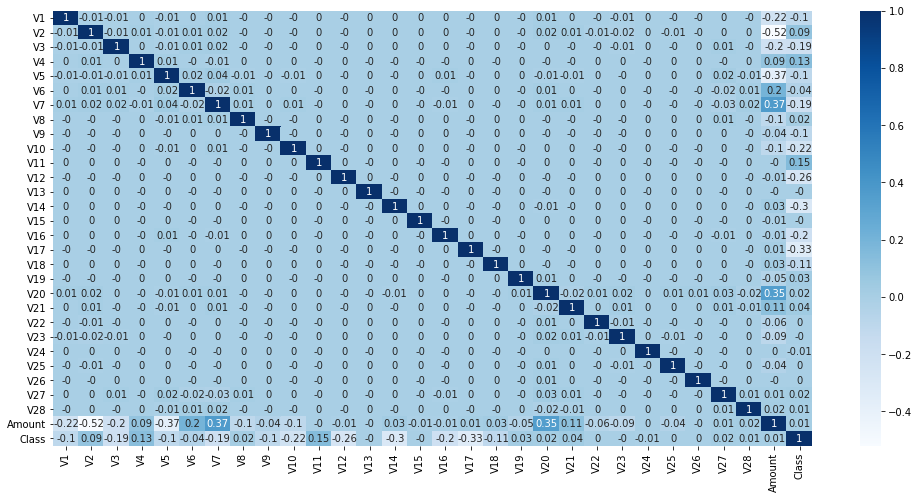

In [27]:
plt.figure(figsize=(17,8))
sns.heatmap(round(df.corr(),2),annot=True,cmap='Blues')
plt.show()

In the heatmap, we are not interested in the correlation between features of V1-V28 since we already know these are PCA transformed variables and hence wont be correlated. Some features like V7 and V20 are somewhat averagely correlated with the Amount feature. There are no columns to be found very correlated with our target variable Class.

In [28]:
#Maintaining a copy of the dataframe
df_copy1 = df.copy()

### Splitting the data into train & test data

In [29]:
X = df.drop(['Class'],axis=1)
y= df['Class']

In [30]:
#Number of Class 1 records
len(y.loc[y==1])

492

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [32]:
X_train.shape

(199359, 29)

In [33]:
X_test.shape

(85440, 29)

In [34]:
y_train.shape

(199359,)

In [35]:
y_test.shape

(85440,)

In [36]:
X_test_copy = X_test.copy()

In [37]:
y_test_copy = y_test.copy()

In [38]:
len(y_train.loc[y==1])

332

In [39]:
len(y_test.loc[y==1])

160

Hence, out of the 492 class 1 records, we are having 332 in our train set while 160 in the test set.

### <font color='red'>Reusable plotting functions:</font> Defining some help functions useful for plotting later

In [40]:
# Defining a function that can be useful for violin plot
def pltViolin(subpltnum,colName,dfObj,hueCol=None):
    if ',' in str(subpltnum):
        nums=str(subpltnum).split(',')
        plt.subplot(int(nums[0]),int(nums[1]),int(nums[2]))
    else:
        plt.subplot(subpltnum)
    if hueCol==None:
        sns.violinplot(y=colName,data=dfObj)
    else:
        sns.violinplot(y=colName,data=dfObj,hue=hueCol)
    
# Defining a function that can be useful for Bar plot
def pltBar(subpltnum,xCol,yCol,dfObj):
    if ',' in str(subpltnum):
        nums=str(subpltnum).split(',')
        plt.subplot(int(nums[0]),int(nums[1]),int(nums[2]))
    else:
        plt.subplot(subpltnum)
    sns.barplot(x=xCol,y=yCol,data=dfObj)

# Defining a function that can be useful for Reg plot
def pltReg(subpltnum,xCol,yCol,dfObj):
    if ',' in str(subpltnum):
        nums=str(subpltnum).split(',')
        plt.subplot(int(nums[0]),int(nums[1]),int(nums[2]))
    else:
        plt.subplot(subpltnum)
    sns.regplot(x=xCol,y=yCol,data=dfObj)

# Defining a function that can be useful for box plot
def pltBox(subpltnum,xCol,yCol,dfObj,hueCol=None):
    if ',' in str(subpltnum):
        nums=str(subpltnum).split(',')
        plt.subplot(int(nums[0]),int(nums[1]),int(nums[2]))
    else:
        plt.subplot(subpltnum)
    if hueCol==None:
        sns.boxplot(x=xCol,y=yCol,data=dfObj)
    else:
        sns.boxplot(x=xCol,y=yCol,data=dfObj,hue=hueCol)
        
def pltCount(subpltnum,colName,dfObj,hueCol=None,orderCol=None):
    if ',' in str(subpltnum):
        nums=str(subpltnum).split(',')
        plt.subplot(int(nums[0]),int(nums[1]),int(nums[2]))
    else:
        plt.subplot(subpltnum)

    if hueCol==None:
        if orderCol == None:
            sns.countplot(x=colName,data=dfObj)
        else:
            sns.countplot(x=colName,data=dfObj,order=dfObj[orderCol].value_counts().index)
    else:
        if orderCol == None:
            sns.countplot(x=colName,data=dfObj,hue=hueCol)
        else:
            sns.countplot(x=colName,data=dfObj,hue=hueCol,order=dfObj[orderCol].value_counts().index)

In [41]:
# plot the histogram of a variable from the dataset to see the skewness

https://www.researchgate.net/post/What_is_the_acceptable_range_of_skewness_and_kurtosis_for_normal_distribution_of_data

It depends on mainly the sample size. Most software packages that compute the skewness and kurtosis, also compute their standard error.
Both
S = skewness/SE(skewness)
and
K = kurtosis/SE(kurtosis)
are, under the null hypothesis of normality, roughly standard normal distributed.
Thus, when |S| > 1.96 the skewness is significantly (alpha=5%) different from zero; the same for |K| > 1.96 and the kurtosis.
To manually compute the standard errors, see the formulae for the variance of skewness and kurtosis (https://en.wikipedia.org/wiki/Skewness, https://en.wikipedia.org/wiki/Kurtosis ) and take the square root.

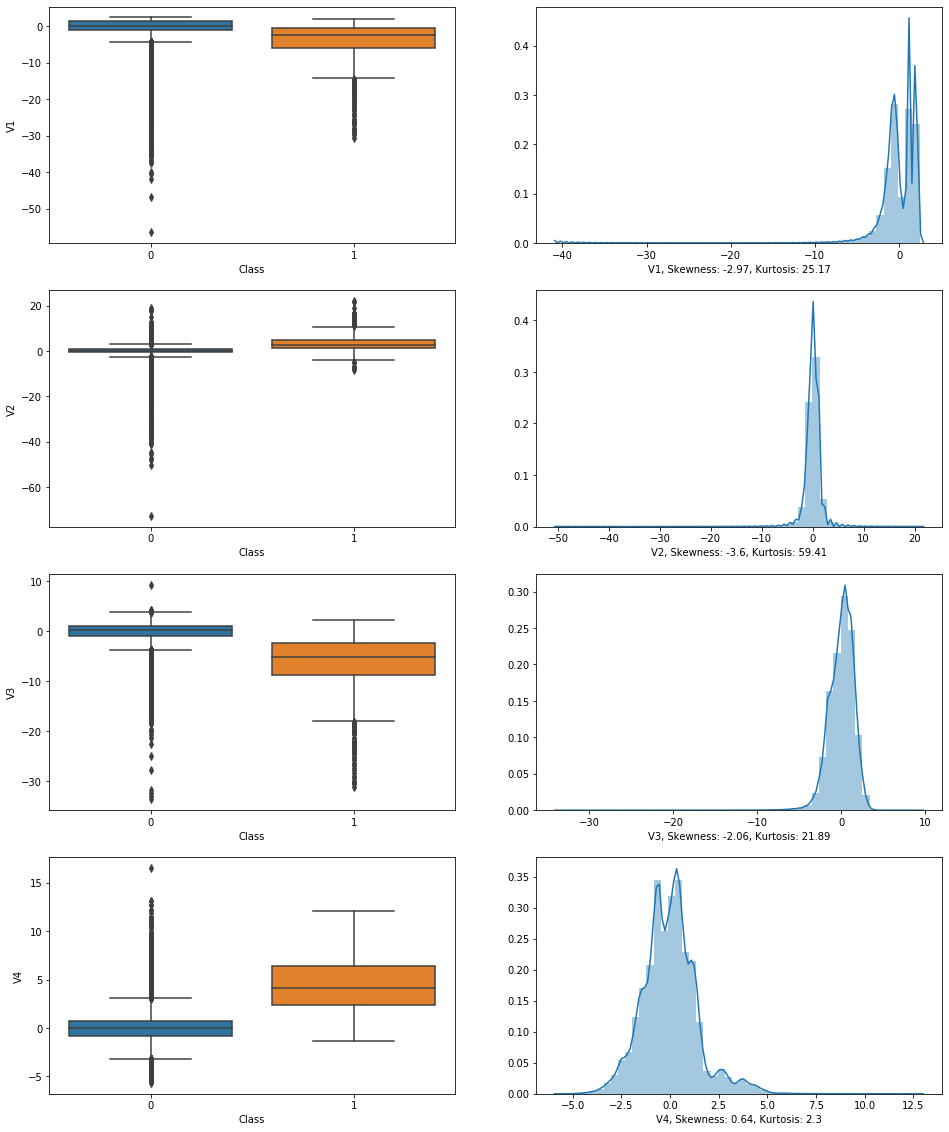

In [42]:
plt.figure(figsize=(16,20))

subplotNum = "4,2,"
pltNum = 1
colNumSuf = 1

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)
    pltBox(pltNo,'Class',col,df)
    
    pltNum = pltNum + 1

    plt.subplot(4,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    
    pltNum = pltNum + 1

Except V4 other 3 components V1 to V3 have high skewness and kurtosis. So we need to perform steps to mitigate skewness

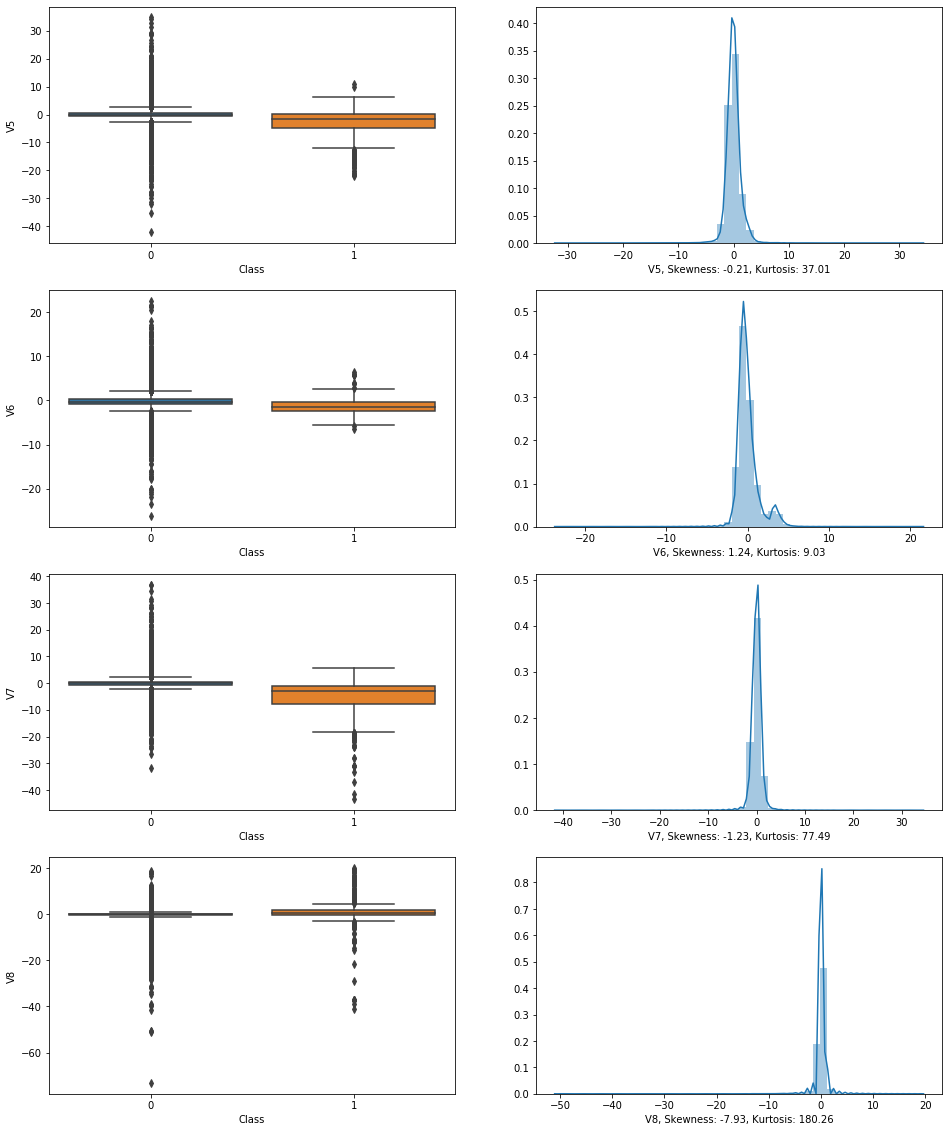

In [43]:
plt.figure(figsize=(16,20))

subplotNum = "4,2,"
pltNum = 1
colNumSuf = 5

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)
    pltBox(pltNo,'Class',col,df)
    
    pltNum = pltNum + 1

    plt.subplot(4,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    
    pltNum = pltNum + 1

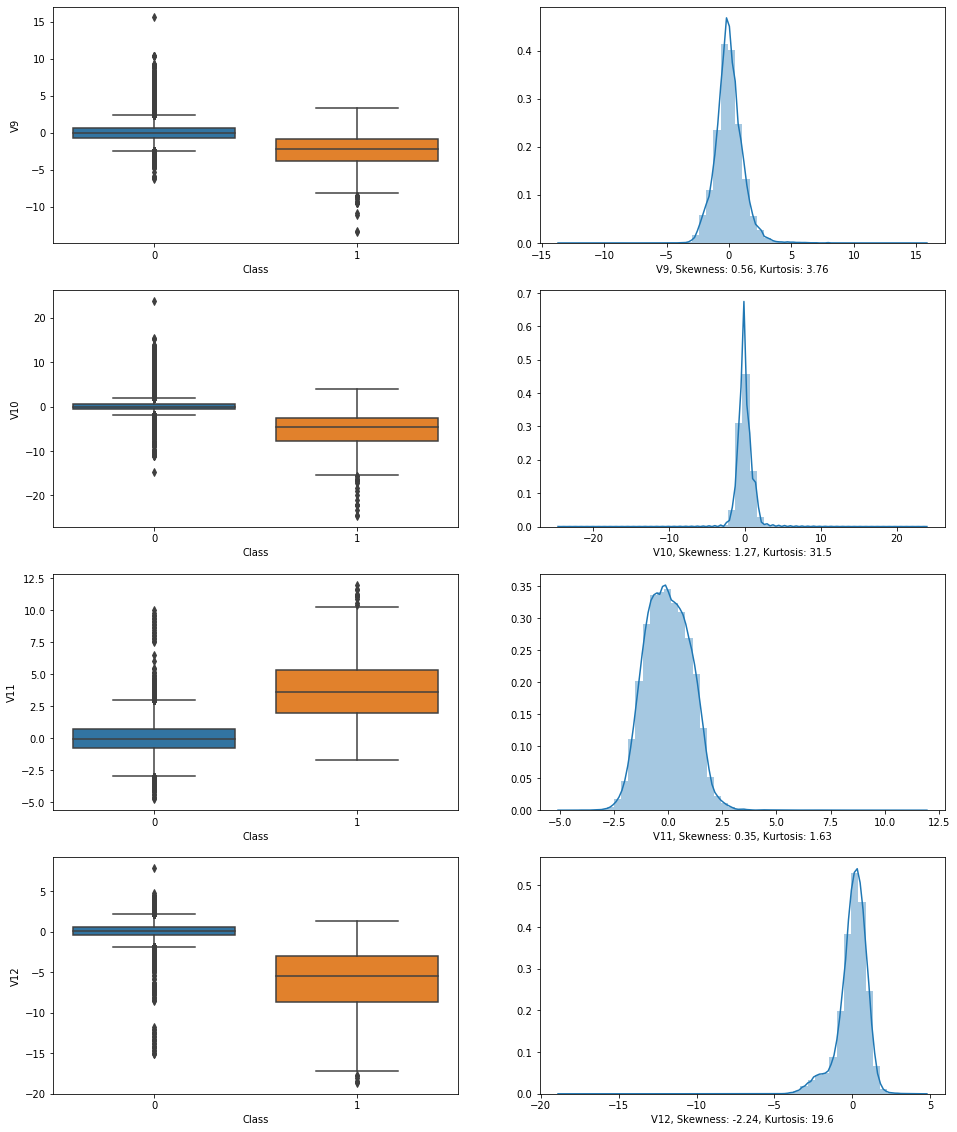

In [44]:
plt.figure(figsize=(16,20))

subplotNum = "4,2,"
pltNum = 1
colNumSuf = 9

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)
    pltBox(pltNo,'Class',col,df)
    
    pltNum = pltNum + 1

    plt.subplot(4,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    
    pltNum = pltNum + 1

V9 and V11 look better

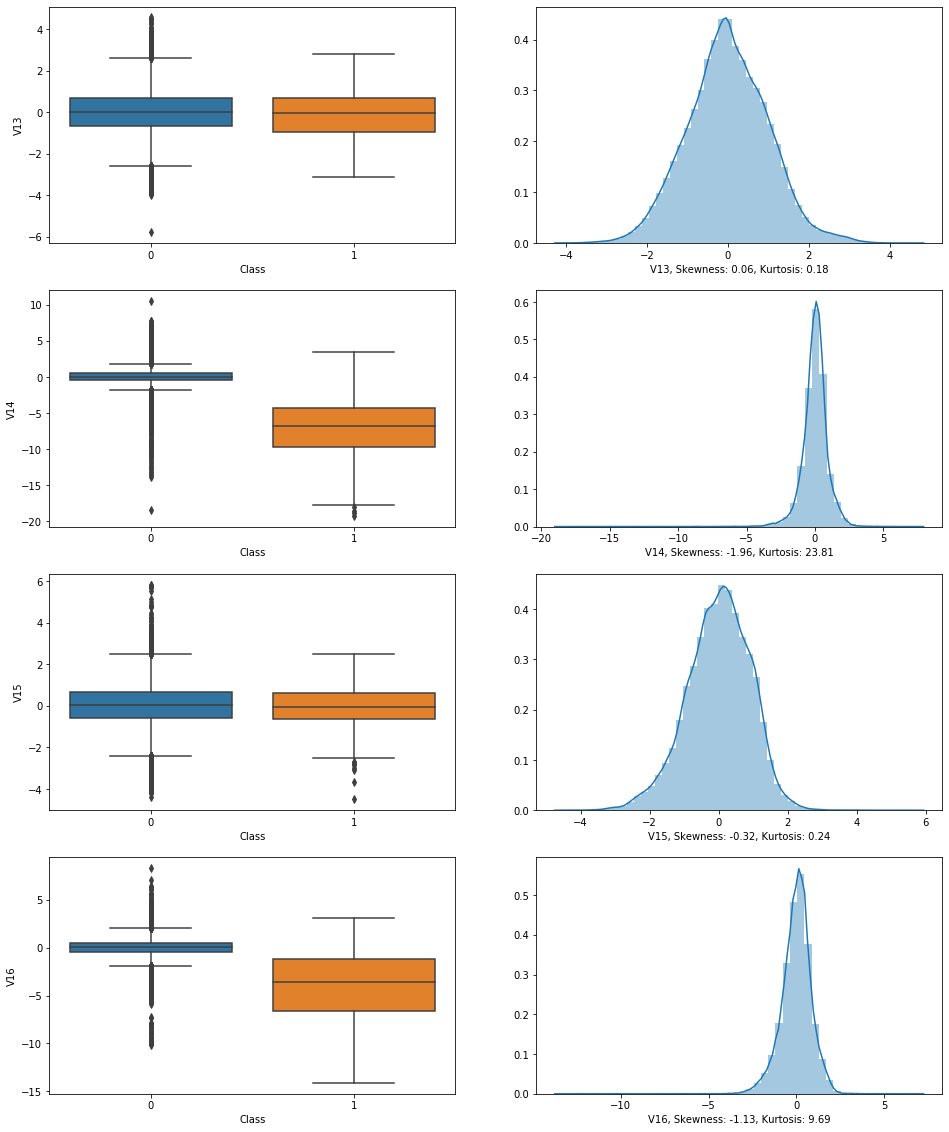

In [45]:
plt.figure(figsize=(16,20))

subplotNum = "4,2,"
pltNum = 1
colNumSuf = 13

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)
    pltBox(pltNo,'Class',col,df)
    
    pltNum = pltNum + 1

    plt.subplot(4,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    
    pltNum = pltNum + 1

V13 and V15 do not have any skewness

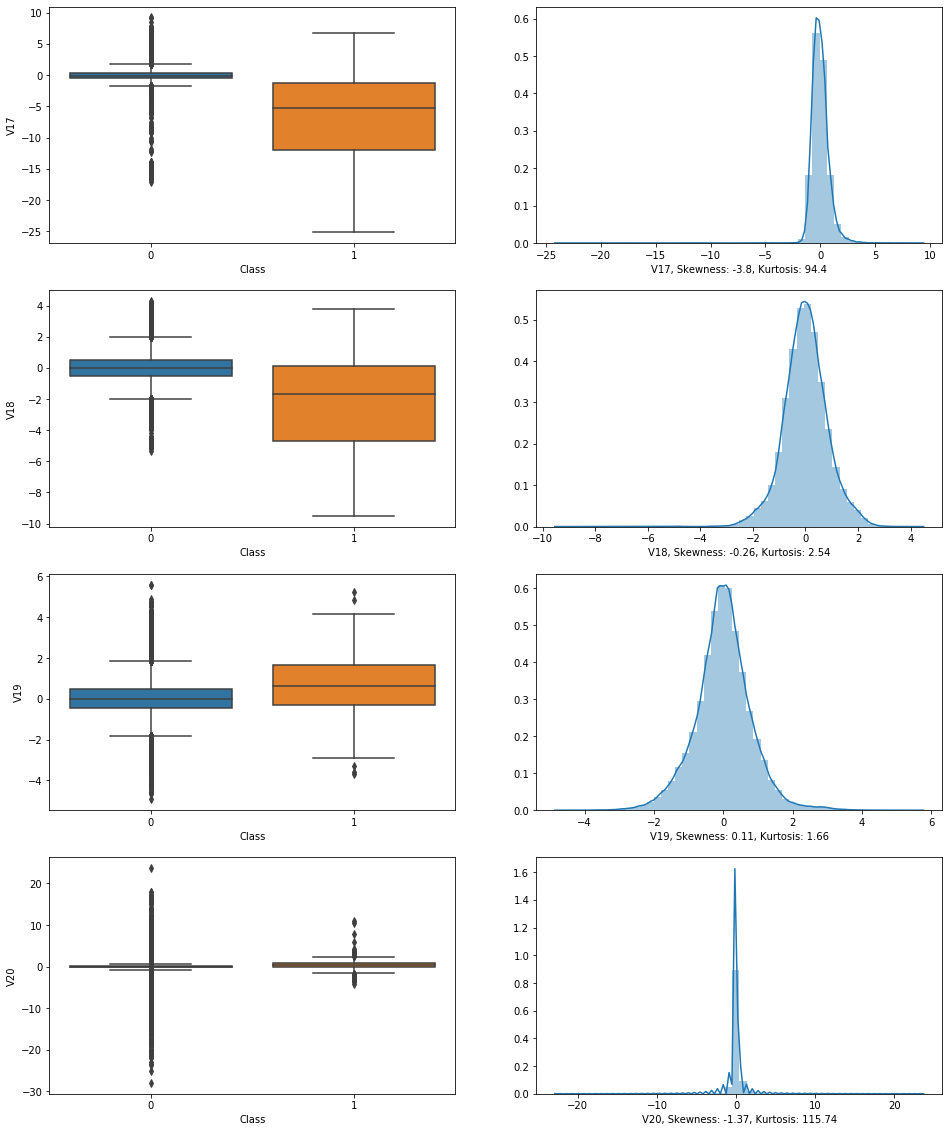

In [46]:
plt.figure(figsize=(16,20))

subplotNum = "4,2,"
pltNum = 1
colNumSuf = 17

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)
    pltBox(pltNo,'Class',col,df)
    
    pltNum = pltNum + 1

    plt.subplot(4,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    
    pltNum = pltNum + 1

V18 and V19 do not have high skewness

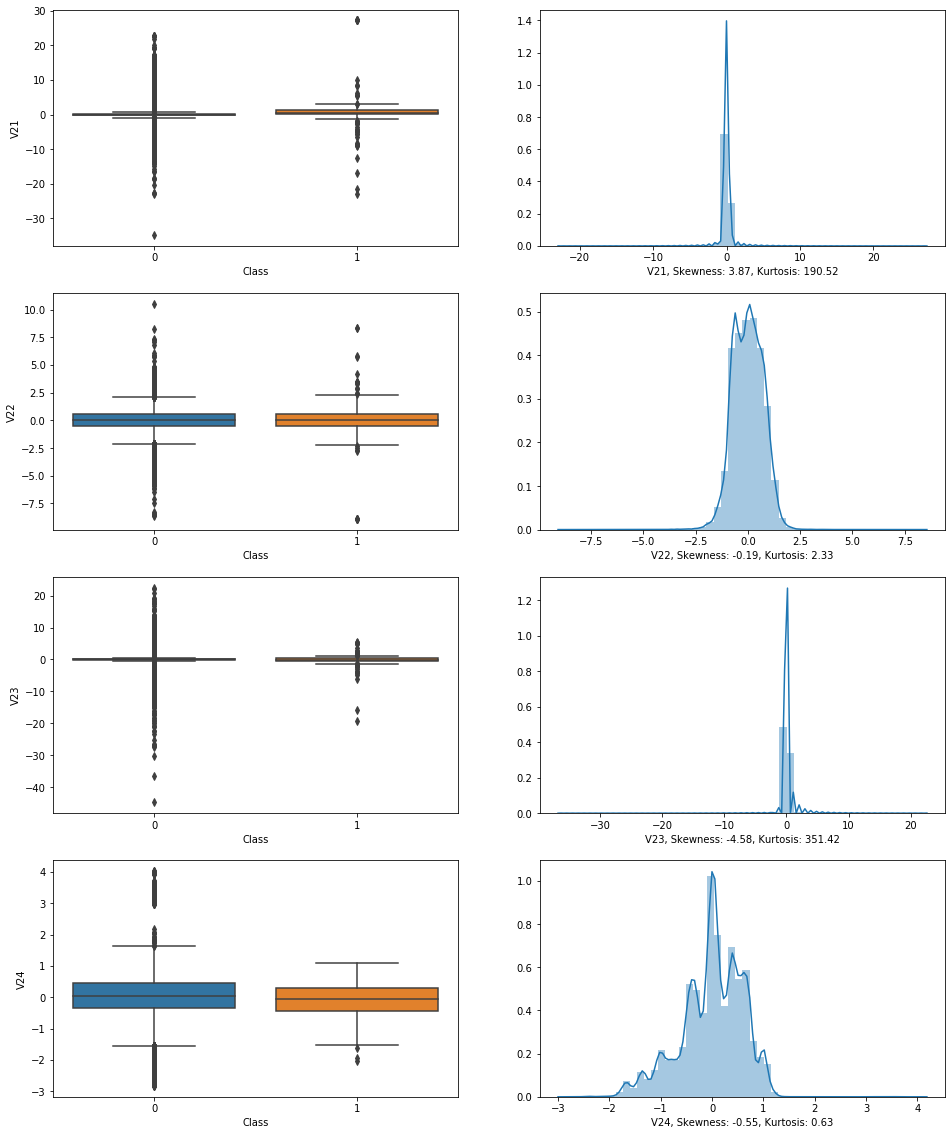

In [47]:
plt.figure(figsize=(16,20))

subplotNum = "4,2,"
pltNum = 1
colNumSuf = 21

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)
    pltBox(pltNo,'Class',col,df)
    
    pltNum = pltNum + 1

    plt.subplot(4,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    
    pltNum = pltNum + 1

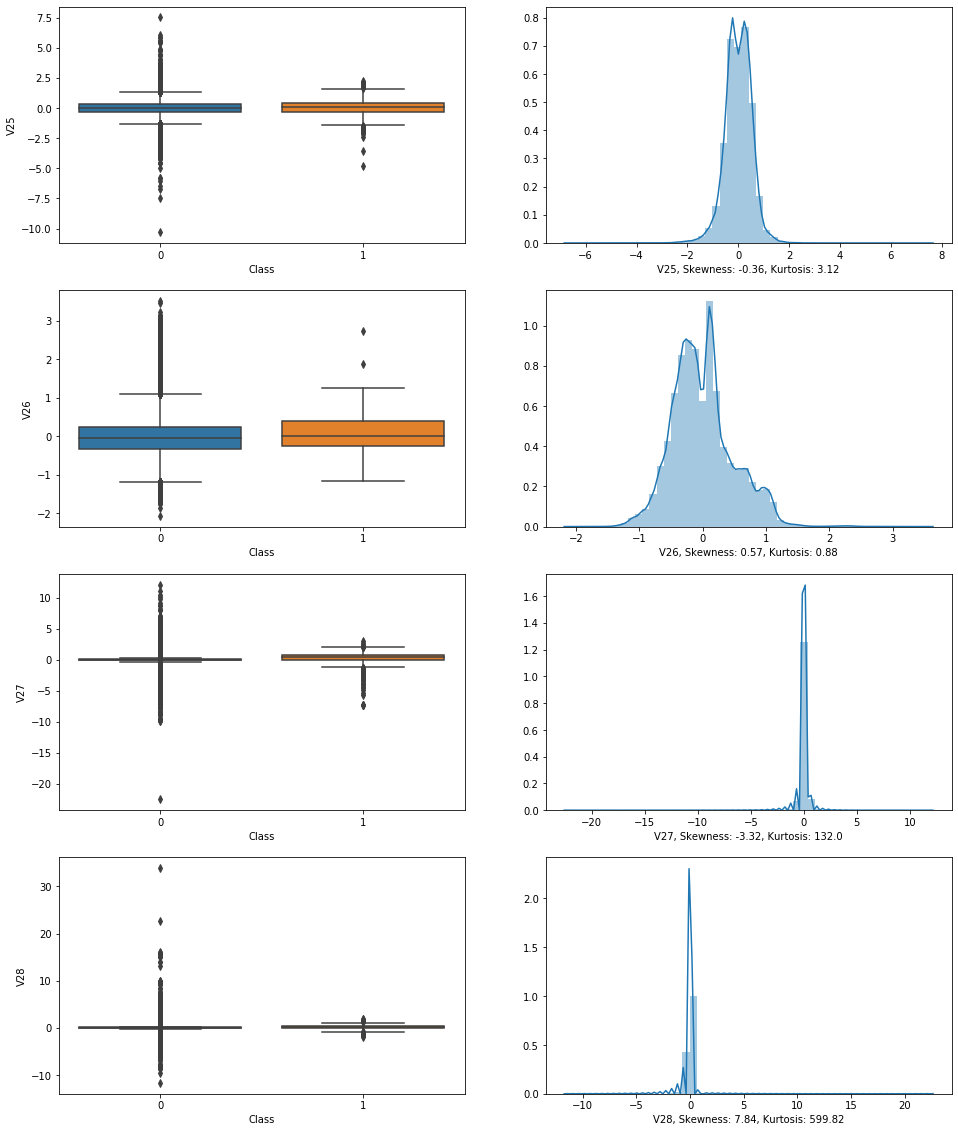

In [48]:
plt.figure(figsize=(16,20))

subplotNum = "4,2,"
pltNum = 1
colNumSuf = 25

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)
    pltBox(pltNo,'Class',col,df)
    
    pltNum = pltNum + 1

    plt.subplot(4,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    
    pltNum = pltNum + 1

In [49]:
X_train_Summary = pd.DataFrame(X_train.columns.to_list(), columns =['Variables'])

In [50]:
X_train_Summary['min'] = -100000
X_train_Summary['max'] = -100000
X_train_Summary['skew'] = -100000
X_train_Summary['kurtosis'] = -100000

for col in X_train.columns.to_list():
    X_train_Summary.loc[X_train_Summary.Variables == col,'min'] = np.round(X_train[col].min())
    X_train_Summary.loc[X_train_Summary.Variables == col,'max'] = np.round(X_train[col].max())
    X_train_Summary.loc[X_train_Summary.Variables == col,'skew'] = np.round(skew(X_train[col]),2)
    X_train_Summary.loc[X_train_Summary.Variables == col,'kurtosis'] = np.round(kurtosis(X_train[col]),2)

In [51]:
X_train_Summary

,Variables,min,max,skew,kurtosis
0,V1,-40.0,2.0,-2.97,25.17
1,V2,-50.0,21.0,-3.60,59.41
2,V3,-34.0,9.0,-2.06,21.89
3,V4,-6.0,13.0,0.64,2.30
4,V5,-32.0,34.0,-0.21,37.01
5,V6,-23.0,21.0,1.24,9.03
6,V7,-42.0,34.0,-1.23,77.49
7,V8,-51.0,20.0,-7.93,180.26
8,V9,-13.0,16.0,0.56,3.76
9,V10,-24.0,24.0,1.27,31.50


X_train_Summary shows all the variables in our dataframe along with their min,max values and skewness and kurtosis values. We cann see some of the variables are highly skewed which needs to be mitigated. <br>
Hence we can go ahead with the Power Transfomer function which can be used to normlise the data and mitigate skewness.
We can either go wuth Box-Cox approach or Yeo Johnson for this. <br>
But Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data, hence we can go ahead with this. <br>
The Amount feature alone we can apply StandardScaling as discussed above.

In [52]:
train_num_std = ['Amount']
train_num_yjt = X_train.columns

In [53]:
yj_trans = PowerTransformer(method='yeo-johnson')
scaler   = StandardScaler()

In [54]:
# standardization of Amount feature
X_train[train_num_std] = scaler.fit_transform(X_train[train_num_std].values)
X_test[train_num_std] = scaler.transform(X_test[train_num_std].values)

In [55]:
# power transform
X_train[train_num_yjt] = yj_trans.fit_transform(X_train[train_num_yjt].values)
X_test[train_num_yjt] = yj_trans.transform(X_test[train_num_yjt].values)

In [56]:
X_train_Summary_pw = pd.DataFrame(X_train.columns.to_list(), columns =['Variables'])

In [57]:
X_train_Summary_pw['min'] = -100000
X_train_Summary_pw['max'] = -100000
X_train_Summary_pw['skew'] = -100000
X_train_Summary_pw['kurtosis'] = -100000

for col in X_train.columns.to_list():
    X_train_Summary_pw.loc[X_train_Summary_pw.Variables == col,'min'] = np.round(X_train[col].min())
    X_train_Summary_pw.loc[X_train_Summary_pw.Variables == col,'max'] = np.round(X_train[col].max())
    X_train_Summary_pw.loc[X_train_Summary_pw.Variables == col,'skew'] = np.round(skew(X_train[col]),2)
    X_train_Summary_pw.loc[X_train_Summary_pw.Variables == col,'kurtosis'] = np.round(kurtosis(X_train[col]),2)

In [58]:
X_train_Summary_pw

,Variables,min,max,skew,kurtosis
0,V1,-7.0,2.0,-0.21,-0.06
1,V2,-18.0,22.0,0.34,25.59
2,V3,-10.0,11.0,-0.07,1.52
3,V4,-5.0,7.0,0.01,1.20
4,V5,-24.0,25.0,-0.30,37.19
5,V6,-38.0,9.0,-1.74,51.81
6,V7,-30.0,33.0,0.48,77.17
7,V8,-22.0,36.0,2.18,110.71
8,V9,-16.0,11.0,-0.05,3.32
9,V10,-32.0,16.0,-1.32,56.26


We can observe the distributions for these features now after successfully applying the Yeo-Johnson Transformations.

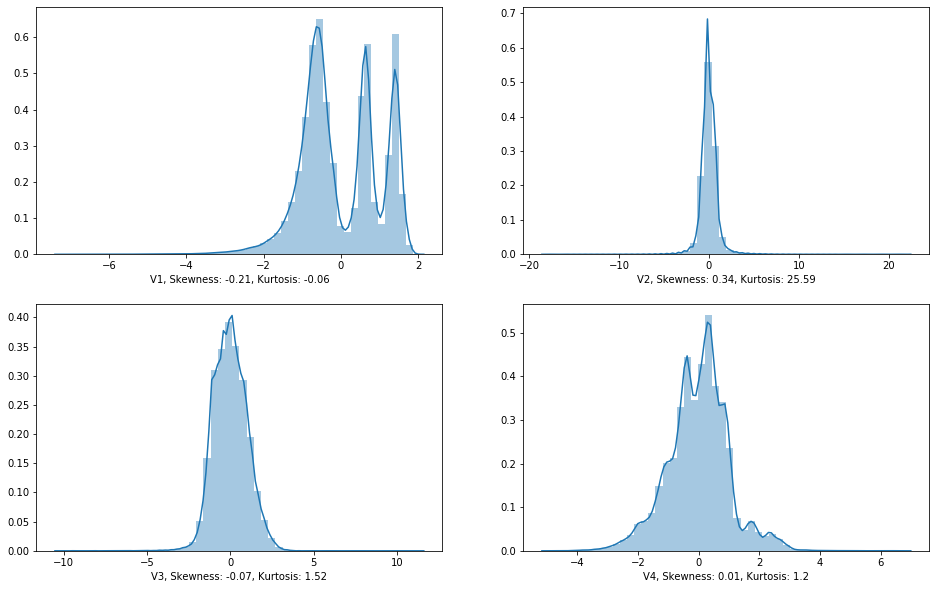

In [59]:
plt.figure(figsize=(16,10))

subplotNum = "2,2,"
pltNum = 1
colNumSuf = 1

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)

    plt.subplot(2,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    pltNum = pltNum + 1

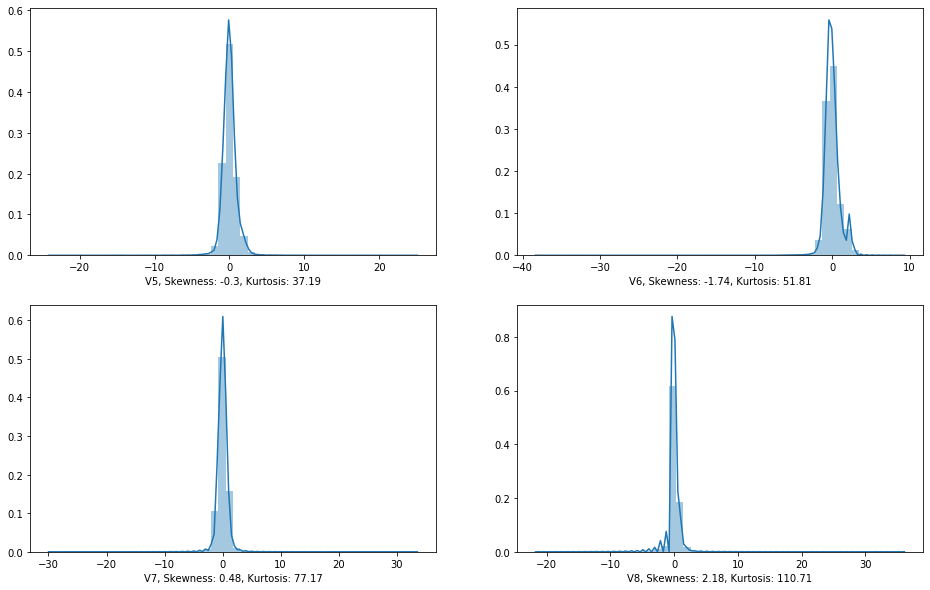

In [60]:
plt.figure(figsize=(16,10))

subplotNum = "2,2,"
pltNum = 1
colNumSuf = 5

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)

    plt.subplot(2,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    pltNum = pltNum + 1

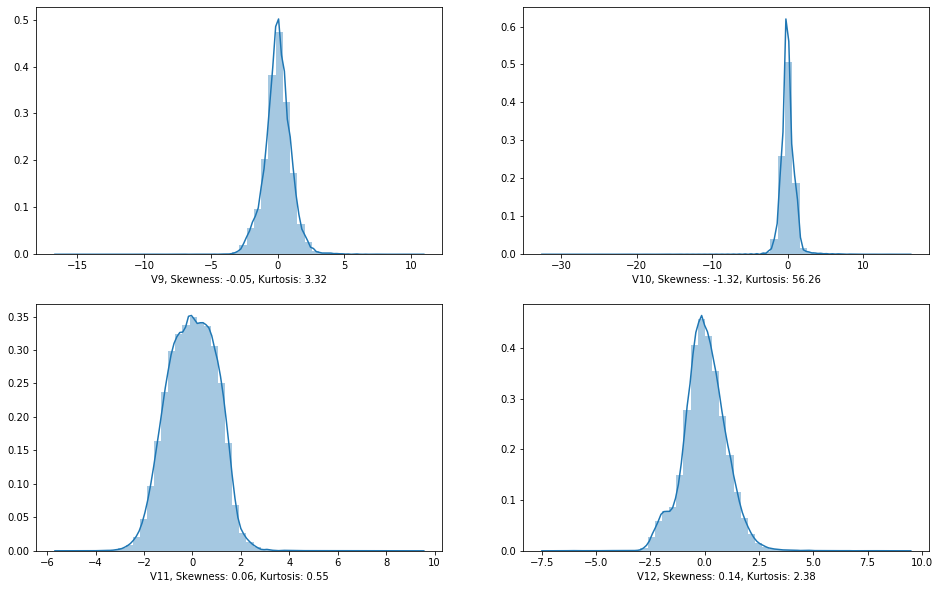

In [61]:
plt.figure(figsize=(16,10))

subplotNum = "2,2,"
pltNum = 1
colNumSuf = 9

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)

    plt.subplot(2,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    pltNum = pltNum + 1

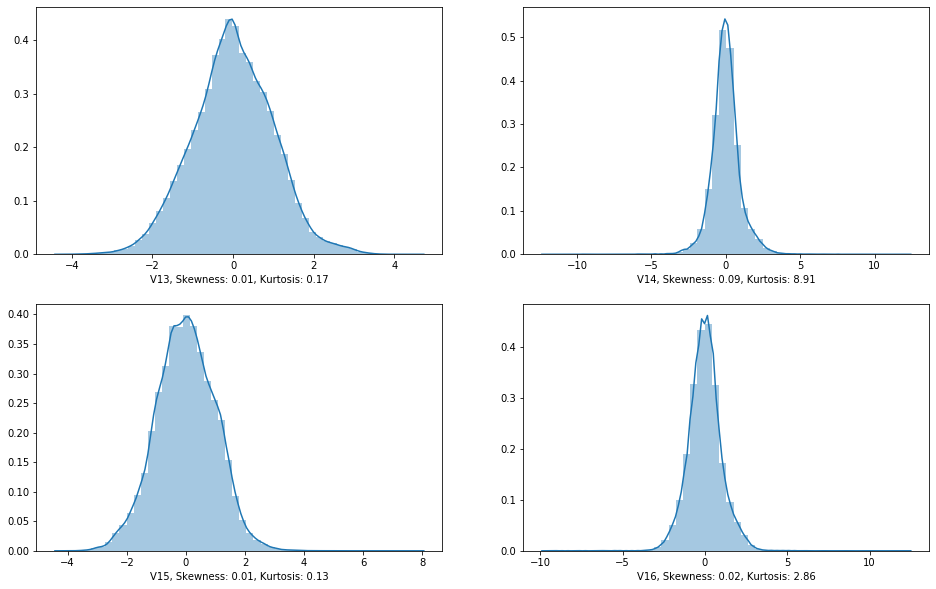

In [62]:
plt.figure(figsize=(16,10))

subplotNum = "2,2,"
pltNum = 1
colNumSuf = 13

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)

    plt.subplot(2,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    pltNum = pltNum + 1

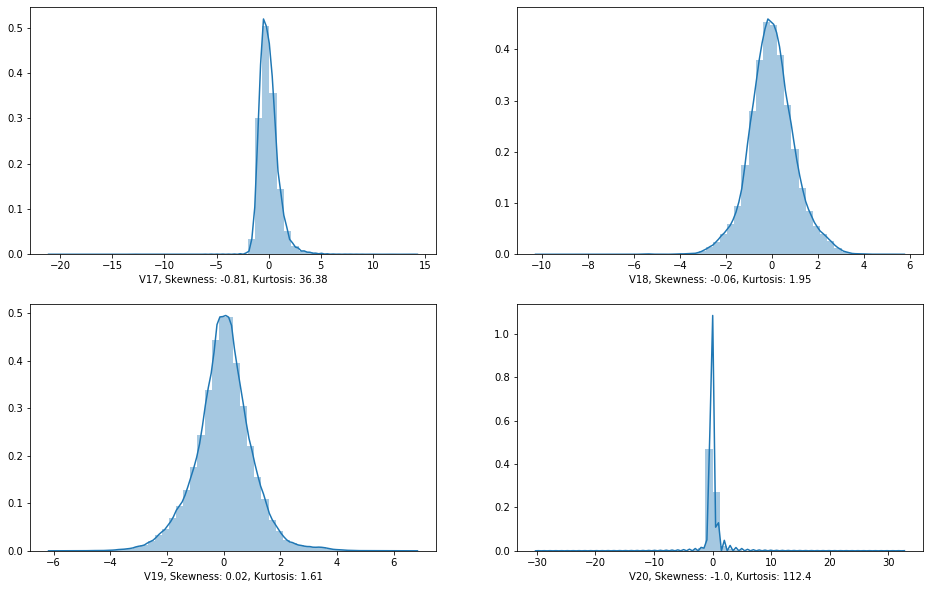

In [63]:
plt.figure(figsize=(16,10))

subplotNum = "2,2,"
pltNum = 1
colNumSuf = 17

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)

    plt.subplot(2,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    pltNum = pltNum + 1

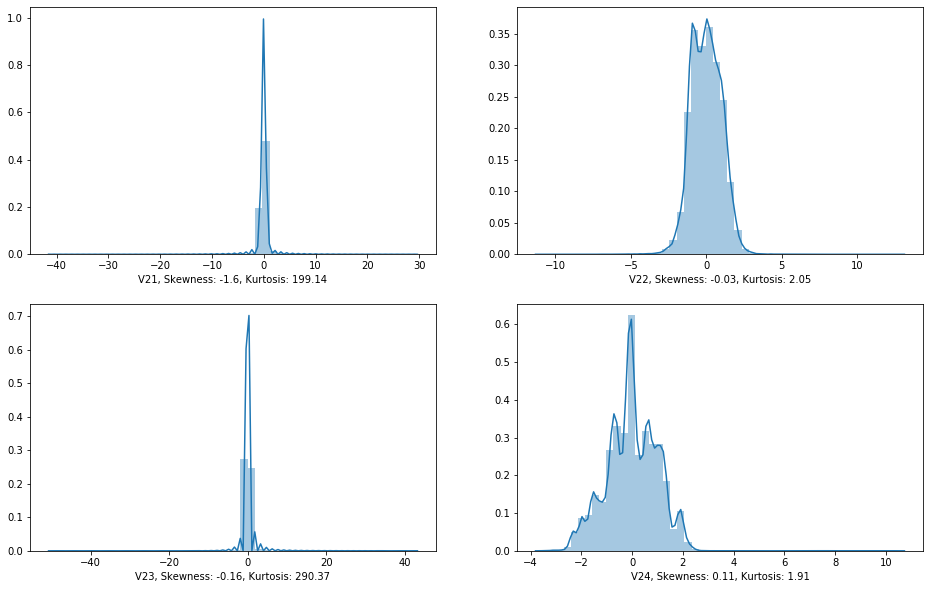

In [64]:
plt.figure(figsize=(16,10))

subplotNum = "2,2,"
pltNum = 1
colNumSuf = 21

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)

    plt.subplot(2,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    pltNum = pltNum + 1

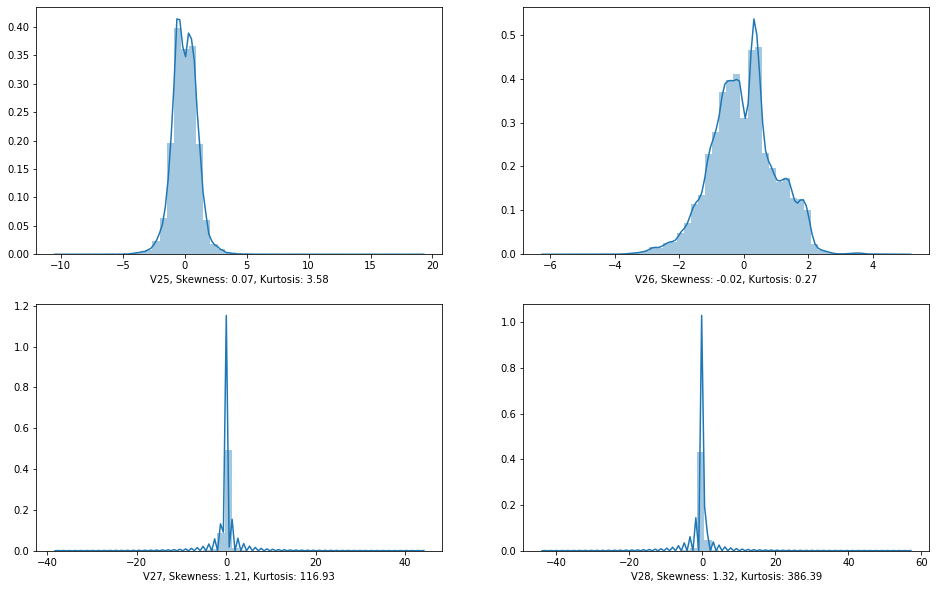

In [65]:
plt.figure(figsize=(16,10))

subplotNum = "2,2,"
pltNum = 1
colNumSuf = 25

for i in range(0,4):
    col = "V" + str(colNumSuf)
    colNumSuf = colNumSuf + 1
    
    pltNo = subplotNum + str(pltNum)

    plt.subplot(2,2,pltNum)
    sns.distplot(X_train[col],bins=50)
    plt.xlabel(col + ', Skewness: ' + str(np.round(skew(X_train[col]),2)) + ', Kurtosis: ' + str(np.round(kurtosis(X_train[col]),2)))
    pltNum = pltNum + 1

Hence we have completed with the data preparation and cleaning for our data and the train dataset is ready with `X_train`.

In [66]:
#Backup of X_train
X_train_copy = X_train.copy()

In [67]:
y_train.shape

(199359,)

In [68]:
X_train.shape

(199359, 29)

## <u> Models with Imbalanced Dataset

### - Decision Tree on Imbalanced Dataset

In [67]:
from sklearn.tree    import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

In [68]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
y_train_pred_DT = decision_tree.predict(X_train).astype(int)

In [70]:
decision_tree.score(X_train,y_train)

0.9996137621075547

In [71]:
# Printing classification report
print(classification_report(y_train, y_train_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199027
           1       0.96      0.80      0.87       332

    accuracy                           1.00    199359
   macro avg       0.98      0.90      0.94    199359
weighted avg       1.00      1.00      1.00    199359



In [72]:
confusion1 = confusion_matrix(y_train,y_train_pred_DT)

In [73]:
confusion1

array([[199016,     11],
       [    66,    266]], dtype=int64)

In [74]:
# Predicted     not_fraudulent    fraudulent
# Actual
# not_fraudulent    199016            11
# fraudulent            66           266

In [75]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [76]:
#Sensitivity
TP / float(TP+FN)

0.8012048192771084

In [77]:
#Specificity
TN / float(TN+FP)

0.9999447311168836

In [78]:
#Precision
TP / float(TP+FP)

0.9602888086642599

We can see that, <b><u> the decision tree on unbalanced dataset even without hyperparameter tuning</u></b> gave us a score of 99.99% (but possibly overfitting). Also since the data is inbalanced and we are interested on the Class 1, we have checked for the precision-recall and sensitivity-specificity values for the same and below are the details -> <br>
`Precision`            -> 96% <br>
`Recall`/`Sensitivity` -> 80% <br>
`Specificity`          -> 99.9% 

#####  Hyper parameter tuning for Decision Tree

In [68]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [80]:
start = time.time()
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree,param_grid = param_grid,cv = n_folds,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

end = time.time()
elapsed = end - start

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  7.9min finished


In [81]:
elapsed / 60

8.034844768047332

In [82]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9991221866080789
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


The best estimators for the decision tree we got are criterion='gini',max_depth=5,min_samples_leaf=50, min_samples_split=50

In [83]:
# model with optimal hyperparameters
dt_opt = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
dt_opt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [84]:
y_train_pred_DT1 = dt_opt.predict(X_train).astype(int)

In [85]:
# Printing classification report
print(classification_report(y_train, y_train_pred_DT1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199027
           1       0.86      0.63      0.73       332

    accuracy                           1.00    199359
   macro avg       0.93      0.81      0.86    199359
weighted avg       1.00      1.00      1.00    199359



In [86]:
confusion2 = confusion_matrix(y_train,y_train_pred_DT1)

In [87]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [88]:
confusion2

array([[198992,     35],
       [   123,    209]], dtype=int64)

In [89]:
#Sensitivity
TP / float(TP+FN)

0.6295180722891566

In [90]:
#Specificity
TN / float(TN+FP)

0.9998241444628115

In [91]:
#Precision
TP / float(TP+FP)

0.8565573770491803

With decision tree we can find that, by hyperparameter tuning we effectively tried controlling the overfitting issue but in the cost of reduced sensitivity/recall. <br>
With the default parameters and max_depth as 5 we got convincingly good precision of 96% and sensitivity of 80%. But with hyper parameter tuning even though we controlled the overfitting and got a good accuracy, we were not able to predict the fraudulent transactions with a better accuracy. We got a sinsitivity of just 63% only, while precision is around 86%. <br> We can go ahead and try with other models. <br>

### <font color = 'purple'> <b> `DECISION_TREE with TUNING ON IMBALANCED DATASET` </b> <br>
`Precision`            -> 86% <br>
`Recall`/`Sensitivity` -> 63% <br>
`Specificity`          -> 99.9% 

### - Random Forest on Imbalanced Dataset

In [69]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

We know that there are many hyper parameters for the Random Forest Classifier. We can start by tuning each hyper parameter seprately and find out the best set of values for each parameter so that we can go ahead and build the final Random forest classifier with these parameters.

#####  Hyper parameter tuning for Random Forest

##### <u>MAX DEPTH

In [93]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'max_depth': range(2, 15, 5)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="recall",return_train_score=True)
rf.fit(X_train,y_train)
end = time.time()

In [95]:
(end - start)/60

19.16649284362793

In [96]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,32.176154,1.750681,0.692986,0.002254,2,{'max_depth': 2},0.563636,0.612613,0.486486,0.554245,0.051917,3,0.567568,0.538462,0.583710,0.563247,0.018724
1,98.189083,0.273547,0.900022,0.013243,7,{'max_depth': 7},0.763636,0.801802,0.684685,0.750041,0.048770,2,0.797297,0.796380,0.832579,0.808752,0.016852
2,159.480751,0.156006,1.224698,0.042942,12,{'max_depth': 12},0.790909,0.819820,0.693694,0.768141,0.053949,1,0.837838,0.837104,0.873303,0.849415,0.016894


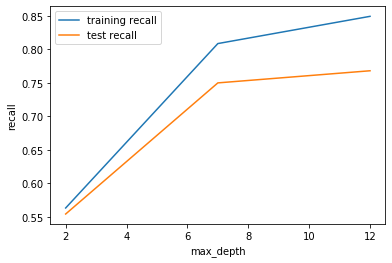

In [97]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

Maxmimum depth around 7 would be a good choice for our trees in the randdom forest model.

#### <U>N_ESTIMATORS

In [98]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'n_estimators': range(500, 1500, 500)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7)
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,scoring="recall",return_train_score=True)
rf.fit(X_train,y_train)
end = time.time()
#print("Time took for the Hyperparameter tuning:",((end-start)/60))

In [99]:
(end - start)/60

91.49268796046574

In [100]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,502.745343,10.227236,4.345498,0.01283,500,{'n_estimators': 500},0.781818,0.810811,0.702703,0.765111,0.045689,1,0.792793,0.796380,0.832579,0.807251,0.01797
1,1023.561257,16.865417,8.792070,0.13124,1000,{'n_estimators': 1000},0.781818,0.801802,0.684685,0.756102,0.051154,2,0.792793,0.791855,0.832579,0.805742,0.01898


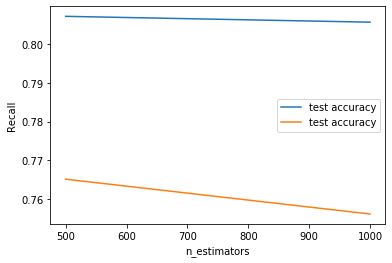

In [101]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="test accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

n_estimators around 500 would be a good choice where the recall values between train and test are much closer.

#### <u>MAX_FEATURES

In [70]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
# instantiate the model
rf = RandomForestClassifier(max_depth=7)
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="recall",return_train_score=True)
rf.fit(X_train,y_train)
end = time.time()

In [71]:
(end - start)/60

30.862358077367148

In [72]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,31.551956,0.495985,0.350605,0.003488,4,{'max_features': 4},0.763636,0.783784,0.675676,0.741032,0.046940,5,0.792793,0.791855,0.814480,0.799709,0.010451
1,62.185945,1.322976,0.349397,0.005173,8,{'max_features': 8},0.790909,0.819820,0.711712,0.774147,0.045699,4,0.810811,0.796380,0.846154,0.817782,0.020909
2,110.523290,0.561320,0.358725,0.010215,14,{'max_features': 14},0.790909,0.837838,0.711712,0.780153,0.052049,1,0.824324,0.828054,0.864253,0.838877,0.018008
3,156.628465,0.353156,0.363722,0.007732,20,{'max_features': 20},0.790909,0.837838,0.711712,0.780153,0.052049,1,0.828829,0.823529,0.868778,0.840379,0.020198
4,191.745624,5.109252,0.383904,0.018349,24,{'max_features': 24},0.790909,0.846847,0.693694,0.777150,0.063277,3,0.828829,0.828054,0.864253,0.840379,0.016885


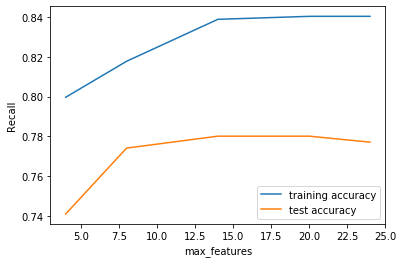

In [73]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

Max features around 13 seems to be a good value for Recall in both train and test and hence we can go ahead with that.

#### <u>Min_Samples_Leaf

In [74]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'min_samples_leaf': range(100,300,50)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="recall",return_train_score=True)
rf.fit(X_train,y_train)
end = time.time()
(end-start)/60

16.336615268389384

In [75]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,73.290666,3.904096,0.534503,0.015947,100,{'min_samples_leaf': 100},0.518182,0.558559,0.468468,0.515070,0.036845,1,0.500000,0.479638,0.565611,0.515083,0.036683
1,70.570049,2.047436,0.566829,0.017644,150,{'min_samples_leaf': 150},0.409091,0.000000,0.396396,0.268496,0.189926,2,0.432432,0.000000,0.488688,0.307040,0.218321
2,65.338202,1.676476,0.549020,0.036252,200,{'min_samples_leaf': 200},0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,0.000000,0.000000,0.000000,0.000000
3,67.175082,4.693159,0.578640,0.049783,250,{'min_samples_leaf': 250},0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,0.000000,0.000000,0.000000,0.000000


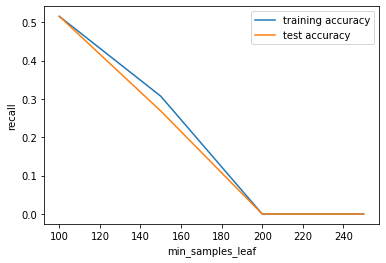

In [76]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.legend()
plt.show()

#### <u>MIN_SAMPLES_SPLIT

In [77]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'min_samples_split': range(100, 300, 50)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="recall",return_train_score=True)
rf.fit(X_train,y_train)
end = time.time()
(end-start)/60

20.25060743490855

In [78]:
 # scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,87.301026,3.553770,0.589259,0.017407,100,{'min_samples_split': 100},0.745455,0.765766,0.630631,0.713950,0.059497,1,0.725225,0.755656,0.773756,0.751546,0.020025
1,87.496542,4.990687,0.607402,0.020460,150,{'min_samples_split': 150},0.754545,0.747748,0.621622,0.707972,0.061122,2,0.707207,0.719457,0.760181,0.728948,0.022644
2,83.216422,4.503051,0.640404,0.048700,200,{'min_samples_split': 200},0.709091,0.711712,0.612613,0.677805,0.046110,4,0.698198,0.692308,0.733032,0.707846,0.017971
3,85.334769,6.260155,0.605670,0.018989,250,{'min_samples_split': 250},0.745455,0.747748,0.576577,0.689926,0.080156,3,0.698198,0.714932,0.710407,0.707846,0.007068


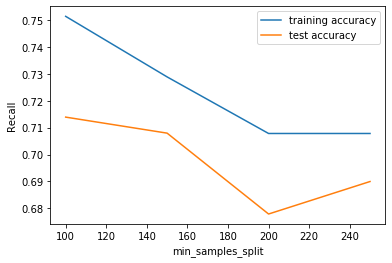

In [80]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

We can combine all the hyper parameter values which we got in the previous steps and build our random forest model with that and observe the metrics which the model is offering on train and test.

In [81]:
rf = RandomForestClassifier(n_estimators=500,max_depth=7,max_features=13,min_samples_leaf=75,min_samples_split=150)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=13,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=75, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
y_train_pred_rf = rf.predict(X_train)

In [83]:
accuracy_score(y_train,y_train_pred_rf)

0.9993178135925642

In [91]:
confusion3 = confusion_matrix(y_train,y_train_pred_rf)

In [92]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [93]:
confusion3

array([[198994,     33],
       [   103,    229]], dtype=int64)

In [95]:
#Sensitivity
TP / float(TP + FN)

0.6897590361445783

In [96]:
#Specificity
TN / float(TN + FP)

0.9998341933506509

In [97]:
#Precision
TP / float(TP+FP)

0.8740458015267175

### <font color = 'purple'> <b> `RANDOM FOREST with HYPERPARAMETER TUNING ON IMBALANCED DATASET-TRAIN` </b> <br>
`Precision`            -> 87% <br>
`Recall`/`Sensitivity` -> 69% <br>
`Specificity`          -> 99.9% 

##### Predictions on TEST 

In [98]:
X_test.shape

(85440, 29)

In [99]:
y_test.shape

(85440,)

In [104]:
y_test_pred_rf = rf.predict(X_test)

In [106]:
accuracy_score(y_test,y_test_pred_rf)

0.9991573033707866

In [110]:
confusion4 = confusion_matrix(y_test,y_test_pred_rf)

In [111]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [112]:
#Sensitivity / Recall
TP / float(TP + FN)

0.6875

In [113]:
#Specificity
TN / float(TN + FP)

0.9997420262664165

In [114]:
#Precision
TP / float(TP+FP)

0.8333333333333334

### <font color = 'purple'> <b> `RANDOM FOREST with HYPERPARAMETER TUNING ON IMBALANCED DATASET-TEST` </b> <br>
`Precision`            -> 83% <br>
`Recall`/`Sensitivity` -> 69% <br>
`Specificity`          -> 99.9% 

We can see that, the values of precision and recall have slightly improved with Random Forest compared with the Decision tree. 
Also the metrics on train and test seems to be close enough indicating there is no overfitting present. <br>But still the recall value is less. Hence we can go ahead with other models and check what they are offering.

### - Logistic Regression on Imbalanced Dataset

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
logreg = LogisticRegression()

In [118]:
import statsmodels.api as sm

In [120]:
model1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199329
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -695.26
Date:                Mon, 23 Mar 2020   Deviance:                       1390.5
Time:                        13:28:37   Pearson chi2:                 3.17e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8178      0.178    -49.529      0.000      -9.167      -8.469
V1            -0.1971      0.094     -2.090      0.037      -0.382      -0.012
V2            -0.1922      0.082     -2.349      0.019      -0.353      -0.032
V3            -0.3766      0.093     -4.046      0.000      -0.559      -0.194
V4             0.9149      0.101      9.091      0.000       0.718       1.112
V5            -0.0678      0.083     -0.820      0.412      -0.230       0.094
V6             0.1443      0.092      1.576      0.115      -0.035       0.324
V7            -0.1906      0.068     -2.809      0.005      -0.324      -0.058
V8            -0.2878      0.054     -5.297      0.000      -0.394      -0.181
V9            -0.2046      0.098     -2.087      0.037      -0.397      -0.012
V10           -0.1251      0.085     -1.471      0.141      -0.292       0.042
V11            0.0702      0.096      0.732      0.464      -0.118       0.258
V12           -0.6123      0.116     -5.264      0.000      -0.840      -0.384
V13           -0.2369      0.095     -2.489      0.013      -0.423      -0.050
V14           -0.7574      0.080     -9.431      0.000      -0.915      -0.600
V15           -0.0543      0.092     -0.591      0.555      -0.234       0.126
V16           -0.4200      0.097     -4.310      0.000      -0.611      -0.229
V17            0.0358      0.061      0.590      0.555      -0.083       0.155
V18            0.1190      0.100      1.190      0.234      -0.077       0.315
V19           -0.1665      0.085     -1.968      0.049      -0.332      -0.001
V20           -0.0447      0.052     -0.860      0.390      -0.147       0.057
V21            0.1597      0.066      2.428      0.015       0.031       0.289
V22            0.3522      0.113      3.112      0.002       0.130       0.574
V23           -0.0764      0.044     -1.741      0.082      -0.163       0.010
V24            0.0653      0.105      0.625      0.532      -0.140       0.270
V25            0.1448      0.085      1.706      0.088      -0.022       0.311
V26           -0.0866      0.119     -0.725      0.468      -0.321       0.147
V27           -0.0461      0.050     -0.927      0.354      -0.144       0.051
V28           -0.0465      0.031     -1.510      0.131      -0.107       0.014
Amount        -0.0119      0.110     -0.109      0.913      -0.227       0.203
==============================================================================
"""

We know that the features in hand are PCA transformed features and we are not aware of what are the native features for the same. Hence while removing the insignificant features in our Logistic Regression model, we need to take a call based on only the p-value and the VIF. We can go ahead with this and check and built model each time.

Here in our model1 we can see there are many features with p-value more than 0.05. We can remove these one by one and observe what changes are happening in the model. <br> To start with we can remove, `Amount` feature and see.

In [121]:
X_train_logreg = X_train.copy()

In [123]:
X_train_logreg.drop(['Amount'],axis=1,inplace=True)

In [124]:
X_train_logreg.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [125]:
model2 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199330
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -695.26
Date:                Mon, 23 Mar 2020   Deviance:                       1390.5
Time:                        13:36:10   Pearson chi2:                 3.18e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8181      0.178    -49.537      0.000      -9.167      -8.469
V1            -0.1955      0.093     -2.097      0.036      -0.378      -0.013
V2            -0.1886      0.075     -2.518      0.012      -0.335      -0.042
V3            -0.3756      0.093     -4.054      0.000      -0.557      -0.194
V4             0.9152      0.101      9.093      0.000       0.718       1.112
V5            -0.0653      0.080     -0.821      0.412      -0.221       0.091
V6             0.1429      0.091      1.576      0.115      -0.035       0.321
V7            -0.1902      0.068     -2.803      0.005      -0.323      -0.057
V8            -0.2882      0.054     -5.319      0.000      -0.394      -0.182
V9            -0.2037      0.098     -2.085      0.037      -0.395      -0.012
V10           -0.1257      0.085     -1.480      0.139      -0.292       0.041
V11            0.0709      0.096      0.741      0.459      -0.117       0.259
V12           -0.6121      0.116     -5.263      0.000      -0.840      -0.384
V13           -0.2371      0.095     -2.491      0.013      -0.424      -0.051
V14           -0.7568      0.080     -9.446      0.000      -0.914      -0.600
V15           -0.0537      0.092     -0.586      0.558      -0.233       0.126
V16           -0.4185      0.096     -4.341      0.000      -0.607      -0.230
V17            0.0355      0.061      0.586      0.558      -0.083       0.154
V18            0.1181      0.100      1.185      0.236      -0.077       0.313
V19           -0.1670      0.084     -1.976      0.048      -0.333      -0.001
V20           -0.0446      0.052     -0.858      0.391      -0.147       0.057
V21            0.1591      0.066      2.427      0.015       0.031       0.288
V22            0.3517      0.113      3.111      0.002       0.130       0.573
V23           -0.0762      0.044     -1.734      0.083      -0.162       0.010
V24            0.0656      0.105      0.628      0.530      -0.139       0.271
V25            0.1449      0.085      1.707      0.088      -0.021       0.311
V26           -0.0855      0.119     -0.719      0.472      -0.319       0.148
V27           -0.0459      0.050     -0.922      0.357      -0.143       0.052
V28           -0.0462      0.031     -1.504      0.132      -0.106       0.014
==============================================================================
"""

In [128]:
X_train_logreg.drop(['V15'],axis=1,inplace=True)

In [129]:
model3 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199331
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -695.44
Date:                Mon, 23 Mar 2020   Deviance:                       1390.9
Time:                        13:38:57   Pearson chi2:                 3.18e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8218      0.178    -49.482      0.000      -9.171      -8.472
V1            -0.1880      0.093     -2.030      0.042      -0.370      -0.006
V2            -0.1866      0.075     -2.489      0.013      -0.334      -0.040
V3            -0.3716      0.093     -4.016      0.000      -0.553      -0.190
V4             0.9216      0.101      9.139      0.000       0.724       1.119
V5            -0.0628      0.079     -0.791      0.429      -0.218       0.093
V6             0.1480      0.090      1.653      0.098      -0.027       0.323
V7            -0.1927      0.068     -2.838      0.005      -0.326      -0.060
V8            -0.2881      0.054     -5.327      0.000      -0.394      -0.182
V9            -0.2026      0.098     -2.061      0.039      -0.395      -0.010
V10           -0.1313      0.085     -1.554      0.120      -0.297       0.034
V11            0.0661      0.096      0.691      0.490      -0.121       0.254
V12           -0.6123      0.117     -5.224      0.000      -0.842      -0.383
V13           -0.2350      0.095     -2.465      0.014      -0.422      -0.048
V14           -0.7544      0.081     -9.372      0.000      -0.912      -0.597
V16           -0.4162      0.096     -4.315      0.000      -0.605      -0.227
V17            0.0297      0.060      0.496      0.620      -0.088       0.147
V18            0.1242      0.099      1.253      0.210      -0.070       0.318
V19           -0.1746      0.083     -2.092      0.036      -0.338      -0.011
V20           -0.0438      0.052     -0.846      0.397      -0.145       0.058
V21            0.1633      0.065      2.507      0.012       0.036       0.291
V22            0.3533      0.113      3.121      0.002       0.131       0.575
V23           -0.0771      0.044     -1.763      0.078      -0.163       0.009
V24            0.0683      0.104      0.655      0.512      -0.136       0.273
V25            0.1484      0.085      1.750      0.080      -0.018       0.315
V26           -0.0830      0.119     -0.697      0.486      -0.317       0.150
V27           -0.0452      0.050     -0.912      0.362      -0.142       0.052
V28           -0.0459      0.031     -1.505      0.132      -0.106       0.014
==============================================================================
"""

In [130]:
X_train_logreg.drop(['V17'],axis=1,inplace=True)

In [131]:
model4 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199332
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -695.56
Date:                Mon, 23 Mar 2020   Deviance:                       1391.1
Time:                        13:40:03   Pearson chi2:                 3.30e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8065      0.175    -50.334      0.000      -9.149      -8.464
V1            -0.1896      0.092     -2.053      0.040      -0.370      -0.009
V2            -0.1745      0.071     -2.454      0.014      -0.314      -0.035
V3            -0.3761      0.092     -4.071      0.000      -0.557      -0.195
V4             0.9216      0.102      9.076      0.000       0.723       1.121
V5            -0.0493      0.075     -0.660      0.509      -0.196       0.097
V6             0.1489      0.089      1.666      0.096      -0.026       0.324
V7            -0.1852      0.066     -2.786      0.005      -0.315      -0.055
V8            -0.2883      0.054     -5.331      0.000      -0.394      -0.182
V9            -0.1968      0.098     -2.003      0.045      -0.389      -0.004
V10           -0.1326      0.085     -1.568      0.117      -0.298       0.033
V11            0.0638      0.096      0.667      0.505      -0.124       0.251
V12           -0.5969      0.114     -5.247      0.000      -0.820      -0.374
V13           -0.2345      0.096     -2.450      0.014      -0.422      -0.047
V14           -0.7532      0.081     -9.321      0.000      -0.912      -0.595
V16           -0.4027      0.093     -4.331      0.000      -0.585      -0.220
V18            0.1462      0.089      1.642      0.100      -0.028       0.321
V19           -0.1797      0.083     -2.164      0.030      -0.343      -0.017
V20           -0.0421      0.051     -0.818      0.413      -0.143       0.059
V21            0.1579      0.064      2.459      0.014       0.032       0.284
V22            0.3437      0.111      3.086      0.002       0.125       0.562
V23           -0.0767      0.044     -1.758      0.079      -0.162       0.009
V24            0.0630      0.104      0.608      0.543      -0.140       0.266
V25            0.1445      0.084      1.710      0.087      -0.021       0.310
V26           -0.0715      0.117     -0.613      0.540      -0.300       0.157
V27           -0.0431      0.049     -0.877      0.381      -0.139       0.053
V28           -0.0457      0.031     -1.499      0.134      -0.106       0.014
==============================================================================
"""

In [132]:
X_train_logreg.drop(['V24'],axis=1,inplace=True)

In [133]:
model5 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199333
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -695.74
Date:                Mon, 23 Mar 2020   Deviance:                       1391.5
Time:                        13:40:45   Pearson chi2:                 3.23e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8017      0.175    -50.436      0.000      -9.144      -8.460
V1            -0.1896      0.092     -2.053      0.040      -0.371      -0.009
V2            -0.1762      0.071     -2.480      0.013      -0.315      -0.037
V3            -0.3756      0.093     -4.049      0.000      -0.557      -0.194
V4             0.9203      0.102      9.053      0.000       0.721       1.120
V5            -0.0540      0.075     -0.718      0.473      -0.201       0.093
V6             0.1455      0.091      1.600      0.110      -0.033       0.324
V7            -0.1868      0.067     -2.803      0.005      -0.317      -0.056
V8            -0.2897      0.054     -5.341      0.000      -0.396      -0.183
V9            -0.1953      0.098     -1.992      0.046      -0.387      -0.003
V10           -0.1314      0.084     -1.557      0.120      -0.297       0.034
V11            0.0593      0.095      0.625      0.532      -0.127       0.245
V12           -0.5979      0.113     -5.269      0.000      -0.820      -0.375
V13           -0.2306      0.095     -2.422      0.015      -0.417      -0.044
V14           -0.7487      0.080     -9.322      0.000      -0.906      -0.591
V16           -0.4035      0.093     -4.347      0.000      -0.585      -0.222
V18            0.1442      0.089      1.625      0.104      -0.030       0.318
V19           -0.1734      0.082     -2.116      0.034      -0.334      -0.013
V20           -0.0423      0.051     -0.823      0.411      -0.143       0.059
V21            0.1555      0.064      2.430      0.015       0.030       0.281
V22            0.3411      0.111      3.070      0.002       0.123       0.559
V23           -0.0787      0.044     -1.804      0.071      -0.164       0.007
V25            0.1451      0.084      1.719      0.086      -0.020       0.311
V26           -0.0749      0.117     -0.642      0.521      -0.304       0.154
V27           -0.0429      0.049     -0.872      0.383      -0.139       0.054
V28           -0.0469      0.031     -1.533      0.125      -0.107       0.013
==============================================================================
"""

In [134]:
X_train_logreg.drop(['V11'],axis=1,inplace=True)

In [135]:
model6 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199334
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -695.94
Date:                Mon, 23 Mar 2020   Deviance:                       1391.9
Time:                        13:41:57   Pearson chi2:                 2.99e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8227      0.172    -51.226      0.000      -9.160      -8.485
V1            -0.1939      0.092     -2.110      0.035      -0.374      -0.014
V2            -0.1750      0.071     -2.461      0.014      -0.314      -0.036
V3            -0.3871      0.091     -4.250      0.000      -0.566      -0.209
V4             0.9204      0.101      9.071      0.000       0.721       1.119
V5            -0.0521      0.075     -0.695      0.487      -0.199       0.095
V6             0.1462      0.091      1.612      0.107      -0.032       0.324
V7            -0.1863      0.066     -2.802      0.005      -0.317      -0.056
V8            -0.2910      0.054     -5.376      0.000      -0.397      -0.185
V9            -0.1960      0.098     -1.992      0.046      -0.389      -0.003
V10           -0.1371      0.085     -1.620      0.105      -0.303       0.029
V12           -0.6032      0.114     -5.280      0.000      -0.827      -0.379
V13           -0.2293      0.095     -2.405      0.016      -0.416      -0.042
V14           -0.7689      0.074    -10.378      0.000      -0.914      -0.624
V16           -0.4090      0.092     -4.427      0.000      -0.590      -0.228
V18            0.1444      0.089      1.628      0.104      -0.029       0.318
V19           -0.1729      0.082     -2.109      0.035      -0.334      -0.012
V20           -0.0450      0.052     -0.870      0.384      -0.146       0.056
V21            0.1555      0.064      2.434      0.015       0.030       0.281
V22            0.3425      0.111      3.088      0.002       0.125       0.560
V23           -0.0791      0.044     -1.813      0.070      -0.165       0.006
V25            0.1464      0.084      1.737      0.082      -0.019       0.312
V26           -0.0815      0.116     -0.701      0.483      -0.309       0.146
V27           -0.0454      0.049     -0.921      0.357      -0.142       0.051
V28           -0.0489      0.031     -1.601      0.109      -0.109       0.011
==============================================================================
"""

In [136]:
X_train_logreg.drop(['V5'],axis=1,inplace=True)

In [137]:
model7 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199335
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -696.18
Date:                Mon, 23 Mar 2020   Deviance:                       1392.4
Time:                        13:43:05   Pearson chi2:                 3.03e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8214      0.172    -51.218      0.000      -9.159      -8.484
V1            -0.2034      0.091     -2.226      0.026      -0.383      -0.024
V2            -0.1667      0.071     -2.352      0.019      -0.306      -0.028
V3            -0.3955      0.090     -4.383      0.000      -0.572      -0.219
V4             0.9243      0.102      9.040      0.000       0.724       1.125
V6             0.1678      0.083      2.020      0.043       0.005       0.331
V7            -0.1706      0.065     -2.634      0.008      -0.297      -0.044
V8            -0.2713      0.047     -5.780      0.000      -0.363      -0.179
V9            -0.1854      0.098     -1.889      0.059      -0.378       0.007
V10           -0.1505      0.083     -1.812      0.070      -0.313       0.012
V12           -0.6023      0.114     -5.261      0.000      -0.827      -0.378
V13           -0.2297      0.095     -2.406      0.016      -0.417      -0.043
V14           -0.7599      0.073    -10.409      0.000      -0.903      -0.617
V16           -0.4148      0.094     -4.420      0.000      -0.599      -0.231
V18            0.1327      0.088      1.507      0.132      -0.040       0.305
V19           -0.1658      0.081     -2.039      0.041      -0.325      -0.006
V20           -0.0446      0.052     -0.855      0.393      -0.147       0.058
V21            0.1573      0.065      2.414      0.016       0.030       0.285
V22            0.3320      0.110      3.024      0.002       0.117       0.547
V23           -0.0810      0.044     -1.845      0.065      -0.167       0.005
V25            0.1443      0.084      1.726      0.084      -0.020       0.308
V26           -0.0849      0.116     -0.731      0.465      -0.312       0.143
V27           -0.0434      0.050     -0.871      0.384      -0.141       0.054
V28           -0.0469      0.031     -1.535      0.125      -0.107       0.013
==============================================================================
"""

In [138]:
X_train_logreg.drop(['V26'],axis=1,inplace=True)

In [139]:
model8 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199336
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -696.45
Date:                Mon, 23 Mar 2020   Deviance:                       1392.9
Time:                        13:43:52   Pearson chi2:                 2.91e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8129      0.171    -51.475      0.000      -9.148      -8.477
V1            -0.2093      0.091     -2.300      0.021      -0.388      -0.031
V2            -0.1605      0.071     -2.275      0.023      -0.299      -0.022
V3            -0.3973      0.090     -4.419      0.000      -0.574      -0.221
V4             0.9192      0.102      8.972      0.000       0.718       1.120
V6             0.1591      0.082      1.934      0.053      -0.002       0.320
V7            -0.1643      0.064     -2.551      0.011      -0.291      -0.038
V8            -0.2709      0.047     -5.778      0.000      -0.363      -0.179
V9            -0.1704      0.096     -1.772      0.076      -0.359       0.018
V10           -0.1548      0.083     -1.866      0.062      -0.317       0.008
V12           -0.5954      0.114     -5.213      0.000      -0.819      -0.372
V13           -0.2339      0.095     -2.454      0.014      -0.421      -0.047
V14           -0.7587      0.073    -10.393      0.000      -0.902      -0.616
V16           -0.4241      0.094     -4.533      0.000      -0.607      -0.241
V18            0.1323      0.088      1.496      0.135      -0.041       0.306
V19           -0.1763      0.080     -2.206      0.027      -0.333      -0.020
V20           -0.0441      0.052     -0.844      0.399      -0.147       0.058
V21            0.1528      0.065      2.360      0.018       0.026       0.280
V22            0.3210      0.109      2.952      0.003       0.108       0.534
V23           -0.0793      0.044     -1.798      0.072      -0.166       0.007
V25            0.1343      0.083      1.624      0.104      -0.028       0.296
V27           -0.0488      0.049     -0.989      0.323      -0.146       0.048
V28           -0.0484      0.031     -1.582      0.114      -0.108       0.012
==============================================================================
"""

In [140]:
X_train_logreg.drop(['V20'],axis=1,inplace=True)

In [141]:
model9 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199337
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -696.82
Date:                Mon, 23 Mar 2020   Deviance:                       1393.6
Time:                        13:44:39   Pearson chi2:                 2.91e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8073      0.170    -51.728      0.000      -9.141      -8.474
V1            -0.2183      0.090     -2.428      0.015      -0.394      -0.042
V2            -0.1542      0.068     -2.254      0.024      -0.288      -0.020
V3            -0.4028      0.089     -4.528      0.000      -0.577      -0.228
V4             0.9084      0.100      9.054      0.000       0.712       1.105
V6             0.1605      0.082      1.964      0.050       0.000       0.321
V7            -0.1717      0.064     -2.698      0.007      -0.296      -0.047
V8            -0.2796      0.045     -6.225      0.000      -0.368      -0.192
V9            -0.1544      0.093     -1.654      0.098      -0.337       0.029
V10           -0.1319      0.075     -1.762      0.078      -0.279       0.015
V12           -0.6014      0.113     -5.300      0.000      -0.824      -0.379
V13           -0.2289      0.095     -2.406      0.016      -0.415      -0.042
V14           -0.7732      0.070    -11.011      0.000      -0.911      -0.636
V16           -0.4034      0.091     -4.455      0.000      -0.581      -0.226
V18            0.1138      0.087      1.315      0.188      -0.056       0.283
V19           -0.1628      0.078     -2.079      0.038      -0.316      -0.009
V21            0.1456      0.064      2.277      0.023       0.020       0.271
V22            0.3324      0.108      3.069      0.002       0.120       0.545
V23           -0.0858      0.043     -1.996      0.046      -0.170      -0.002
V25            0.1474      0.082      1.806      0.071      -0.013       0.307
V27           -0.0354      0.047     -0.756      0.450      -0.127       0.056
V28           -0.0392      0.030     -1.307      0.191      -0.098       0.020
==============================================================================
"""

In [142]:
X_train_logreg.drop(['V27'],axis=1,inplace=True)

In [143]:
model10 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model10.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199338
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -697.12
Date:                Mon, 23 Mar 2020   Deviance:                       1394.2
Time:                        14:21:51   Pearson chi2:                 3.00e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8137      0.170    -51.721      0.000      -9.148      -8.480
V1            -0.2247      0.090     -2.499      0.012      -0.401      -0.048
V2            -0.1500      0.068     -2.200      0.028      -0.284      -0.016
V3            -0.3927      0.088     -4.478      0.000      -0.565      -0.221
V4             0.9015      0.100      9.043      0.000       0.706       1.097
V6             0.1599      0.081      1.963      0.050       0.000       0.320
V7            -0.1598      0.061     -2.641      0.008      -0.278      -0.041
V8            -0.2752      0.045     -6.084      0.000      -0.364      -0.187
V9            -0.1420      0.091     -1.553      0.120      -0.321       0.037
V10           -0.1150      0.071     -1.627      0.104      -0.253       0.024
V12           -0.6110      0.113     -5.415      0.000      -0.832      -0.390
V13           -0.2280      0.095     -2.400      0.016      -0.414      -0.042
V14           -0.7871      0.068    -11.515      0.000      -0.921      -0.653
V16           -0.4106      0.089     -4.612      0.000      -0.585      -0.236
V18            0.1158      0.086      1.352      0.177      -0.052       0.284
V19           -0.1717      0.077     -2.232      0.026      -0.322      -0.021
V21            0.1471      0.064      2.281      0.023       0.021       0.273
V22            0.3380      0.108      3.131      0.002       0.126       0.550
V23           -0.0867      0.043     -2.020      0.043      -0.171      -0.003
V25            0.1417      0.081      1.752      0.080      -0.017       0.300
V28           -0.0347      0.029     -1.185      0.236      -0.092       0.023
==============================================================================
"""

In [144]:
X_train_logreg.drop(['V28'],axis=1,inplace=True)

In [145]:
model11 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model11.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199339
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -697.83
Date:                Mon, 23 Mar 2020   Deviance:                       1395.7
Time:                        14:22:59   Pearson chi2:                 3.10e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8072      0.170    -51.784      0.000      -9.141      -8.474
V1            -0.2222      0.091     -2.436      0.015      -0.401      -0.043
V2            -0.1344      0.068     -1.979      0.048      -0.268      -0.001
V3            -0.3700      0.087     -4.252      0.000      -0.541      -0.199
V4             0.8920      0.100      8.956      0.000       0.697       1.087
V6             0.1457      0.082      1.774      0.076      -0.015       0.307
V7            -0.1512      0.063     -2.419      0.016      -0.274      -0.029
V8            -0.2730      0.046     -5.908      0.000      -0.364      -0.182
V9            -0.1453      0.091     -1.590      0.112      -0.324       0.034
V10           -0.1093      0.071     -1.533      0.125      -0.249       0.030
V12           -0.6136      0.114     -5.398      0.000      -0.836      -0.391
V13           -0.2297      0.095     -2.418      0.016      -0.416      -0.043
V14           -0.7918      0.069    -11.408      0.000      -0.928      -0.656
V16           -0.4249      0.089     -4.770      0.000      -0.599      -0.250
V18            0.1210      0.086      1.412      0.158      -0.047       0.289
V19           -0.1851      0.076     -2.428      0.015      -0.335      -0.036
V21            0.1510      0.065      2.308      0.021       0.023       0.279
V22            0.3357      0.108      3.110      0.002       0.124       0.547
V23           -0.0795      0.043     -1.830      0.067      -0.165       0.006
V25            0.1186      0.078      1.523      0.128      -0.034       0.271
==============================================================================
"""

In [146]:
X_train_logreg.drop(['V18'],axis=1,inplace=True)

In [147]:
model12 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model12.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199340
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -698.81
Date:                Mon, 23 Mar 2020   Deviance:                       1397.6
Time:                        14:23:42   Pearson chi2:                 3.55e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7613      0.164    -53.489      0.000      -9.082      -8.440
V1            -0.2040      0.090     -2.273      0.023      -0.380      -0.028
V2            -0.1204      0.068     -1.779      0.075      -0.253       0.012
V3            -0.3652      0.087     -4.174      0.000      -0.537      -0.194
V4             0.8869      0.098      9.022      0.000       0.694       1.080
V6             0.1294      0.082      1.573      0.116      -0.032       0.291
V7            -0.1387      0.061     -2.267      0.023      -0.259      -0.019
V8            -0.2841      0.046     -6.206      0.000      -0.374      -0.194
V9            -0.1578      0.092     -1.718      0.086      -0.338       0.022
V10           -0.1087      0.072     -1.518      0.129      -0.249       0.032
V12           -0.6053      0.114     -5.317      0.000      -0.828      -0.382
V13           -0.2342      0.096     -2.443      0.015      -0.422      -0.046
V14           -0.7997      0.069    -11.515      0.000      -0.936      -0.664
V16           -0.3528      0.073     -4.809      0.000      -0.497      -0.209
V19           -0.1758      0.076     -2.316      0.021      -0.325      -0.027
V21            0.1542      0.065      2.374      0.018       0.027       0.282
V22            0.3166      0.106      2.977      0.003       0.108       0.525
V23           -0.0714      0.043     -1.679      0.093      -0.155       0.012
V25            0.1094      0.078      1.407      0.159      -0.043       0.262
==============================================================================
"""

In [148]:
X_train_logreg.drop(['V25'],axis=1,inplace=True)

In [149]:
model12 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model12.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199341
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -699.79
Date:                Mon, 23 Mar 2020   Deviance:                       1399.6
Time:                        14:24:23   Pearson chi2:                 3.49e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7423      0.162    -53.961      0.000      -9.060      -8.425
V1            -0.2144      0.090     -2.394      0.017      -0.390      -0.039
V2            -0.1227      0.067     -1.819      0.069      -0.255       0.009
V3            -0.3707      0.088     -4.225      0.000      -0.543      -0.199
V4             0.8802      0.098      8.947      0.000       0.687       1.073
V6             0.1247      0.082      1.524      0.128      -0.036       0.285
V7            -0.1405      0.061     -2.294      0.022      -0.261      -0.020
V8            -0.2738      0.045     -6.104      0.000      -0.362      -0.186
V9            -0.1524      0.092     -1.651      0.099      -0.333       0.029
V10           -0.1181      0.072     -1.651      0.099      -0.258       0.022
V12           -0.5974      0.114     -5.260      0.000      -0.820      -0.375
V13           -0.2307      0.096     -2.406      0.016      -0.419      -0.043
V14           -0.8008      0.069    -11.574      0.000      -0.936      -0.665
V16           -0.3427      0.073     -4.703      0.000      -0.486      -0.200
V19           -0.1764      0.075     -2.337      0.019      -0.324      -0.028
V21            0.1411      0.064      2.190      0.028       0.015       0.267
V22            0.3011      0.104      2.899      0.004       0.098       0.505
V23           -0.0476      0.040     -1.190      0.234      -0.126       0.031
==============================================================================
"""

In [150]:
X_train_logreg.drop(['V23'],axis=1,inplace=True)

In [151]:
model12 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model12.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199342
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -700.55
Date:                Mon, 23 Mar 2020   Deviance:                       1401.1
Time:                        14:25:08   Pearson chi2:                 3.57e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7342      0.161    -54.194      0.000      -9.050      -8.418
V1            -0.2018      0.088     -2.294      0.022      -0.374      -0.029
V2            -0.1086      0.065     -1.671      0.095      -0.236       0.019
V3            -0.3711      0.088     -4.211      0.000      -0.544      -0.198
V4             0.8729      0.098      8.892      0.000       0.680       1.065
V6             0.1384      0.079      1.748      0.080      -0.017       0.294
V7            -0.1514      0.057     -2.638      0.008      -0.264      -0.039
V8            -0.2776      0.043     -6.400      0.000      -0.363      -0.193
V9            -0.1456      0.092     -1.584      0.113      -0.326       0.035
V10           -0.1119      0.070     -1.603      0.109      -0.249       0.025
V12           -0.5997      0.113     -5.292      0.000      -0.822      -0.378
V13           -0.2340      0.096     -2.446      0.014      -0.422      -0.046
V14           -0.8059      0.069    -11.680      0.000      -0.941      -0.671
V16           -0.3511      0.072     -4.861      0.000      -0.493      -0.210
V19           -0.1739      0.075     -2.308      0.021      -0.322      -0.026
V21            0.1212      0.060      2.018      0.044       0.004       0.239
V22            0.2723      0.101      2.691      0.007       0.074       0.471
==============================================================================
"""

In [152]:
X_train_logreg.drop(['V9'],axis=1,inplace=True)

In [153]:
model12 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model12.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199343
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -701.79
Date:                Mon, 23 Mar 2020   Deviance:                       1403.6
Time:                        14:25:48   Pearson chi2:                 3.95e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7613      0.163    -53.885      0.000      -9.080      -8.443
V1            -0.1826      0.086     -2.128      0.033      -0.351      -0.014
V2            -0.0843      0.064     -1.319      0.187      -0.210       0.041
V3            -0.3690      0.087     -4.249      0.000      -0.539      -0.199
V4             0.9353      0.094      9.916      0.000       0.750       1.120
V6             0.1371      0.079      1.735      0.083      -0.018       0.292
V7            -0.1452      0.057     -2.557      0.011      -0.256      -0.034
V8            -0.2796      0.043     -6.510      0.000      -0.364      -0.195
V10           -0.1655      0.061     -2.722      0.006      -0.285      -0.046
V12           -0.5984      0.111     -5.384      0.000      -0.816      -0.381
V13           -0.2397      0.094     -2.551      0.011      -0.424      -0.056
V14           -0.7847      0.066    -11.852      0.000      -0.914      -0.655
V16           -0.3434      0.073     -4.730      0.000      -0.486      -0.201
V19           -0.1735      0.076     -2.290      0.022      -0.322      -0.025
V21            0.1271      0.059      2.156      0.031       0.012       0.243
V22            0.2780      0.102      2.735      0.006       0.079       0.477
==============================================================================
"""

In [154]:
X_train_logreg.drop(['V2'],axis=1,inplace=True)

In [155]:
model12 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
model12.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199344
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -702.65
Date:                Mon, 23 Mar 2020   Deviance:                       1405.3
Time:                        14:26:27   Pearson chi2:                 3.92e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7697      0.164    -53.588      0.000      -9.090      -8.449
V1            -0.2018      0.085     -2.360      0.018      -0.369      -0.034
V3            -0.3591      0.086     -4.170      0.000      -0.528      -0.190
V4             0.9614      0.094     10.211      0.000       0.777       1.146
V6             0.1094      0.080      1.373      0.170      -0.047       0.266
V7            -0.1117      0.050     -2.256      0.024      -0.209      -0.015
V8            -0.3057      0.036     -8.440      0.000      -0.377      -0.235
V10           -0.1806      0.058     -3.101      0.002      -0.295      -0.066
V12           -0.5717      0.109     -5.254      0.000      -0.785      -0.358
V13           -0.2449      0.093     -2.626      0.009      -0.428      -0.062
V14           -0.7572      0.062    -12.213      0.000      -0.879      -0.636
V16           -0.3497      0.073     -4.761      0.000      -0.494      -0.206
V19           -0.1642      0.076     -2.164      0.030      -0.313      -0.015
V21            0.1159      0.056      2.058      0.040       0.005       0.226
V22            0.2913      0.102      2.850      0.004       0.091       0.492
==============================================================================
"""

In [157]:
X_train_logreg.drop(['V6'],axis=1,inplace=True)

In [193]:
model12 = sm.GLM(y_train,(sm.add_constant(X_train_logreg)),family=sm.families.Binomial())
result = model12.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199359
Model:                            GLM   Df Residuals:                   199345
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -703.65
Date:                Mon, 23 Mar 2020   Deviance:                       1407.3
Time:                        14:44:15   Pearson chi2:                 4.13e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7672      0.163    -53.669      0.000      -9.087      -8.447
V1            -0.1989      0.085     -2.352      0.019      -0.365      -0.033
V3            -0.3429      0.086     -3.980      0.000      -0.512      -0.174
V4             0.9772      0.093     10.453      0.000       0.794       1.160
V7            -0.0882      0.049     -1.797      0.072      -0.184       0.008
V8            -0.3107      0.037     -8.380      0.000      -0.383      -0.238
V10           -0.1792      0.059     -3.037      0.002      -0.295      -0.064
V12           -0.5703      0.109     -5.225      0.000      -0.784      -0.356
V13           -0.2432      0.093     -2.615      0.009      -0.425      -0.061
V14           -0.7388      0.060    -12.310      0.000      -0.856      -0.621
V16           -0.3595      0.074     -4.885      0.000      -0.504      -0.215
V19           -0.1631      0.077     -2.120      0.034      -0.314      -0.012
V21            0.1216      0.058      2.083      0.037       0.007       0.236
V22            0.2845      0.102      2.800      0.005       0.085       0.484
==============================================================================
"""

We can see the p-values are in comparable range(<0.05) now and hence all values are significant. We can go ahead and check for VIF factor now and see whether multi-collinearity is present between these features. We will preserve the V7 factor here which is having slightly higher p-value but not that high enough than the significant boundary condition value.

In [159]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [194]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_logreg.columns
vif['VIF'] = [variance_inflation_factor(X_train_logreg.values, i) for i in range(X_train_logreg.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,V1,1.20
1,V3,1.16
3,V7,1.08
4,V8,1.08
6,V12,1.05
8,V14,1.03
2,V4,1.02
5,V10,1.02
9,V16,1.02
7,V13,1.01


All values seems to be within the range of VIF 5 hence no multi-collinear features. Hence model12 is our final logistic regression model with which we can predict now on train and test sets.

In [174]:
y_df_logreg = pd.DataFrame(data=y_train.values,columns=['y_train'])

In [192]:
y_df_logreg.head()

,y_train
0,0
1,0
2,0
3,0
4,0


In [195]:
#X_train_logreg
y_train_pred_logreg = result.predict(sm.add_constant(X_train_logreg)).values.reshape(-1)

In [196]:
y_train_pred_logreg[:10]

array([1.43102000e-05, 1.02145768e-03, 2.23568590e-04, 6.89100658e-05,
       5.84166546e-05, 7.04607111e-05, 4.16673528e-04, 3.08529575e-05,
       4.05943676e-05, 1.57298047e-04])

In [197]:
y_df_logreg['y_train_pred_logreg'] = y_train_pred_logreg

In [200]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_df_logreg[i]= y_df_logreg.y_train_pred_logreg.map(lambda x: 1 if x > i else 0)
y_df_logreg.head()

,y_train,y_train_pred_logreg,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000014,1,0,0,0,0,0,0,0,0,0
1,0,0.001021,1,0,0,0,0,0,0,0,0,0
2,0,0.000224,1,0,0,0,0,0,0,0,0,0
3,0,0.000069,1,0,0,0,0,0,0,0,0,0
4,0,0.000058,1,0,0,0,0,0,0,0,0,0


In [201]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_df_logreg.y_train, y_df_logreg[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.001665     1.000000     0.000000
0.1          0.1  0.999313     0.798193     0.999648
0.2          0.2  0.999413     0.771084     0.999794
0.3          0.3  0.999393     0.734940     0.999834
0.4          0.4  0.999358     0.698795     0.999859
0.5          0.5  0.999308     0.659639     0.999874
0.6          0.6  0.999258     0.620482     0.999889
0.7          0.7  0.999233     0.596386     0.999905
0.8          0.8  0.999182     0.566265     0.999905
0.9          0.9  0.999097     0.515060     0.999905


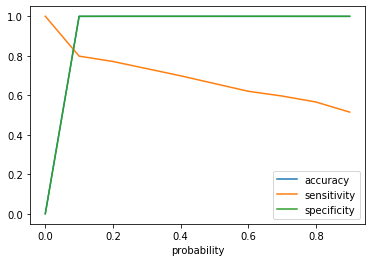

In [202]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [203]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df1 = pd.DataFrame( columns = ['probability','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_df_logreg.y_train, y_df_logreg[i] )
    total1=sum(sum(cm1))
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    rec = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,prec, rec]
print(cutoff_df1)

     probability  precision    recall
0.0          0.0   0.001665  1.000000
0.1          0.1   0.791045  0.798193
0.2          0.2   0.861953  0.771084
0.3          0.3   0.880866  0.734940
0.4          0.4   0.892308  0.698795
0.5          0.5   0.897541  0.659639
0.6          0.6   0.903509  0.620482
0.7          0.7   0.912442  0.596386
0.8          0.8   0.908213  0.566265
0.9          0.9   0.900000  0.515060


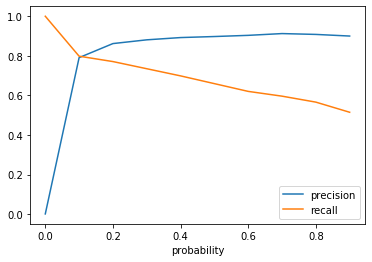

In [204]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df1.plot.line(x='probability', y=['precision','recall'])
plt.show()

We can see from the above plots for sensitivity-specificity and precision-recall that cut-off probability can be taken as 0.1.

In [205]:
y_df_logreg['Final_predicted'] = y_df_logreg.y_train_pred_logreg.map( lambda x: 1 if x > 0.1 else 0)
y_df_logreg.head()

,y_train,y_train_pred_logreg,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.000014,1,0,0,0,0,0,0,0,0,0,0
1,0,0.001021,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000224,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000069,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000058,1,0,0,0,0,0,0,0,0,0,0


In [206]:
final_confusion = confusion_matrix(y_df_logreg['y_train'],y_df_logreg['Final_predicted'])
print(final_confusion)

[[198957     70]
 [    67    265]]


In [207]:
TP = final_confusion[1,1] # true positive 
TN = final_confusion[0,0] # true negatives
FP = final_confusion[0,1] # false positives
FN = final_confusion[1,0] # false negatives

In [208]:
#Sensitivity / Recall
TP / float(TP+FN)

0.7981927710843374

In [209]:
#Precision
TP / float(TP + FP)

0.7910447761194029

In [210]:
#Specificity
TN / float(TN + FP)

0.9996482889256232

<font color = 'purple'> <b> `LOGISTIC REGRESSION ON IMBALANCED DATASET-TRAIN` </b> <br>
`Precision`            -> 79% <br>
`Recall`/`Sensitivity` -> 80% <br>
`Specificity`          -> 99.9% 

In [217]:
X_train_logreg_cols = list(X_train_logreg.columns)

In [220]:
#Building the test dataset with the relevant columns of our logistic regression model
X_test_logreg = X_test[X_train_logreg_cols]

In [222]:
#X_test_logreg
y_test

212740    0
154346    0
35996     0
281513    0
228150    0
         ..
192862    0
5549      0
111688    0
118092    0
266730    0
Name: Class, Length: 85440, dtype: int64

In [223]:
#X_train_logreg
y_test_pred_logreg = result.predict(sm.add_constant(X_test_logreg)).values.reshape(-1)

In [226]:
y_df_logreg_test = pd.DataFrame(data=y_test.values,columns=['y_test'])

In [231]:
y_df_logreg_test['y_test_prob'] = y_test_pred_logreg

In [233]:
y_df_logreg_test['final_predicted'] = y_df_logreg_test.y_test_prob.map( lambda x: 1 if x > 0.1 else 0)

In [240]:
final_confusion_test = confusion_matrix(y_df_logreg_test['y_test'],y_df_logreg_test['final_predicted'])

In [241]:
final_confusion_test

array([[85243,    37],
       [   34,   126]], dtype=int64)

In [242]:
TP = final_confusion_test[1,1] # true positive 
TN = final_confusion_test[0,0] # true negatives
FP = final_confusion_test[0,1] # false positives
FN = final_confusion_test[1,0] # false negatives

In [243]:
#Sensitivity / Recall
TP / float(TP+FN)

0.7875

In [244]:
#Precision
TP / float(TP + FP)

0.7730061349693251

In [245]:
#Specificity
TN / float(TN + FP)

0.9995661350844278

<font color = 'purple'> <b> `LOGISTIC REGRESSION ON IMBALANCED DATASET-TEST` </b> <br>
`Precision`            -> 77% <br>
`Recall`/`Sensitivity` -> 79% <br>
`Specificity`          -> 99.9% 

We can see that with the Logistic Regression model on our imbalanced dataset performed better in terms of the Recall with a 10% increase in the value but on compromise on the precision value which was higher with our Random Forest Model. Specificity as a metric we are not concerned here since we are looking for predicting the fraudulent cases as priority.

### - KNN on Imbalanced Dataset

In [246]:
from sklearn.neighbors import KNeighborsClassifier

In [254]:
start = time.time()
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
end = time.time()
(end-start)/60

0.09855831464131673

In [257]:
y_train_pred_knn = knn.predict(X_train)

In [262]:
recall_score(y_train,y_train_pred_knn)

0.7921686746987951

In [266]:
confusion_knn = confusion_matrix(y_train,y_train_pred_knn)

In [267]:
TP = confusion_knn[1,1] # true positive 
TN = confusion_knn[0,0] # true negatives
FP = confusion_knn[0,1] # false positives
FN = confusion_knn[1,0] # false negatives

In [268]:
#Sensitivity / Recall
TP / float(TP + FN)

0.7921686746987951

In [269]:
#Specificity
TN / float(TN + FP)

0.9998995111216066

In [270]:
#Precision
TP / float(TP + FP)

0.9293286219081273

### <font color = 'purple'> <b> `KNN ON IMBALANCED DATASET-TRAIN WITH DEFAULT n_neighbors = 5` </b> <br>
`Precision`            -> 93% <br>
`Recall`/`Sensitivity` -> 79% <br>
`Specificity`          -> 99.9% 

### - XGBOOST on Imbalanced Dataset

In [69]:
#Importing the libraries for XGBoost.
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [91]:
#!nvidia-smi

Tue Mar 24 16:22:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 419.72       Driver Version: 419.72       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX250      WDDM  | 00000000:02:00.0 Off |                  N/A |
| N/A   41C    P8    N/A /  N/A |     64MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [93]:
#dtrain = xgb.DMatrix(X_train,label=y_train)
#dtest  = xgb.DMatrix(X_test,label=y_test)

In [94]:
#import time
#setting tree and tree depth
#num_round = 50
#maxdepth = 8
#param = {
#  'colsample_bylevel': 1,
#  'colsample_bytree': 1,
#  'gamma': 0,
#  'learning_rate': 0.1, 
#  'random_state': 1010,
#  'objective': 'multi:softmax', 
#  'num_class': 7, 
#}

In [ ]:
#param['tree_method'] = 'gpu_hist'
#param['grow_policy'] = 'depthwise'
#param['max_depth'] = maxdepth
#param['max_leaves'] = 0
#param['verbosity'] = 0
#param['gpu_id'] = 0
#param['updater'] = 'grow_gpu_hist'
#param['predictor'] = 'gpu_predictor'
#param['eval_metric'] = 'auc'

#gpu_result = {} 
#start_time = time.time()
# Training with the above parameters
#xgb_model = xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=gpu_result, verbose_eval=20)

#print("GPU Training Time: %s seconds" % (str(time.time() - start_time)))

In [89]:
#!nvidia-smi

Tue Mar 24 16:18:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 419.72       Driver Version: 419.72       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX250      WDDM  | 00000000:02:00.0 Off |                  N/A |
| N/A   47C    P8    N/A /  N/A |     64MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [68]:
import time

In [73]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
xgb_model = XGBClassifier()
# fit tree on training data
xgb_model1 = GridSearchCV(xgb_model, parameters, cv=n_folds, scoring="recall",return_train_score=True)
xgb_model1.fit(X_train,y_train)
end = time.time()
(end-start)/60

29.207410657405852

In [74]:
cv_results = pd.DataFrame(xgb_model1.cv_results_)

In [75]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,58.850947,3.256852,0.345509,0.004641,2,{'max_depth': 2},0.781818,0.810811,0.657658,0.750096,0.066426,4,0.806306,0.796380,0.832579,0.811755,0.015272
1,138.955575,2.234473,0.611018,0.034973,7,{'max_depth': 7},0.772727,0.828829,0.711712,0.771089,0.047827,1,0.936937,0.950226,0.941176,0.942780,0.005543
2,152.330561,2.644021,0.632179,0.102752,12,{'max_depth': 12},0.772727,0.837838,0.702703,0.771089,0.055181,1,0.932432,0.954751,0.950226,0.945803,0.009633
3,153.877340,3.143313,0.671054,0.098238,17,{'max_depth': 17},0.772727,0.837838,0.702703,0.771089,0.055181,1,0.932432,0.954751,0.950226,0.945803,0.009633


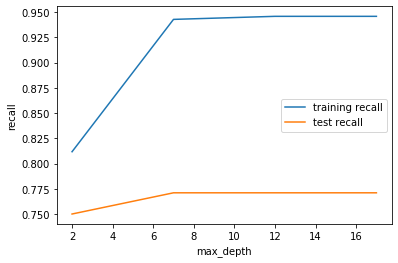

In [76]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training recall")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

Max depth around 4 would be a good measure where the train and test recall metrics are close enough.

In [77]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'n_estimators': range(100, 800, 300)}
# instantiate the model (note we are specifying a max_depth)
xgb_model = XGBClassifier(max_depth=4)
# fit tree on training data
xgb_model1 = GridSearchCV(xgb_model, parameters, cv=n_folds, scoring="recall",return_train_score=True)
xgb_model1.fit(X_train,y_train)
end = time.time()
(end-start)/60

68.37401629288992

In [78]:
cv_results = pd.DataFrame(xgb_model1.cv_results_)

In [79]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,98.911260,1.651723,0.472857,0.006985,100,{'n_estimators': 100},0.781818,0.837838,0.702703,0.774120,0.055437,3,0.864865,0.859729,0.904977,0.876524,0.020229
1,358.669852,6.610851,2.210940,0.017397,400,{'n_estimators': 400},0.790909,0.837838,0.702703,0.777150,0.056020,2,1.000000,1.000000,1.000000,1.000000,0.000000
2,553.221827,15.797380,3.768306,0.097417,700,{'n_estimators': 700},0.790909,0.837838,0.711712,0.780153,0.052049,1,1.000000,1.000000,1.000000,1.000000,0.000000


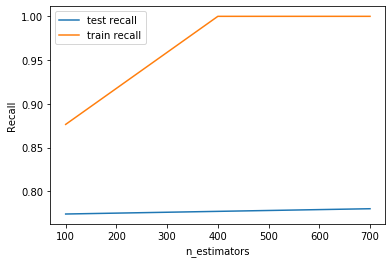

In [80]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_test_score"], 
         label="test recall")
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_train_score"], 
         label="train recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

100 estimators seems to be a good parameter so that the recall is in similar range on train and test. Further with the increase in the n-estimators we can clearly see some overfitting on the train set.

In [81]:
start = time.time()
# hyperparameter tuning with XGBoost
# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=4, n_estimators=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds,  
                        verbose = 1,
                        return_train_score=True)  
model_cv.fit(X_train,y_train)
end = time.time()
(end-start)/60

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 23.1min finished


25.334249730904897

In [82]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,60.596116,0.802949,0.566669,0.013324,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.781818,0.810811,0.684685,0.759105,0.053938,5,0.873874,0.855204,0.895928,0.875002,0.016645
1,83.972500,0.958753,0.579956,0.007695,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.790909,0.828829,0.729730,0.783156,0.040827,1,0.963964,0.972851,0.968326,0.968380,0.003628
2,96.142179,2.579085,0.615171,0.024392,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.790909,0.837838,0.702703,0.777150,0.056020,3,0.986486,0.990950,1.000000,0.992479,0.005622
3,56.688409,1.781204,0.595544,0.044281,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.781818,0.765766,0.684685,0.744090,0.042514,6,0.932432,0.941176,0.959276,0.944295,0.011179
4,73.800309,1.193512,0.598361,0.020046,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.772727,0.801802,0.738739,0.771089,0.025771,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,79.926321,2.524172,0.684855,0.094420,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.809091,0.819820,0.702703,0.777204,0.052862,2,1.000000,1.000000,1.000000,1.000000,0.000000


In [83]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,60.596116,0.802949,0.566669,0.013324,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.781818,0.810811,0.684685,0.759105,0.053938,5,0.873874,0.855204,0.895928,0.875002,0.016645
1,83.972500,0.958753,0.579956,0.007695,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.790909,0.828829,0.729730,0.783156,0.040827,1,0.963964,0.972851,0.968326,0.968380,0.003628
2,96.142179,2.579085,0.615171,0.024392,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.790909,0.837838,0.702703,0.777150,0.056020,3,0.986486,0.990950,1.000000,0.992479,0.005622
3,56.688409,1.781204,0.595544,0.044281,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.781818,0.765766,0.684685,0.744090,0.042514,6,0.932432,0.941176,0.959276,0.944295,0.011179
4,73.800309,1.193512,0.598361,0.020046,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.772727,0.801802,0.738739,0.771089,0.025771,4,1.000000,1.000000,1.000000,1.000000,0.000000


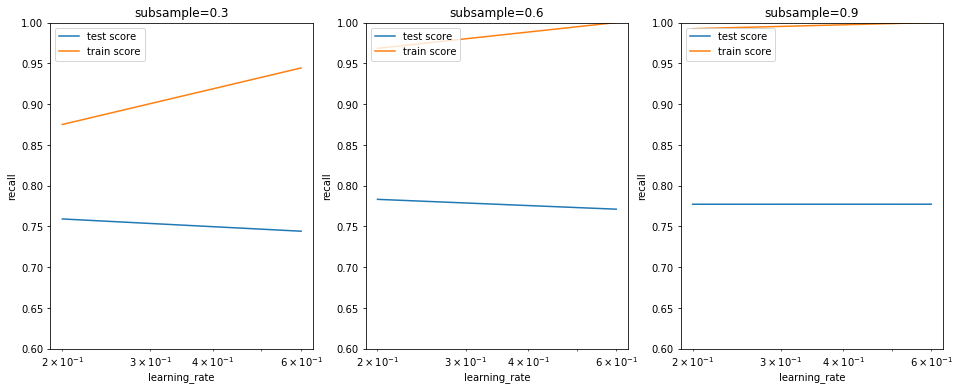

In [84]:
#plotting
plt.figure(figsize=(16,6))
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 
for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('recall')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Learning rate around 0.2 and subsample around 0.3 seems to be a good value.

In [70]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 4, 
          'n_estimators':100,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [86]:
# predict
y_pred = model.predict_proba(X_train)
y_pred[:10]

array([[9.99917150e-01, 8.28251432e-05],
       [9.99668002e-01, 3.31998861e-04],
       [9.99912858e-01, 8.71515731e-05],
       [9.99801040e-01, 1.98961818e-04],
       [9.99934912e-01, 6.51107548e-05],
       [9.99889493e-01, 1.10531146e-04],
       [9.99718368e-01, 2.81637447e-04],
       [9.99859154e-01, 1.40827615e-04],
       [9.99822676e-01, 1.77316018e-04],
       [9.99861300e-01, 1.38671559e-04]], dtype=float32)

In [88]:
import sklearn

In [89]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_train, y_pred[:, 1])
auc

0.9972677770122731

In [90]:
xgb_df = pd.DataFrame(y_pred[:, 1],columns=["Predicted_probability"])

In [92]:
xgb_df['Churn'] = y_train.values

In [93]:
xgb_df

,Predicted_probability,Churn
0,0.000083,0
1,0.000332,0
2,0.000087,0
3,0.000199,0
4,0.000065,0
...,...,...
199354,0.000044,0
199355,0.000121,0
199356,0.000102,0
199357,0.000086,0


In [94]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    xgb_df[i]= xgb_df.Predicted_probability.map(lambda x: 1 if x > i else 0)
xgb_df.head()

,Predicted_probability,Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.000083,0,1,0,0,0,0,0,0,0,0,0
1,0.000332,0,1,0,0,0,0,0,0,0,0,0
2,0.000087,0,1,0,0,0,0,0,0,0,0,0
3,0.000199,0,1,0,0,0,0,0,0,0,0,0
4,0.000065,0,1,0,0,0,0,0,0,0,0,0


In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(xgb_df.Churn, xgb_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.001665     1.000000     0.000000
0.1          0.1  0.999503     0.861446     0.999734
0.2          0.2  0.999554     0.846386     0.999809
0.3          0.3  0.999644     0.840361     0.999910
0.4          0.4  0.999669     0.837349     0.999940
0.5          0.5  0.999669     0.834337     0.999945
0.6          0.6  0.999674     0.825301     0.999965
0.7          0.7  0.999664     0.804217     0.999990
0.8          0.8  0.999644     0.786145     1.000000
0.9          0.9  0.999413     0.647590     1.000000


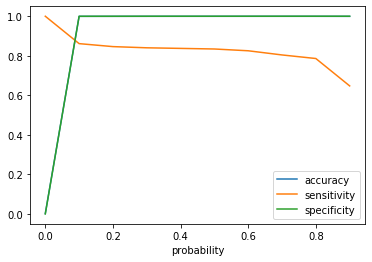

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df1 = pd.DataFrame( columns = ['probability','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(xgb_df.Churn, xgb_df[i] )
    total1=sum(sum(cm1))
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    rec = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,prec, rec]
print(cutoff_df1)

     probability  precision    recall
0.0          0.0   0.001665  1.000000
0.1          0.1   0.843658  0.861446
0.2          0.2   0.880878  0.846386
0.3          0.3   0.939394  0.840361
0.4          0.4   0.958621  0.837349
0.5          0.5   0.961806  0.834337
0.6          0.6   0.975089  0.825301
0.7          0.7   0.992565  0.804217
0.8          0.8   1.000000  0.786145
0.9          0.9   1.000000  0.647590


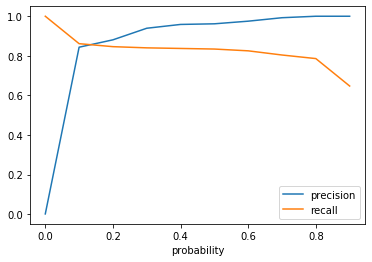

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df1.plot.line(x='probability', y=['precision','recall'])
plt.show()

In [99]:
#Selecting the cut-off probability as 0.4 and predicting for Churn.
xgb_df['Final_predicted'] = xgb_df.Predicted_probability.map( lambda x: 1 if x > 0.1 else 0)
xgb_df.head()

,Predicted_probability,Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0.000083,0,1,0,0,0,0,0,0,0,0,0,0
1,0.000332,0,1,0,0,0,0,0,0,0,0,0,0
2,0.000087,0,1,0,0,0,0,0,0,0,0,0,0
3,0.000199,0,1,0,0,0,0,0,0,0,0,0,0
4,0.000065,0,1,0,0,0,0,0,0,0,0,0,0


In [76]:
y_pred_test = model.predict_proba(X_test)
y_pred_test[:10]

array([[9.9994236e-01, 5.7618396e-05],
       [9.9959737e-01, 4.0262128e-04],
       [9.9991387e-01, 8.6118744e-05],
       [9.9991554e-01, 8.4447638e-05],
       [9.9986553e-01, 1.3446734e-04],
       [9.9986798e-01, 1.3203657e-04],
       [9.9992675e-01, 7.3233612e-05],
       [9.9969852e-01, 3.0149840e-04],
       [9.9984896e-01, 1.5103848e-04],
       [9.9993634e-01, 6.3665495e-05]], dtype=float32)

In [77]:
xgb_test_df_ca = pd.DataFrame(y_pred_test[:, 1],columns=["Predicted_probability"])

In [78]:
xgb_test_df_ca['y_test'] = y_test.values

In [79]:
xgb_test_df_ca

,Predicted_probability,y_test
0,0.000058,0
1,0.000403,0
2,0.000086,0
3,0.000084,0
4,0.000134,0
...,...,...
85435,0.000107,0
85436,0.000105,0
85437,0.000044,0
85438,0.000190,0


In [80]:
#Selecting the cut-off probability as 0.4 and predicting for Churn.
xgb_test_df_ca['Final_predicted'] = xgb_test_df_ca.Predicted_probability.map( lambda x: 1 if x > 0.1 else 0)
xgb_test_df_ca.head()

,Predicted_probability,y_test,Final_predicted
0,0.000058,0,0
1,0.000403,0,0
2,0.000086,0,0
3,0.000084,0,0
4,0.000134,0,0


In [81]:
confusion_xgb = confusion_matrix(xgb_test_df_ca['y_test'],xgb_test_df_ca['Final_predicted'])
confusion_xgb

array([[85236,    44],
       [   23,   137]], dtype=int64)

In [106]:
TP = confusion_xgb[1,1] # true positive 
TN = confusion_xgb[0,0] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

In [107]:
#Sensitivity / Recall
TP / float(TP + FN)

0.85625

In [108]:
#Specificity
TN / float(TN + FP)

0.999484052532833

In [109]:
#Precision
TP / float(TP + FP)

0.7569060773480663

### <font color = 'purple'> <b> `XGBOOST ON IMBALANCED DATASET-TEST` </b> <br>
`Precision`            -> 76% <br>
`Recall`/`Sensitivity` -> 86% <br>
`Specificity`          -> 99.9% 

We can see that XGBoost seems to perform well subjected to the Recall metric with 86% on test as compared to the KNN,Logistic Regression and even Random Forest model but there is a clear trade off between the precision and recall values here. To avoid possible overfitting on the data we selected the cut off probability of 0.1 on the test dataset as well which we selected based on the metrics on train sets. The precision we got is around 76% which is to the lower side in comparison with the Random Forest and KNN models.

_______________________________________________________________________

### Sampling the TRAIN data with ADASYN

Till now we worked on the imbalanced dataset and build models on top of that. After the split, we know we had only 332 of class 1 samples in our train dataset and just 160 samples in our test dataset. We could get a better recall with ensemble models such as XGBoost and Random Forest on the imbalanced dataset while the linear model such as Logistic Regression was little bit underperforming. Hence now we can go ahead with balancing the dataset with approaches such as ADASYN and build models on top of that.

In [67]:
from imblearn.over_sampling import ADASYN

In [68]:
#Initialising the ADASYN object
ada = ADASYN(sampling_strategy='minority',random_state=101)

In [69]:
#fit_resample on the train sets to produce the new resampled sets.
X_train_ada,y_train_ada = ada.fit_resample(X_train,y_train)

In [70]:
X_train_ada.shape

(398092, 29)

In [71]:
y_train_ada.shape

(398092,)

We can see that currently we are having 398092 records with us after performing the ADASYN. Since the output of ADASYN is an nd array we can convert it back to dataframes. Further we can check what is the distribution of classes right now.

In [72]:
X_train_ada = pd.DataFrame(X_train_ada,columns=X_train.columns)

In [73]:
y_train_ada = pd.DataFrame(y_train_ada,columns=['Fraud'])

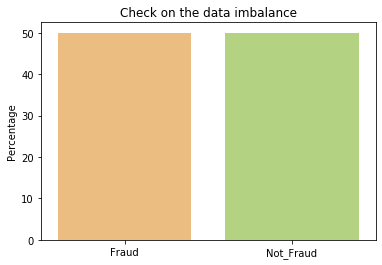

In [74]:
#Data Inbalance check for the Converted column.
yes=y_train_ada[y_train_ada['Fraud']==1]['Fraud'].value_counts()
no=y_train_ada[y_train_ada['Fraud']==0]['Fraud'].value_counts()

converted=np.array((yes/len(y_train_ada))*100) 
not_converted=np.array((no/len(y_train_ada))*100) 
stat_summ=pd.DataFrame({'Percentage':[converted[0],not_converted[0]]},index=['Fraud','Not_Fraud'])
sns.barplot(x=stat_summ.index,y=stat_summ['Percentage'],palette='RdYlGn')
plt.title('Check on the data imbalance')
plt.show()

We can see that the class imbalance problem has been addressed now with same percentage of total records present now for both the classes.

### - Logistic Regression on ADASYN Dataset

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [80]:
logreg = LogisticRegression()
rfe = RFE(logreg,17)
rfe = rfe.fit(X_train_ada,y_train_ada)

In [81]:
cols = X_train_ada.columns[rfe.support_]
cols

Index(['V2', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V22', 'V24', 'V26', 'V27', 'Amount'],
      dtype='object')

In [82]:
X_train_ada_lr = X_train_ada[cols]

In [84]:
model1 = sm.GLM(y_train_ada,(sm.add_constant(X_train_ada_lr)),family=sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Fraud   No. Observations:               398092
Model:                            GLM   Df Residuals:                   398074
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 29 Mar 2020   Deviance:                          nan
Time:                        10:53:19   Pearson chi2:                 9.38e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0210      0.013   -232.511      0.000      -3.046      -2.996
V2            -0.6286      0.009    -66.839      0.000      -0.647      -0.610
V3            -0.2283      0.006    -36.221      0.000      -0.241      -0.216
V4             2.2564      0.012    195.620      0.000       2.234       2.279
V7             0.2738      0.007     38.560      0.000       0.260       0.288
V8            -1.0826      0.009   -120.925      0.000      -1.100      -1.065
V9            -0.3598      0.008    -42.776      0.000      -0.376      -0.343
V10           -1.6852      0.013   -128.983      0.000      -1.711      -1.660
V11            1.1851      0.008    140.876      0.000       1.169       1.202
V12           -1.2670      0.010   -130.766      0.000      -1.286      -1.248
V14           -1.5266      0.010   -155.514      0.000      -1.546      -1.507
V16           -1.0406      0.011    -99.025      0.000      -1.061      -1.020
V17           -1.1000      0.012    -91.790      0.000      -1.123      -1.076
V22            0.3866      0.007     57.338      0.000       0.373       0.400
V24           -0.2721      0.007    -39.319      0.000      -0.286      -0.259
V26           -0.2893      0.008    -37.402      0.000      -0.304      -0.274
V27            0.4767      0.008     58.102      0.000       0.461       0.493
Amount        -0.6429      0.008    -84.748      0.000      -0.658      -0.628
==============================================================================
"""

In [85]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_ada_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_ada_lr.values, i) for i in range(X_train_ada_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,V10,8.24
9,V14,6.14
11,V17,5.65
10,V16,5.46
3,V7,4.76
0,V2,4.20
1,V3,4.17
7,V11,4.13
8,V12,3.64
5,V9,2.57


In [87]:
X_train_ada_lr.drop(['V10'],axis=1,inplace=True)

In [88]:
model2 = sm.GLM(y_train_ada,(sm.add_constant(X_train_ada_lr)),family=sm.families.Binomial())
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Fraud   No. Observations:               398092
Model:                            GLM   Df Residuals:                   398075
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 29 Mar 2020   Deviance:                          nan
Time:                        10:57:20   Pearson chi2:                 5.13e+14
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2969      0.009   -258.285      0.000      -2.314      -2.279
V2            -0.1289      0.007    -17.999      0.000      -0.143      -0.115
V3            -0.2768      0.006    -47.887      0.000      -0.288      -0.266
V4             1.5502      0.007    219.422      0.000       1.536       1.564
V7             0.3078      0.006     52.720      0.000       0.296       0.319
V8            -0.4002      0.006    -68.109      0.000      -0.412      -0.389
V9            -0.1558      0.007    -23.618      0.000      -0.169      -0.143
V11            0.8052      0.007    117.948      0.000       0.792       0.819
V12           -0.7878      0.007   -105.632      0.000      -0.802      -0.773
V14           -1.1346      0.008   -146.258      0.000      -1.150      -1.119
V16           -0.5310      0.008    -69.706      0.000      -0.546      -0.516
V17           -0.1686      0.007    -23.083      0.000      -0.183      -0.154
V22            0.4045      0.006     65.903      0.000       0.392       0.417
V24           -0.2309      0.006    -36.485      0.000      -0.243      -0.219
V26           -0.4728      0.007    -65.744      0.000      -0.487      -0.459
V27            0.4028      0.007     59.463      0.000       0.390       0.416
Amount        -0.2221      0.006    -36.244      0.000      -0.234      -0.210
==============================================================================
"""

In [89]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_ada_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_ada_lr.values, i) for i in range(X_train_ada_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,V17,5.61
9,V16,5.15
8,V14,5.13
3,V7,4.72
0,V2,4.19
1,V3,4.13
6,V11,3.98
7,V12,3.56
2,V4,2.56
5,V9,2.56


In [90]:
X_train_ada_lr.drop(['V17'],axis=1,inplace=True)

In [91]:
model3 = sm.GLM(y_train_ada,(sm.add_constant(X_train_ada_lr)),family=sm.families.Binomial())
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Fraud   No. Observations:               398092
Model:                            GLM   Df Residuals:                   398076
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1621e+05
Date:                Sun, 29 Mar 2020   Deviance:                   2.3243e+05
Time:                        10:58:36   Pearson chi2:                 8.58e+13
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2717      0.009   -259.235      0.000      -2.289      -2.254
V2            -0.0955      0.007    -13.795      0.000      -0.109      -0.082
V3            -0.2618      0.006    -46.003      0.000      -0.273      -0.251
V4             1.5191      0.007    221.185      0.000       1.506       1.533
V7             0.3195      0.006     55.816      0.000       0.308       0.331
V8            -0.3203      0.005    -70.342      0.000      -0.329      -0.311
V9            -0.1619      0.007    -24.722      0.000      -0.175      -0.149
V11            0.7431      0.006    120.900      0.000       0.731       0.755
V12           -0.7131      0.007   -109.219      0.000      -0.726      -0.700
V14           -1.0324      0.006   -168.152      0.000      -1.044      -1.020
V16           -0.4745      0.007    -67.542      0.000      -0.488      -0.461
V22            0.4173      0.006     68.565      0.000       0.405       0.429
V24           -0.2129      0.006    -34.027      0.000      -0.225      -0.201
V26           -0.4805      0.007    -66.720      0.000      -0.495      -0.466
V27            0.3998      0.007     60.377      0.000       0.387       0.413
Amount        -0.2112      0.006    -34.544      0.000      -0.223      -0.199
==============================================================================
"""

In [92]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_ada_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_ada_lr.values, i) for i in range(X_train_ada_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,V14,5.04
3,V7,4.44
0,V2,4.19
1,V3,4.12
6,V11,3.96
7,V12,3.46
9,V16,3.06
2,V4,2.54
5,V9,2.47
13,V27,2.04


In [93]:
X_train_ada_lr.drop(['V14'],axis=1,inplace=True)

In [96]:
model4 = sm.GLM(y_train_ada,(sm.add_constant(X_train_ada_lr)),family=sm.families.Binomial())
result = model4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Fraud   No. Observations:               398092
Model:                            GLM   Df Residuals:                   398077
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3519e+05
Date:                Sun, 29 Mar 2020   Deviance:                   2.7038e+05
Time:                        11:01:21   Pearson chi2:                 7.24e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9490      0.008   -250.706      0.000      -1.964      -1.934
V2             0.2352      0.006     41.665      0.000       0.224       0.246
V3            -0.4791      0.005    -92.081      0.000      -0.489      -0.469
V4             1.4963      0.007    225.510      0.000       1.483       1.509
V7             0.2999      0.005     60.983      0.000       0.290       0.310
V8            -0.3641      0.003   -105.965      0.000      -0.371      -0.357
V9            -0.1069      0.006    -17.341      0.000      -0.119      -0.095
V11            0.7483      0.005    137.610      0.000       0.738       0.759
V12           -0.4586      0.005    -87.361      0.000      -0.469      -0.448
V16           -0.2263      0.006    -40.030      0.000      -0.237      -0.215
V22            0.2140      0.005     40.094      0.000       0.203       0.224
V24           -0.2693      0.006    -45.981      0.000      -0.281      -0.258
V26           -0.4393      0.006    -69.423      0.000      -0.452      -0.427
V27            0.3437      0.006     57.051      0.000       0.332       0.355
Amount        -0.0661      0.005    -12.401      0.000      -0.077      -0.056
==============================================================================
"""

In [95]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_ada_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_ada_lr.values, i) for i in range(X_train_ada_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,V7,4.44
0,V2,4.18
1,V3,3.85
6,V11,3.44
7,V12,3.31
8,V16,3.05
2,V4,2.42
5,V9,2.37
12,V27,2.04
4,V8,1.90


We can see the p-values are in comparable range(<0.05) now and hence all values are significant. Also all the VIF values are in range less than 5 indicating no multi collinearity present within. Hence model4 is our final logisitc Regression model with which we can check for the metrics now.

In [106]:
y_df_logreg_ada = pd.DataFrame(data=y_train_ada.values,columns=['y_train_ada'])

In [107]:
#y_train_pred_logreg_ada
y_train_pred_logreg_ada = result.predict(sm.add_constant(X_train_ada_lr)).values.reshape(-1)

In [108]:
y_train_pred_logreg_ada[:10]

array([0.012182  , 0.5002404 , 0.01671589, 0.21964654, 0.03073339,
       0.10221418, 0.03352721, 0.04343404, 0.01915629, 0.5637544 ])

In [109]:
y_df_logreg_ada.shape

(398092, 1)

In [110]:
y_train_pred_logreg_ada.shape

(398092,)

In [111]:
y_df_logreg_ada['y_train_pred'] = y_train_pred_logreg_ada

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_df_logreg_ada[i]= y_df_logreg_ada.y_train_pred.map(lambda x: 1 if x > i else 0)
y_df_logreg_ada.head()

,y_train_ada,y_train_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.012182,1,0,0,0,0,0,0,0,0,0
1,0,0.500240,1,1,1,1,1,1,0,0,0,0
2,0,0.016716,1,0,0,0,0,0,0,0,0,0
3,0,0.219647,1,1,1,0,0,0,0,0,0,0
4,0,0.030733,1,0,0,0,0,0,0,0,0,0


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_df_logreg_ada.y_train_ada, y_df_logreg_ada[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500048     1.000000     0.000000
0.1          0.1  0.713506     0.981237     0.445723
0.2          0.2  0.801086     0.966478     0.635662
0.3          0.3  0.840753     0.939999     0.741487
0.4          0.4  0.857661     0.904293     0.811021
0.5          0.5  0.849138     0.835059     0.863220
0.6          0.6  0.826952     0.748685     0.905234
0.7          0.7  0.800890     0.664743     0.937064
0.8          0.8  0.786281     0.609479     0.963116
0.9          0.9  0.762309     0.541612     0.983048


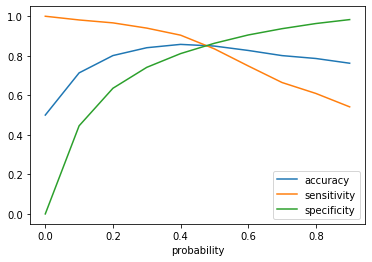

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df1 = pd.DataFrame( columns = ['probability','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_df_logreg_ada.y_train_ada, y_df_logreg_ada[i] )
    total1=sum(sum(cm1))
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    rec = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,prec, rec]
print(cutoff_df1)

     probability  precision    recall
0.0          0.0   0.500048  1.000000
0.1          0.1   0.639073  0.981237
0.2          0.2   0.726268  0.966478
0.3          0.3   0.784338  0.939999
0.4          0.4   0.827171  0.904293
0.5          0.5   0.859279  0.835059
0.6          0.6   0.887664  0.748685
0.7          0.7   0.913526  0.664743
0.8          0.8   0.942946  0.609479
0.9          0.9   0.969656  0.541612


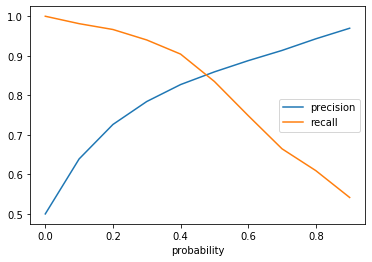

In [116]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df1.plot.line(x='probability', y=['precision','recall'])
plt.show()

0.5 seems to be a good cut-off probability after checking for the precision-recall tradeoff and the sensitivity-specificity values.

In [117]:
X_train_ada_cols = list(X_train_ada_lr.columns)

In [119]:
#Building the test dataset with the relevant columns of our logistic regression model
X_test_logreg = X_test[X_train_ada_cols]

In [121]:
X_test_logreg.shape

(85440, 14)

In [122]:
y_test.shape

(85440,)

In [123]:
#X_train_logreg
y_test_pred_logreg = result.predict(sm.add_constant(X_test_logreg)).values.reshape(-1)

In [124]:
y_df_logreg_test = pd.DataFrame(data=y_test.values,columns=['y_test'])

In [125]:
y_df_logreg_test['y_test_prob'] = y_test_pred_logreg

In [126]:
y_df_logreg_test['final_predicted'] = y_df_logreg_test.y_test_prob.map( lambda x: 1 if x > 0.5 else 0)

In [127]:
final_confusion_test = confusion_matrix(y_df_logreg_test['y_test'],y_df_logreg_test['final_predicted'])

In [128]:
final_confusion_test

array([[73440, 11840],
       [   11,   149]], dtype=int64)

In [129]:
TP = final_confusion_test[1,1] # true positive 
TN = final_confusion_test[0,0] # true negatives
FP = final_confusion_test[0,1] # false positives
FN = final_confusion_test[1,0] # false negatives

In [130]:
#Sensitivity / Recall
TP / float(TP + FN)

0.93125

In [131]:
#Specificity
TN / float(TN + FP)

0.8611632270168855

In [132]:
#Precision
TP / float(TP + FP)

0.012428059054132955

### <font color = 'purple'> <b> `LOGISTIC REGRESSION ON BALANCED DATASET WITH ADASYN -TEST` </b> <br>
`Recall`/`Sensitivity` -> 93% <br>
`Specificity`          -> 86% 

As we have seen, to handle the class imbalance we went with ADASYN which added on sample points for minority and hence we built a logistic Regression model on top of that. Even though the model gave very good performance in the train set and some of the metrics in test set as well, we wont be going ahead with this model since this model had so many misclassifications. The model offered good Recall metric of 93% but on the cost of compromising on the precision very much. Infact most of the records where falsely classified as fraudulent cases hence compromising on the Precision.

### Shuffling and sampling the train set to produce a new train set from the ADASYN datapoints.

In [75]:
X_train_ada.shape

(398092, 29)

In [76]:
y_train_ada.shape

(398092, 1)

In [77]:
X_train_ada_new = X_train_ada.copy()

In [78]:
X_train_ada_new['Fraud'] = y_train_ada['Fraud']

In [79]:
X_train_ada_fraud = X_train_ada_new.loc[X_train_ada_new['Fraud']==1]

In [80]:
X_train_ada_non_fraud = X_train_ada_new.loc[X_train_ada_new['Fraud']==0]

In [81]:
X_train_ada_fraud.shape

(199065, 30)

In [82]:
X_train_ada_non_fraud.shape

(199027, 30)

In [83]:
X_train_ada_fraud = X_train_ada_fraud.sample(frac=1)

In [84]:
X_train_ada_non_fraud = X_train_ada_non_fraud.sample(frac=1)

In [85]:
X_train_ada_fraud = X_train_ada_fraud[:50000]
X_train_ada_non_fraud = X_train_ada_non_fraud[:50000]

In [86]:
frames = [X_train_ada_fraud,X_train_ada_non_fraud]
X_train_ada_final = pd.concat(frames)

In [87]:
X_train_ada_final = X_train_ada_final.sample(frac=1)

In [88]:
X_train_ada_final

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
381671,-0.581665,-0.172971,1.644609,0.978317,0.266370,0.918754,-0.438008,-0.501100,0.685574,0.398319,0.869003,0.299757,-1.549545,-0.480973,-0.766303,-1.143561,0.518632,-0.314448,0.293863,-0.615209,0.962409,1.011808,-0.463799,-0.439299,-0.841489,-0.277545,0.042194,-0.939229,0.009819,1
281241,1.210742,-0.082046,-1.114498,0.292581,0.549263,0.193544,-0.028615,-0.065240,0.682020,-0.715523,0.352023,1.010872,0.501414,-1.662625,-1.078718,0.449603,0.744860,1.193421,0.908470,-0.002273,-0.176353,-0.264614,-0.201779,-0.871510,0.679707,0.075334,-0.035415,-0.030080,0.099692,1
278306,0.522817,0.318685,-0.478272,0.539840,0.237431,-0.538907,0.197242,-0.104900,-0.324958,-0.477100,1.990678,0.600683,-0.341634,-1.065156,0.442710,0.356880,1.359588,0.297868,-0.400064,-0.115986,-0.105418,-0.286759,-0.044243,0.200788,0.608170,0.792543,-0.035827,0.101821,-1.035432,1
94446,-0.165010,1.326880,-1.483384,0.969876,1.156247,-0.732995,0.720390,-0.291876,0.080194,-0.544287,0.369268,-0.705441,0.522099,-3.350726,1.606657,0.823314,3.675075,1.499776,-0.565844,0.225734,-0.210871,-0.256163,0.199268,-1.668413,-0.710587,-0.710300,-0.089473,0.285287,-1.046246,0
76381,-0.818921,0.008422,2.352296,-0.793700,-1.270693,0.339653,-0.718177,0.692720,-0.077159,-0.537209,-1.741394,1.042287,1.172714,-1.392217,-2.378994,-1.888636,0.818897,0.814875,-0.691289,-0.496903,-0.681775,-0.720610,-0.269131,0.747955,0.515112,1.885796,0.410159,0.215434,-0.423912,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144152,0.388858,-0.888070,0.899853,-0.270344,-1.468145,-0.049182,-0.880054,-0.013131,-0.575638,0.655049,1.395878,1.388498,1.439858,-0.445223,0.759400,-0.641539,-0.717464,2.442292,-1.271710,0.011790,0.059663,0.223608,-0.159781,1.050568,-0.295770,1.951771,-0.114179,0.182668,1.645483,0
80850,-1.450407,1.838196,-1.325665,-1.274355,0.673657,1.987485,-1.249800,3.550892,-0.755131,-0.833317,-0.970007,0.554970,0.175807,1.956386,0.344674,1.773097,-0.520475,0.161429,-0.608991,-0.505018,0.005031,-1.321214,0.384701,1.808654,0.021506,-0.146928,-1.879108,-0.279665,-0.768057,0
386974,1.273941,0.527827,-1.130463,2.411625,0.986648,0.716614,-0.068977,0.128489,-0.870485,0.485998,0.456512,-0.012010,0.612813,-2.445009,-1.625380,2.593311,0.909413,1.807377,-1.661555,-0.143159,0.055080,0.281991,-0.071064,-0.556593,0.285332,0.331728,0.009682,0.018213,-0.653141,1
126466,1.228086,-0.421243,-0.911313,0.019067,0.364002,0.831610,-0.280874,0.282390,0.833786,-0.131711,1.043253,1.626144,-0.466220,0.405210,-0.171524,-1.269077,0.495790,-1.693853,-0.453150,-0.394390,-0.034205,0.201936,0.372054,-2.031186,-0.599672,0.115447,0.021752,-0.231961,-0.130177,0


In [89]:
X_train_ada_sampled = X_train_ada_final.drop(['Fraud'],axis=1)
y_train_ada_sampled = X_train_ada_final['Fraud']

### - Random Forest on ADASYN Dataset

In [117]:
from sklearn.ensemble import RandomForestClassifier

##### Hyper parameter tuning for Random Forest

#### MAX DEPTH

In [118]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'max_depth': range(2, 15, 3)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="recall",return_train_score=True)
rf.fit(X_train_ada_sampled,y_train_ada_sampled)
end = time.time()

In [122]:
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 13.21


In [123]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,14.709362,0.105734,0.378071,0.006966,2,{'max_depth': 2},0.717946,0.742590,0.719746,0.72676,0.011217,5,0.718657,0.739035,0.724057,0.72725,0.008620
1,33.645239,2.094124,0.540599,0.021911,5,{'max_depth': 5},0.891222,0.895116,0.896262,0.89420,0.002157,4,0.895659,0.890562,0.899799,0.89534,0.003778
2,47.382774,0.688279,0.657975,0.006237,8,{'max_depth': 8},0.962501,0.965199,0.966161,0.96462,0.001549,3,0.967450,0.965081,0.963850,0.96546,0.001494
3,60.848572,4.681770,0.812653,0.033892,11,{'max_depth': 11},0.997180,0.996940,0.998440,0.99752,0.000658,2,0.998290,0.997720,0.998350,0.99812,0.000284
4,63.306189,0.288266,0.877671,0.023442,14,{'max_depth': 14},1.000000,1.000000,1.000000,1.00000,0.000000,1,1.000000,1.000000,1.000000,1.00000,0.000000


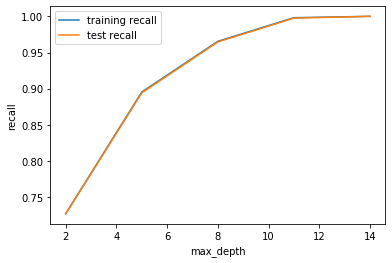

In [124]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

Both train and test scores are in similar range throught out the range of values for max_depth. Hence we will select max_depth around 6,so that it wont overfit much on the train set.

#### N ESTIMATORS

In [128]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'n_estimators': range(200, 1500, 500)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=6)
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,scoring="recall",return_train_score=True)
rf.fit(X_train_ada_sampled,y_train_ada_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 43.21


In [129]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,27.898545,0.107642,0.417008,0.014962,200,{'n_estimators': 200},0.927761,0.938258,0.932561,0.93286,0.004290,3,0.934029,0.938321,0.934509,0.93562,0.001920
1,210.380165,70.449473,3.790643,0.083315,700,{'n_estimators': 700},0.939701,0.942698,0.931841,0.93808,0.004578,1,0.943539,0.943241,0.934899,0.94056,0.004005
2,456.325488,2.587545,6.751000,0.258862,1200,{'n_estimators': 1200},0.933461,0.939578,0.932261,0.93510,0.003204,2,0.937869,0.939461,0.934809,0.93738,0.001930


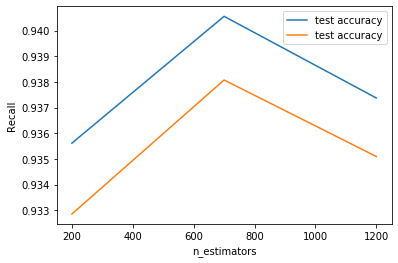

In [130]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="test accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

We could see the recall is almost in similar range through out the range of n_estimator values. Hence n_estimator to be taken around 200.

#### MAX_FEATURES

In [131]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
# instantiate the model
rf = RandomForestClassifier(max_depth=6)
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="recall",return_train_score=True)
rf.fit(X_train_ada_sampled,y_train_ada_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 29.91


In [132]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,31.027958,1.044380,0.555371,0.005213,4,{'max_features': 4},0.929081,0.931477,0.937181,0.93258,0.003397,5,0.932079,0.930131,0.938079,0.93343,0.003382
1,58.516078,0.263132,0.551113,0.004699,8,{'max_features': 8},0.946241,0.952898,0.940841,0.94666,0.004931,4,0.949869,0.953621,0.941709,0.94840,0.004973
2,99.735727,0.214285,0.562262,0.009943,14,{'max_features': 14},0.954641,0.957638,0.962501,0.95826,0.003239,3,0.958120,0.959021,0.962110,0.95975,0.001709
3,141.286903,0.108662,0.582888,0.022258,20,{'max_features': 20},0.963881,0.961238,0.960941,0.96202,0.001321,2,0.966160,0.963191,0.961510,0.96362,0.001922
4,170.220702,0.345875,0.578368,0.039001,24,{'max_features': 24},0.966101,0.966819,0.961121,0.96468,0.002534,1,0.968110,0.967481,0.963820,0.96647,0.001892


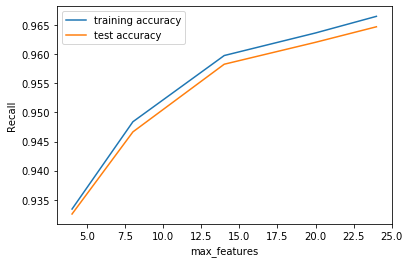

In [133]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

We will select max_features of 5.

#### MIN_SAMPLES_LEAF

In [134]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'min_samples_leaf': range(50,300,50)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="recall",return_train_score=True)
rf.fit(X_train_ada_sampled,y_train_ada_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 16.07


In [135]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,61.999163,0.624505,0.874183,0.019857,50,{'min_samples_leaf': 50},0.996700,0.997780,0.99838,0.99762,0.000695,1,0.99829,0.99874,0.99934,0.99879,0.000430
1,57.375800,0.462913,0.864489,0.026044,100,{'min_samples_leaf': 100},0.991780,0.993280,0.99322,0.99276,0.000693,2,0.99436,0.99424,0.99421,0.99427,0.000065
2,54.277784,0.552905,0.809770,0.017674,150,{'min_samples_leaf': 150},0.986320,0.989080,0.98728,0.98756,0.001144,3,0.99016,0.99157,0.98833,0.99002,0.001327
3,51.134354,0.420066,0.825545,0.032162,200,{'min_samples_leaf': 200},0.977440,0.982179,0.97930,0.97964,0.001949,4,0.98251,0.98317,0.98161,0.98243,0.000640
4,49.295439,0.174890,0.792881,0.055170,250,{'min_samples_leaf': 250},0.969761,0.976299,0.97648,0.97418,0.003126,5,0.97558,0.97828,0.97813,0.97733,0.001239


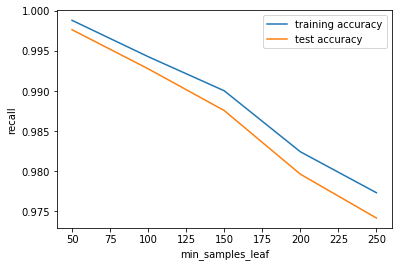

In [136]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.legend()
plt.show()

We will go forward with 250 samples per leaf.

#### MIN_SAMPLES_SPLIT

In [137]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'min_samples_split': range(100, 300, 50)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="recall",return_train_score=True)
rf.fit(X_train_ada_sampled,y_train_ada_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 18.0


In [138]:
 # scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,77.232679,1.094594,1.018293,0.096974,100,{'min_samples_split': 100},0.99940,0.99994,0.99934,0.99956,0.000270,1,0.99991,1.00000,0.99976,0.99989,0.000099
1,76.705293,0.271995,1.008967,0.048854,150,{'min_samples_split': 150},0.99736,0.99892,0.99928,0.99852,0.000833,2,0.99901,0.99940,0.99958,0.99933,0.000238
2,76.122680,0.403144,0.979836,0.035988,200,{'min_samples_split': 200},0.99586,0.99664,0.99808,0.99686,0.000920,3,0.99745,0.99820,0.99844,0.99803,0.000422
3,75.620458,0.623022,0.934574,0.002969,250,{'min_samples_split': 250},0.99586,0.99502,0.99694,0.99594,0.000786,4,0.99730,0.99646,0.99763,0.99713,0.000493


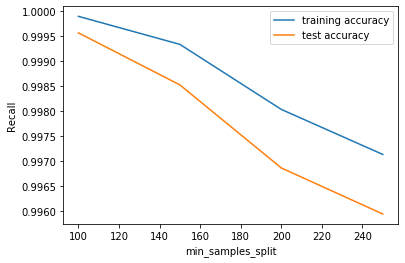

In [139]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

We can combine all the hyper parameter values which we got in the previous steps and build our random forest model with that and observe the metrics which the model is offering on train and test.

In [140]:
rf = RandomForestClassifier(n_estimators=200,max_depth=6,max_features=5,min_samples_leaf=250,min_samples_split=500)
rf.fit(X_train_ada_sampled,y_train_ada_sampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=250, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [141]:
y_train_pred_rf_ada = rf.predict(X_train_ada_sampled)

In [142]:
accuracy_score(y_train_ada_sampled,y_train_pred_rf_ada)

0.94828

In [143]:
confusion = confusion_matrix(y_train_ada_sampled,y_train_pred_rf_ada)

In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
confusion

array([[48365,  1635],
       [ 3537, 46463]], dtype=int64)

In [146]:
#Sensitivity / Recall
TP / float(TP + FN)

0.92926

In [147]:
#Specificity
TN / float(TN + FP)

0.9673

In [148]:
#Precision
TP / float(TP+FP)

0.9660069025739116

<font color = 'purple'> <b> `RANDOM FOREST ON BALANCED DATASET WITH ADASYN -TRAIN` </b> <br>
`Recall`/`Sensitivity` -> 93% <br>
`Specificity`          -> 97% <br>
`Precision`            -> 97%
    

Random Forest model seems to be a pretty good model on our sampled train set. Lets evaluate now on test set.

In [149]:
X_test.shape

(85440, 29)

In [150]:
y_test.shape

(85440,)

In [151]:
y_test_pred_rf_ada = rf.predict(X_test)

In [152]:
accuracy_score(y_test,y_test_pred_rf_ada)

0.9659878277153559

In [153]:
confusion_rf = confusion_matrix(y_test,y_test_pred_rf_ada)

In [154]:
confusion_rf

array([[82386,  2894],
       [   12,   148]], dtype=int64)

In [155]:
TP = confusion_rf[1,1] # true positive 
TN = confusion_rf[0,0] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

In [156]:
#Sensitivity / Recall
TP / float(TP + FN)

0.925

In [157]:
#Specificity
TN / float(TN + FP)

0.9660647279549719

In [158]:
#Precision
TP / float(TP+FP)

0.04865220249835635

### <font color = 'purple'> <b> `RANDOM FOREST ON BALANCED DATASET WITH ADASYN -TEST` </b> <br>
`Recall`/`Sensitivity` -> 93% <br>
`Specificity`          -> 97% <br>
`Precision`            -> 5% <br> 
<font color = 'black'> We can see that we are getting a similar recall specificity values with the randome forest model on test set similar to the train set. But there is a serious trade off between precision and recall, hence compromising on the precision to a greater extend.   

### - XGBoost on ADASYN dataset

In [90]:
#Importing the libraries for XGBoost.
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [93]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
xgb_model = XGBClassifier()
# fit tree on training data
xgb_model1 = GridSearchCV(xgb_model, parameters, cv=n_folds, scoring="recall",return_train_score=True)
xgb_model1.fit(X_train_ada_sampled,y_train_ada_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 24.15


In [94]:
cv_results = pd.DataFrame(xgb_model1.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,33.434640,2.767362,0.234319,0.014288,2,{'max_depth': 2},0.939101,0.941141,0.942518,0.94092,0.001404,4,0.939729,0.944439,0.943511,0.94256,0.002037
1,93.690843,1.164120,0.628873,0.042170,7,{'max_depth': 7},1.000000,1.000000,0.999940,0.99998,0.000028,1,1.000000,1.000000,1.000000,1.00000,0.000000
2,138.959170,6.576016,0.837800,0.026194,12,{'max_depth': 12},1.000000,1.000000,0.999940,0.99998,0.000028,1,1.000000,1.000000,1.000000,1.00000,0.000000
3,160.994607,0.806620,0.938804,0.032114,17,{'max_depth': 17},1.000000,1.000000,0.999940,0.99998,0.000028,1,1.000000,1.000000,1.000000,1.00000,0.000000


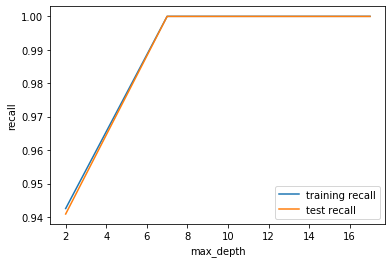

In [95]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training recall")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

We will go ahead with max_depth of 4.

In [96]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 200)}
# instantiate the model (note we are specifying a max_depth)
xgb_model = XGBClassifier(max_depth=4)
# fit tree on training data
xgb_model1 = GridSearchCV(xgb_model, parameters, cv=n_folds, scoring="recall",return_train_score=True)
xgb_model1.fit(X_train_ada_sampled,y_train_ada_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 33.05


In [97]:
cv_results = pd.DataFrame(xgb_model1.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,28.763637,11.861300,0.135293,0.000474,100,{'n_estimators': 100},0.99772,0.99868,0.99568,0.99736,0.001251,5,0.9982,0.99922,0.99727,0.99823,0.000796
1,69.345524,8.474694,0.391124,0.027225,300,{'n_estimators': 300},1.00000,1.00000,0.99994,0.99998,0.000028,1,1.0000,1.00000,1.00000,1.00000,0.000000
2,121.793020,1.963204,0.744245,0.046221,500,{'n_estimators': 500},1.00000,1.00000,0.99994,0.99998,0.000028,1,1.0000,1.00000,1.00000,1.00000,0.000000
3,175.317449,3.427905,1.079150,0.069045,700,{'n_estimators': 700},1.00000,1.00000,0.99994,0.99998,0.000028,1,1.0000,1.00000,1.00000,1.00000,0.000000
4,214.922429,3.128693,1.293852,0.024203,900,{'n_estimators': 900},1.00000,1.00000,0.99994,0.99998,0.000028,1,1.0000,1.00000,1.00000,1.00000,0.000000


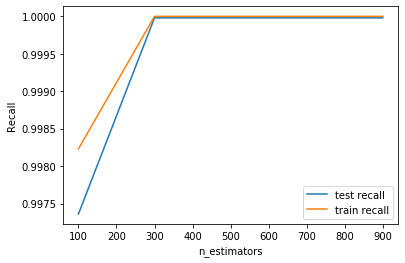

In [98]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_test_score"], 
         label="test recall")
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_train_score"], 
         label="train recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

We can see that with more no of estimators the recall value is touching 1 indicating clear overfitting. Hence to avoid this, we will select n_estimators to be around 100 only.

In [99]:
start = time.time()
# hyperparameter tuning with XGBoost
# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2,0.4,0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=4, n_estimators=100)
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds,  
                        verbose = 1,
                        return_train_score=True)  
model_cv.fit(X_train_ada_sampled,y_train_ada_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  9.4min finished


Amount of time taken for the above query in minutes: 9.83


In [100]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,13.947098,0.163976,0.144941,0.003390,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",1.00000,0.99994,0.99988,0.99994,0.000049,7,1.00000,0.99985,0.99994,0.99993,0.000062
1,20.360523,0.865416,0.158244,0.006867,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.99994,0.99988,0.99976,0.99986,0.000075,9,0.99997,0.99997,0.99979,0.99991,0.000085
2,26.574062,1.690646,0.206578,0.026770,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",1.00000,0.99982,0.99988,0.99990,0.000075,8,0.99997,0.99994,0.99991,0.99994,0.000024
3,18.587282,3.513948,0.177650,0.026219,0.4,0.3,"{'learning_rate': 0.4, 'subsample': 0.3}",1.00000,1.00000,0.99994,0.99998,0.000028,1,1.00000,1.00000,1.00000,1.00000,0.000000
4,20.542415,0.165289,0.163636,0.004449,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",1.00000,1.00000,0.99994,0.99998,0.000028,1,1.00000,1.00000,1.00000,1.00000,0.000000
5,23.201748,0.291726,0.167036,0.007667,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",1.00000,1.00000,0.99994,0.99998,0.000028,1,1.00000,1.00000,1.00000,1.00000,0.000000
6,14.695173,0.065354,0.162328,0.002169,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",1.00000,1.00000,0.99994,0.99998,0.000028,1,1.00000,1.00000,1.00000,1.00000,0.000000
7,21.495339,0.874233,0.183048,0.015840,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",1.00000,1.00000,0.99994,0.99998,0.000028,1,1.00000,1.00000,1.00000,1.00000,0.000000
8,24.656225,0.716641,0.178591,0.018432,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",1.00000,1.00000,0.99994,0.99998,0.000028,1,1.00000,1.00000,1.00000,1.00000,0.000000


In [101]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,13.947098,0.163976,0.144941,0.003390,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",1.00000,0.99994,0.99988,0.99994,0.000049,7,1.00000,0.99985,0.99994,0.99993,0.000062
1,20.360523,0.865416,0.158244,0.006867,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.99994,0.99988,0.99976,0.99986,0.000075,9,0.99997,0.99997,0.99979,0.99991,0.000085
2,26.574062,1.690646,0.206578,0.026770,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",1.00000,0.99982,0.99988,0.99990,0.000075,8,0.99997,0.99994,0.99991,0.99994,0.000024
3,18.587282,3.513948,0.177650,0.026219,0.4,0.3,"{'learning_rate': 0.4, 'subsample': 0.3}",1.00000,1.00000,0.99994,0.99998,0.000028,1,1.00000,1.00000,1.00000,1.00000,0.000000
4,20.542415,0.165289,0.163636,0.004449,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",1.00000,1.00000,0.99994,0.99998,0.000028,1,1.00000,1.00000,1.00000,1.00000,0.000000


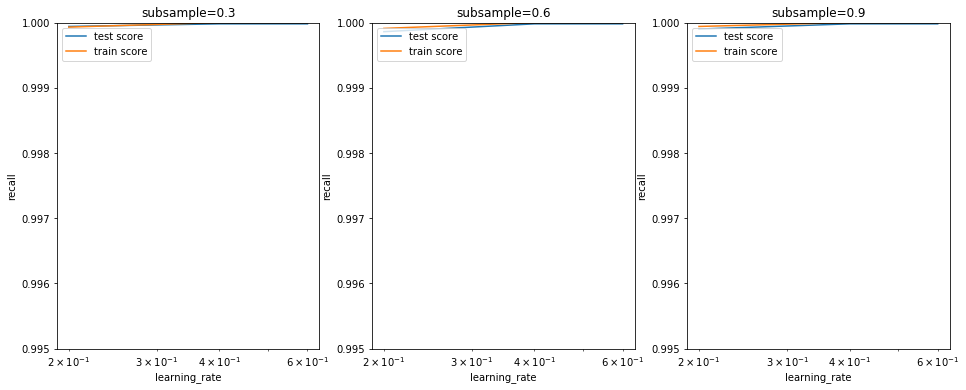

In [105]:
#plotting
plt.figure(figsize=(16,6))
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 
for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('recall')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.995, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

We can see a high recall rate in all the cases. Hence we can go with lower values learning rate of 0.2 and subsample of 0.3.

In [106]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 4, 
          'n_estimators':100,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_ada_sampled,y_train_ada_sampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [107]:
# predict
y_pred = model.predict_proba(X_train_ada_sampled)
y_pred[:10]

array([[3.8219655e-01, 6.1780345e-01],
       [3.6508977e-01, 6.3491023e-01],
       [1.5686089e-01, 8.4313911e-01],
       [4.7917324e-01, 5.2082676e-01],
       [9.9608278e-01, 3.9172010e-03],
       [3.5194755e-03, 9.9648052e-01],
       [3.6541820e-03, 9.9634582e-01],
       [2.7108192e-02, 9.7289181e-01],
       [9.9918723e-01, 8.1275415e-04],
       [9.9911851e-01, 8.8146672e-04]], dtype=float32)

In [108]:
import sklearn

In [109]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_train_ada_sampled, y_pred[:, 1])
auc

0.9968814224000001

In [110]:
xgb_df = pd.DataFrame(y_pred[:, 1],columns=["Predicted_probability"])

In [111]:
xgb_df['Churn'] = y_train_ada_sampled.values

In [112]:
xgb_df

,Predicted_probability,Churn
0,0.617803,1
1,0.634910,1
2,0.843139,1
3,0.520827,0
4,0.003917,0
...,...,...
99995,0.024092,0
99996,0.000546,0
99997,0.949550,1
99998,0.005444,0


In [113]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    xgb_df[i]= xgb_df.Predicted_probability.map(lambda x: 1 if x > i else 0)
xgb_df.head()

,Predicted_probability,Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.617803,1,1,1,1,1,1,1,1,0,0,0
1,0.634910,1,1,1,1,1,1,1,1,0,0,0
2,0.843139,1,1,1,1,1,1,1,1,1,1,0
3,0.520827,0,1,1,1,1,1,1,0,0,0,0
4,0.003917,0,1,0,0,0,0,0,0,0,0,0


In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(xgb_df.Churn, xgb_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0   0.50000      1.00000      0.00000
0.1          0.1   0.88222      1.00000      0.76444
0.2          0.2   0.93669      0.99994      0.87344
0.3          0.3   0.96064      0.99988      0.92140
0.4          0.4   0.97354      0.99762      0.94946
0.5          0.5   0.97659      0.98672      0.96646
0.6          0.6   0.97222      0.96614      0.97830
0.7          0.7   0.95847      0.93034      0.98660
0.8          0.8   0.93027      0.86706      0.99348
0.9          0.9   0.85169      0.70476      0.99862


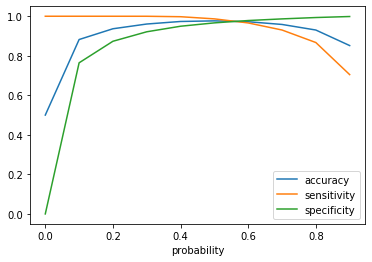

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df1 = pd.DataFrame( columns = ['probability','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(xgb_df.Churn, xgb_df[i] )
    total1=sum(sum(cm1))
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    rec = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,prec, rec]
print(cutoff_df1)

     probability  precision   recall
0.0          0.0   0.500000  1.00000
0.1          0.1   0.809350  1.00000
0.2          0.2   0.887652  0.99994
0.3          0.3   0.927120  0.99988
0.4          0.4   0.951782  0.99762
0.5          0.5   0.967126  0.98672
0.6          0.6   0.978033  0.96614
0.7          0.7   0.985801  0.93034
0.8          0.8   0.992536  0.86706
0.9          0.9   0.998046  0.70476


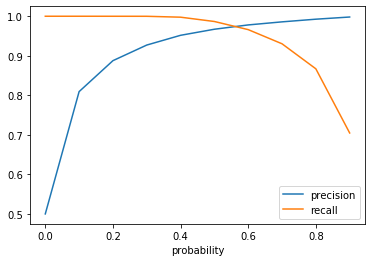

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df1.plot.line(x='probability', y=['precision','recall'])
plt.show()

In [118]:
#Selecting the cut-off probability as 0.4 and predicting for Churn.
xgb_df['Final_predicted'] = xgb_df.Predicted_probability.map( lambda x: 1 if x > 0.55 else 0)
xgb_df.head()

,Predicted_probability,Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0.617803,1,1,1,1,1,1,1,1,0,0,0,1
1,0.634910,1,1,1,1,1,1,1,1,0,0,0,1
2,0.843139,1,1,1,1,1,1,1,1,1,1,0,1
3,0.520827,0,1,1,1,1,1,1,0,0,0,0,0
4,0.003917,0,1,0,0,0,0,0,0,0,0,0,0


In [119]:
#Function to plot for the Reciever Operating Characteristics (ROC) and to find out the AUC.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve(xgb_df['Churn'],xgb_df['Final_predicted'], drop_intermediate = False )

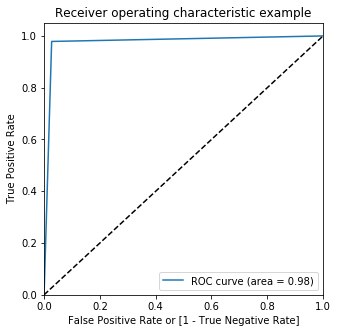

In [121]:
draw_roc(xgb_df['Churn'],xgb_df['Final_predicted'])

In [122]:
y_pred_test = model.predict_proba(X_test)
y_pred_test[:10]

array([[0.98820865, 0.01179135],
       [0.9789042 , 0.02109581],
       [0.97909623, 0.02090377],
       [0.9927339 , 0.00726613],
       [0.98091644, 0.01908353],
       [0.966469  , 0.03353102],
       [0.9744885 , 0.02551152],
       [0.8809068 , 0.11909318],
       [0.9808764 , 0.01912359],
       [0.9906412 , 0.00935884]], dtype=float32)

In [123]:
xgb_test_df = pd.DataFrame(y_pred_test[:, 1],columns=["Predicted_probability"])

In [124]:
xgb_test_df['y_test'] = y_test.values

In [125]:
xgb_test_df.head()

,Predicted_probability,y_test
0,0.011791,0
1,0.021096,0
2,0.020904,0
3,0.007266,0
4,0.019084,0


In [126]:
#Selecting the cut-off probability as 0.4 and predicting for Churn.
xgb_test_df['Final_predicted'] = xgb_test_df.Predicted_probability.map( lambda x: 1 if x > 0.55 else 0)
xgb_test_df.head()

,Predicted_probability,y_test,Final_predicted
0,0.011791,0,0
1,0.021096,0,0
2,0.020904,0,0
3,0.007266,0,0
4,0.019084,0,0


In [127]:
confusion_xgb = confusion_matrix(xgb_test_df['y_test'],xgb_test_df['Final_predicted'])
confusion_xgb

array([[82887,  2393],
       [   11,   149]], dtype=int64)

In [128]:
TP = confusion_xgb[1,1] # true positive 
TN = confusion_xgb[0,0] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

In [129]:
#Sensitivity / Recall
TP / float(TP + FN)

0.93125

In [130]:
#Specificity
TN / float(TN + FP)

0.9719394934333959

In [131]:
#Precision
TP / float(TP + FP)

0.05861526357199056

### <font color = 'purple'> <b> `XGBOOST ON BALANCED DATASET WITH ADASYN -TEST` </b> <br>
`Recall`/`Sensitivity` -> 93% <br>
`Specificity`          -> 97% <br>
`Precision`            -> 6% <br> 

We can see that all the metrics - recall/sensitivity, specificity and precision with the XGBOOST model on ADASYN balanced dataset is almost similar to our random forest model. While offering great metrics on the recall, there is serious trade off with the precision with which the class 1 data points are predicted.

______________________________________

# <font color='red'>Random Forest with oversampling using class weight</font>

#### Using class_weight based on Fraud and legitimate transaction counts

#### Tuning max_depth

In [653]:
start = time.time()

#
rf_ro = RandomForestClassifier(class_weight={0:0.001, 1:0.999},n_jobs=1)

params = {
        'max_depth': range(2, 14, 2)
}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

rf_ro = GridSearchCV(estimator = rf_ro,
                    cv=folds,
                    param_grid=params,
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose=1)

# fit
rf_ro.fit(X_train, y_train)

end = time.time()

print('I took:',np.round((end-start)/60,2),' minutes to complete !!')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


I took: 1.09  minutes to complete !!


#### Tuning n_estimators

In [74]:
start = time.time()

#
rf_ro = RandomForestClassifier(max_depth=4, class_weight={0:0.001, 1:0.999},n_jobs=1)

params = {
        'n_estimators': range(200, 801, 200)
}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

rf_ro = GridSearchCV(estimator = rf_ro,
                    cv=folds,
                    param_grid=params,
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose=1)

# fit
rf_ro.fit(X_train, y_train)

end = time.time()

print('I took:',np.round((end-start)/60,2),' minutes to complete !!')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 21.6min finished


I took: 22.81  minutes to complete !!


In [76]:
rf_ro.best_params_

{'n_estimators': 200}

#### Tuning max_features

In [77]:
start = time.time()

#
rf_ro3 = RandomForestClassifier(max_depth=4,
                               n_estimators=200,
                               class_weight={0:0.001, 1:0.999},
                               n_jobs=1)

params = {
        'max_features': range(5,21,5)
}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

rf_ro3 = GridSearchCV(estimator = rf_ro3,
                    cv=folds,
                    param_grid=params,
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose=1)

# fit
rf_ro3.fit(X_train, y_train)

end = time.time()

print('I took:',np.round((end-start)/60,2),' minutes to complete !!')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 18.1min finished


I took: 20.43  minutes to complete !!


In [78]:
rf_ro3.best_params_

{'max_features': 10}

#### Tuning min_samples_leaf

In [79]:
start = time.time()

#
rf_ro4 = RandomForestClassifier(max_depth=4,
                               n_estimators=200,
                               max_features=10,
                               class_weight={0:0.001, 1:0.999},
                               n_jobs=1)

params = {
        'min_samples_leaf': range(5, 21, 5)
}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

rf_ro4 = GridSearchCV(estimator = rf_ro4,
                    cv=folds,
                    param_grid=params,
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose=1)

# fit
rf_ro4.fit(X_train, y_train)

end = time.time()

print('I took:',np.round((end-start)/60,2),' minutes to complete !!')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 14.5min finished


I took: 16.87  minutes to complete !!


In [80]:
rf_ro4.best_params_

{'min_samples_leaf': 15}

#### Tuning min_samples_split

In [81]:
start = time.time()

#
rf_ro5 = RandomForestClassifier(max_depth=4,
                               n_estimators=200,
                               max_features=10,
                               min_samples_leaf=15,
                               class_weight={0:0.001, 1:0.999},
                               n_jobs=1)

params = {
        'min_samples_split': range(10, 101, 20)
}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

rf_ro5 = GridSearchCV(estimator = rf_ro5,
                    cv=folds,
                    param_grid=params,
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose=1)

# fit
rf_ro5.fit(X_train, y_train)

end = time.time()

print('I took:',np.round((end-start)/60,2),' minutes to complete !!')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 26.9min finished


I took: 29.16  minutes to complete !!


In [82]:
rf_ro5.best_params_

{'min_samples_split': 90}

#### Using all the hyperparameter values

In [ ]:
rf_roTuned = RandomForestClassifier(max_depth=4,
                               n_estimators=200,
                               max_features=10,
                               min_samples_leaf=15,
                               min_samples_split=90,
                               class_weight={0:0.001, 1:0.999},
                               n_jobs=1,
                               random_state = 100)

In [84]:
rf_roTuned.fit(X_train, y_train)

y_train_pred = rf_roTuned.predict(X_train)
y_test_pred = rf_roTuned.predict(X_test)

In [85]:
# Printing classification report
print(classification_report(y_train, y_train_pred))
print(metrics.accuracy_score(y_train, y_train_pred))
# find precision score and recall score
precisionScore = precision_score(y_train, y_train_pred)
print('Precision score is:',precisionScore)
recallScore = recall_score(y_train, y_train_pred)
print('Recall score is:',recallScore)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    199027
           1       0.16      0.91      0.27       332

    accuracy                           0.99    199359
   macro avg       0.58      0.95      0.63    199359
weighted avg       1.00      0.99      0.99    199359

0.9918990364116995
Precision score is: 0.16040232927474854
Recall score is: 0.9126506024096386


In [86]:
# Printing classification report
print(classification_report(y_test, y_test_pred))
print(metrics.accuracy_score(y_test, y_test_pred))
# find precision score and recall score
precisionScore = precision_score(y_test, y_test_pred)
print('Precision score is:',precisionScore)
recallScore = recall_score(y_test, y_test_pred)
print('Recall score is:',recallScore)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85280
           1       0.16      0.89      0.28       160

    accuracy                           0.99     85440
   macro avg       0.58      0.94      0.64     85440
weighted avg       1.00      0.99      0.99     85440

0.9913506554307117
Precision score is: 0.1645422943221321
Recall score is: 0.8875


[[197441   1586]
 [    29    303]]


Text(0.5, -3.0, 'Predicted label')

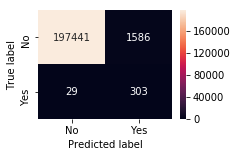

In [88]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

plt.figure(figsize=(3,2))
sns.heatmap(confusion, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

[[84559   721]
 [   18   142]]


Text(0.5, -3.0, 'Predicted label')

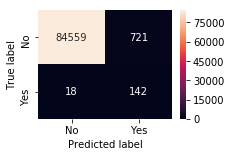

In [93]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

plt.figure(figsize=(3,2))
sns.heatmap(confusion, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Storing all metics in the model metrics data frame
trainAccuracy = metrics.accuracy_score(y_train, y_train_pred)
trainPrecision = precision_score(y_train, y_train_pred)
trainRecall = recall_score(y_train, y_train_pred)
testAccuracy = metrics.accuracy_score(y_test, y_test_pred)
testPrecision = precision_score(y_test, y_test_pred)
testRecall = recall_score(y_test, y_test_pred)

hyperparams = 'max_depth=4,n_estimators=200,max_features=10,min_samples_leaf=15,min_samples_split=90'
#Adding metrics into the dataframe
dfAllModelMetrics.loc[dfAllModelMetrics.shape[0]] = ['Random_Forest_RandomOversampling_Tuned', hyperparams, 
                TN, FP, FN, TP,
                trainAccuracy,trainPrecision,trainRecall,
                testAccuracy,testPrecision,testRecall]

In [96]:
dfAllModelMetrics.head()

,ModelName,Hyperparams,TestTN,TestFP,TestFN,TestTP,TrainAccuracy,TrainPrecision,TrainRecall,TestAccuracy,TestPrecision,TestRecall
0,Random_Forest_RandomOversampling_Tune,,84559,721,18,142,0.991899,0.160402,0.912651,0.991351,0.164542,0.8875


# <font color='purple'>SMOTE - Using this technique for handling imbalance and then evaluating different models</font>

### Print the class distribution after applying SMOTE 

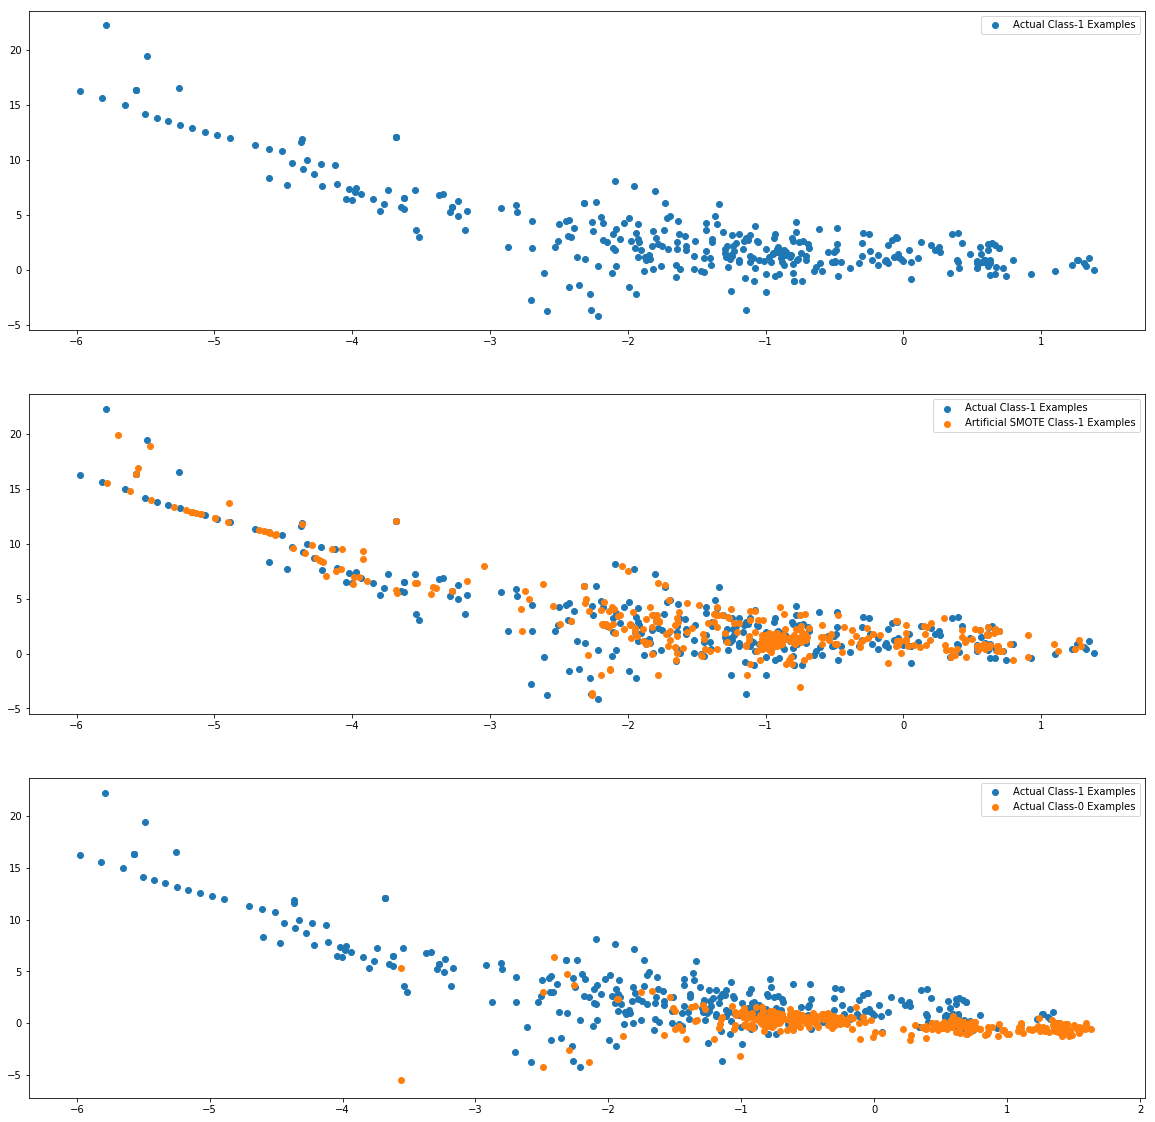

In [63]:
import warnings
warnings.filterwarnings("ignore")


smotesampl = SMOTE(random_state=0)
X_train_smote, y_train_smote = smotesampl.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [64]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))

After OverSampling, the shape of train_X: (398054, 29)
After OverSampling, the shape of train_y: (398054,) 

After OverSampling, counts of label '1': 199027
After OverSampling, counts of label '0': 199027


In [65]:
#Creating dataframe from resampled data
X_train_smote_res=pd.DataFrame(data=X_train_smote[0:,0:],
                               index=[i for i in range(X_train_smote.shape[0])],
                               columns=X_train.columns)

y_train_smote_res=pd.DataFrame(data=y_train_smote,
                               index=[i for i in range(y_train_smote.shape[0])],
                               columns=['Class'])

In [66]:
#Taking backup of the data to use for different models
X_train_smote_res_bkup = X_train_smote_res.copy()
y_train_smote_res_bkup = y_train_smote_res.copy()

# <font color='red'>Logistic Regression with SMOTE</font>

In [413]:
# Logistic regression model
logm1 = sm.GLM(y_train_smote_res,(sm.add_constant(X_train_smote_res)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398054
Model:                            GLM   Df Residuals:                   398024
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 22 Mar 2020   Deviance:                          nan
Time:                        14:12:11   Pearson chi2:                 7.67e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8849      0.019   -208.036      0.000      -3.921      -3.848
V1             0.2029      0.015     13.898      0.000       0.174       0.232
V2            -0.2742      0.014    -20.113      0.000      -0.301      -0.247
V3            -0.1400      0.010    -13.906      0.000      -0.160      -0.120
V4             1.9132      0.015    125.374      0.000       1.883       1.943
V5             0.0727      0.012      6.293      0.000       0.050       0.095
V6            -0.0458      0.011     -4.029      0.000      -0.068      -0.024
V7             0.1109      0.010     11.590      0.000       0.092       0.130
V8            -0.9269      0.012    -75.952      0.000      -0.951      -0.903
V9            -0.2600      0.015    -17.622      0.000      -0.289      -0.231
V10           -1.2402      0.020    -63.534      0.000      -1.278      -1.202
V11            1.0298      0.012     82.506      0.000       1.005       1.054
V12           -1.2015      0.017    -71.076      0.000      -1.235      -1.168
V13           -0.1699      0.008    -20.353      0.000      -0.186      -0.154
V14           -1.2842      0.016    -82.714      0.000      -1.315      -1.254
V15            0.0414      0.008      4.923      0.000       0.025       0.058
V16           -0.7577      0.016    -48.312      0.000      -0.788      -0.727
V17           -0.8333      0.017    -49.816      0.000      -0.866      -0.800
V18           -0.1692      0.013    -13.409      0.000      -0.194      -0.144
V19           -0.0227      0.009     -2.557      0.011      -0.040      -0.005
V20            0.1104      0.009     11.734      0.000       0.092       0.129
V21            0.1248      0.008     14.708      0.000       0.108       0.141
V22            0.3735      0.010     37.531      0.000       0.354       0.393
V23            0.0028      0.008      0.331      0.740      -0.014       0.019
V24           -0.1791      0.010    -17.413      0.000      -0.199      -0.159
V25            0.1073      0.009     11.642      0.000       0.089       0.125
V26           -0.3447      0.011    -30.312      0.000      -0.367      -0.322
V27            0.3503      0.011     31.058      0.000       0.328       0.372
V28            0.1180      0.009     12.885      0.000       0.100       0.136
Amount        -0.3154      0.011    -28.309      0.000      -0.337      -0.294
==============================================================================
"""

In [415]:
X_train_smote_res = X_train_smote_res.drop(['V23'], axis = 1)

In [416]:
# Logistic regression model
logm1 = sm.GLM(y_train_smote_res,(sm.add_constant(X_train_smote_res)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398054
Model:                            GLM   Df Residuals:                   398025
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 22 Mar 2020   Deviance:                          nan
Time:                        14:19:36   Pearson chi2:                 7.67e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8849      0.019   -208.061      0.000      -3.922      -3.848
V1             0.2028      0.015     13.894      0.000       0.174       0.231
V2            -0.2746      0.014    -20.220      0.000      -0.301      -0.248
V3            -0.1398      0.010    -13.903      0.000      -0.160      -0.120
V4             1.9132      0.015    125.404      0.000       1.883       1.943
V5             0.0729      0.012      6.319      0.000       0.050       0.095
V6            -0.0459      0.011     -4.042      0.000      -0.068      -0.024
V7             0.1109      0.010     11.589      0.000       0.092       0.130
V8            -0.9268      0.012    -75.968      0.000      -0.951      -0.903
V9            -0.2601      0.015    -17.629      0.000      -0.289      -0.231
V10           -1.2402      0.020    -63.532      0.000      -1.278      -1.202
V11            1.0298      0.012     82.525      0.000       1.005       1.054
V12           -1.2016      0.017    -71.109      0.000      -1.235      -1.168
V13           -0.1699      0.008    -20.354      0.000      -0.186      -0.154
V14           -1.2841      0.016    -82.719      0.000      -1.315      -1.254
V15            0.0415      0.008      4.927      0.000       0.025       0.058
V16           -0.7576      0.016    -48.316      0.000      -0.788      -0.727
V17           -0.8333      0.017    -49.820      0.000      -0.866      -0.800
V18           -0.1693      0.013    -13.412      0.000      -0.194      -0.145
V19           -0.0225      0.009     -2.542      0.011      -0.040      -0.005
V20            0.1103      0.009     11.730      0.000       0.092       0.129
V21            0.1247      0.008     14.701      0.000       0.108       0.141
V22            0.3737      0.010     37.618      0.000       0.354       0.393
V24           -0.1791      0.010    -17.412      0.000      -0.199      -0.159
V25            0.1073      0.009     11.649      0.000       0.089       0.125
V26           -0.3446      0.011    -30.314      0.000      -0.367      -0.322
V27            0.3504      0.011     31.057      0.000       0.328       0.372
V28            0.1179      0.009     12.894      0.000       0.100       0.136
Amount        -0.3153      0.011    -28.310      0.000      -0.337      -0.293
==============================================================================
"""

In [417]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote_res.columns
vif['VIF'] = [variance_inflation_factor(X_train_smote_res.values, i) for i in range(X_train_smote_res.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,V10,24.14
16,V17,23.22
1,V2,16.85
6,V7,16.72
15,V16,15.47
4,V5,15.14
13,V14,13.94
2,V3,11.50
17,V18,11.38
11,V12,10.55


In [418]:
# Using RFE for feature selection
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_smote_res, y_train_smote_res)

In [419]:
list(zip(X_train_smote_res.columns, rfe.support_, rfe.ranking_))

[('V1', True, 1),
 ('V2', True, 1),
 ('V3', False, 3),
 ('V4', True, 1),
 ('V5', False, 11),
 ('V6', False, 12),
 ('V7', False, 10),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', True, 1),
 ('V12', True, 1),
 ('V13', False, 4),
 ('V14', True, 1),
 ('V15', False, 13),
 ('V16', True, 1),
 ('V17', True, 1),
 ('V18', False, 5),
 ('V19', False, 14),
 ('V20', False, 9),
 ('V21', False, 6),
 ('V22', True, 1),
 ('V24', False, 2),
 ('V25', False, 8),
 ('V26', True, 1),
 ('V27', True, 1),
 ('V28', False, 7),
 ('Amount', True, 1)]

In [420]:
# Lets create a list with rfe support columns list
col = X_train_smote_res.columns[rfe.support_]

In [421]:
# Applying logistic regression on RFE supported features
X_train_smote_res = sm.add_constant(X_train_smote_res[col])
LR2 = sm.GLM(y_train_smote_res,X_train_smote_res, family = sm.families.Binomial())
res = LR2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398054
Model:                            GLM   Df Residuals:                   398038
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 22 Mar 2020   Deviance:                          nan
Time:                        14:21:27   Pearson chi2:                 7.67e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7820      0.017   -222.474      0.000      -3.815      -3.749
V1             0.2862      0.011     25.105      0.000       0.264       0.309
V2            -0.4081      0.012    -35.000      0.000      -0.431      -0.385
V4             1.8513      0.013    138.138      0.000       1.825       1.878
V8            -0.8909      0.010    -87.044      0.000      -0.911      -0.871
V9            -0.4351      0.012    -37.053      0.000      -0.458      -0.412
V10           -1.3462      0.016    -84.115      0.000      -1.378      -1.315
V11            0.9888      0.011     91.478      0.000       0.968       1.010
V12           -1.2452      0.014    -92.203      0.000      -1.272      -1.219
V14           -1.3181      0.012   -106.179      0.000      -1.342      -1.294
V16           -0.8074      0.014    -59.383      0.000      -0.834      -0.781
V17           -0.8130      0.015    -55.948      0.000      -0.842      -0.785
V22            0.3651      0.009     38.760      0.000       0.347       0.384
V26           -0.3669      0.010    -35.298      0.000      -0.387      -0.346
V27            0.2913      0.010     29.125      0.000       0.272       0.311
Amount        -0.2920      0.009    -31.193      0.000      -0.310      -0.274
==============================================================================
"""

### The P-values are all zero, so we can proceed to check VIF

In [422]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote_res[col].values, i) for i in range(X_train_smote_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,V10,16.63
10,V17,14.54
9,V16,13.63
8,V14,10.92
7,V12,10.14
6,V11,9.64
4,V9,7.33
1,V2,6.64
2,V4,6.43
0,V1,4.19


In [429]:
# Dropping one by one progressively and rechecking VIF and subsequently dropping
# X_train_smote_res = X_train_smote_res.drop(['V10','V17','V14','V12','const'], axis = 1)
X_train_smote_res = X_train_smote_res.drop(['V12'], axis = 1)

In [430]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote_res.columns
vif['VIF'] = [variance_inflation_factor(X_train_smote_res.values, i) for i in range(X_train_smote_res.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,V11,4.43
2,V2,4.38
5,V9,4.21
7,V16,4.01
3,V4,3.73
1,V1,3.37
4,V8,1.78
0,const,1.59
10,V27,1.50
8,V22,1.34


#### The VIF values are all in accpetable cutoff range, so we can proceed to predict the churn on both train and test data and find accuracy and other measures to see how th modle is performing

In [431]:
# Applying logistic regression on RFE supported features
X_train_smote_res = sm.add_constant(X_train_smote_res)
logReg_Final = sm.GLM(y_train_smote_res,X_train_smote_res, family = sm.families.Binomial())
res = logReg_Final.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398054
Model:                            GLM   Df Residuals:                   398042
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78154.
Date:                Sun, 22 Mar 2020   Deviance:                   1.5631e+05
Time:                        14:24:38   Pearson chi2:                 1.43e+07
No. Iterations:                     9   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0771      0.012   -263.291      0.000      -3.100      -3.054
V1            -0.1853      0.008    -23.624      0.000      -0.201      -0.170
V2             0.3835      0.007     53.245      0.000       0.369       0.398
V4             1.5975      0.008    190.736      0.000       1.581       1.614
V8            -0.3880      0.004    -91.577      0.000      -0.396      -0.380
V9            -0.1351      0.008    -17.357      0.000      -0.150      -0.120
V11            1.0186      0.007    152.081      0.000       1.005       1.032
V16           -0.3278      0.006    -55.541      0.000      -0.339      -0.316
V22            0.0639      0.007      8.760      0.000       0.050       0.078
V26           -0.3112      0.008    -40.433      0.000      -0.326      -0.296
V27            0.1467      0.006     23.509      0.000       0.134       0.159
Amount         0.0865      0.007     11.889      0.000       0.072       0.101
==============================================================================
"""

In [432]:
# Lets predict churn on Train data
y_train_smote_res_pred = res.predict(X_train_smote_res).values.reshape(-1)

In [433]:
# Lets create a data frame with Original Class values and predicted Class probability values 
y_train_smote_res_pred_final = pd.DataFrame({'Class':y_train_smote_res['Class'], 'Class_Prob':y_train_smote_res_pred})
y_train_smote_res_pred_final.head()

,Class,Class_Prob
0,0,0.002992
1,0,0.107038
2,0,0.001776
3,0,0.089443
4,0,0.002077


#### Accuracy, Precision, recall all are above 80% , so lets go ahead and find other metrics

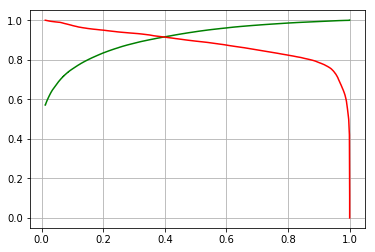

In [434]:
# Precison - recall curve
p, r, thresholds = precision_recall_curve(y_train_smote_res_pred_final.Class, y_train_smote_res_pred_final.Class_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid(b=None, which='major', axis='both')
plt.show()

#### Precision and recall meet at 0.39

In [435]:
# Lets see how the predicted va;lues turn out with 50% probability cut off
y_train_smote_res_pred_final['predicted'] = y_train_smote_res_pred_final.Class_Prob.map(lambda x: 1 if x > 0.39 else 0)

# Let's see the head
y_train_smote_res_pred_final.head()

,Class,Class_Prob,predicted
0,0,0.002992,0
1,0,0.107038,0
2,0,0.001776,0
3,0,0.089443,0
4,0,0.002077,0


#### Lets check accuracy and other metrics on this preidcted churn values

In [436]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_smote_res_pred_final.Class, y_train_smote_res_pred_final.predicted))
# find precision score and recall score
precisionScore = precision_score(y_train_smote_res_pred_final.Class, y_train_smote_res_pred_final.predicted)
print('Precision score is:',precisionScore)
recallScore = recall_score(y_train_smote_res_pred_final.Class, y_train_smote_res_pred_final.predicted)
print('Recall score is:',recallScore)

0.9147904555663302
Precision score is: 0.9132415291355689
Recall score is: 0.9166645731483668


In [437]:
# Lets find out F1 score
f1Score = 2 * (precisionScore * recallScore)/(precisionScore + recallScore)
print('F1 Score is:',f1Score)

F1 Score is: 0.9149498495486459


#### F1 score is also looking good

In [438]:
# Creating a function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC (AUC) = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ROC')
    plt.legend(loc="lower right")
    plt.grid(b=None, which='major', axis='both')
    plt.show()

    return None

In [439]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_smote_res_pred_final.Class, y_train_smote_res_pred_final.Class_Prob, drop_intermediate = False )


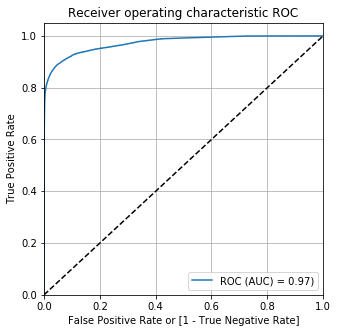

In [440]:
# Lets call the ROC plot fucnction on our model.
draw_roc(y_train_smote_res_pred_final.Class, y_train_smote_res_pred_final.Class_Prob)

#### We can see in the above plot that ROC curve is inclined towards top left corner, which means we have a balanced TPR and FPR. The AUC is 0.97 which is good

#### Lets create confusion matrix and check

[[181695  17332]
 [ 16586 182441]]


Text(0.5, -3.0, 'Predicted label')

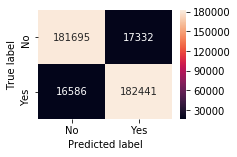

In [441]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_smote_res_pred_final.Class, y_train_smote_res_pred_final.predicted)
print(confusion)

plt.figure(figsize=(3,2))
sns.heatmap(confusion, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### If we have to reduce the False negatives, we might have to decrease the probability cut off to much lesser than 0.41; however this may cause some legitimate transactions to be treated as fraud

In [442]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [443]:
# Let's calculate some advanced metrics like sensitivity, specificity etc of our logistic regression model
print('Sensitivity or recall of the model is:',np.round(TP / float(TP+FN),2))
print('Specificity of the model is:',np.round(TN / float(TN+FP),2))
print('False Positive Rate for model is:',np.round(FP/ float(TN+FP),2))
print('Positive predictive value or precision is:',np.round(TP / float(TP+FP),2))
print('Negative predictive value is:',np.round(TN / float(TN+ FN),2))

Sensitivity or recall of the model is: 0.92
Specificity of the model is: 0.91
False Positive Rate for model is: 0.09
Positive predictive value or precision is: 0.91
Negative predictive value is: 0.92


#### We can see that all the metrics are in accpetable range, so lets proceed to predict class on test data

In [444]:
X_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [445]:
cols = X_train_smote_res.drop('const',axis=1).columns

In [446]:
X_test_lr = X_test[cols]
X_test_lr.head()

,V1,V2,V4,V8,V9,V11,V16,V22,V26,V27,Amount
212740,1.460028,-0.551731,-0.170961,-0.322273,-0.267162,-0.840221,-1.432022,-2.553519,0.169383,-0.124349,0.188325
154346,1.427861,-0.066655,0.920099,-0.169632,1.840092,-0.711605,0.726398,0.705147,-1.173159,0.073786,-1.042270
35996,-0.504708,-0.552113,-0.686805,0.103864,-1.784258,-0.765887,-2.025813,0.190547,0.300911,0.273009,1.021919
281513,1.188630,-0.484491,0.116240,0.171384,1.036833,-0.440686,-1.632478,1.130646,0.604081,-0.001603,0.708444
228150,1.516990,-0.036330,0.124953,-0.379078,0.420913,-1.033134,-0.214084,1.159653,-0.125964,-0.057633,-0.981769


In [447]:
# lets predict churn on Test data
X_test_lr = sm.add_constant(X_test_lr)
y_test_smote_res_pred = res.predict(X_test_lr).values.reshape(-1)

In [448]:
y_test_smote_res_pred[:10]

array([0.0137138 , 0.06225296, 0.01535519, 0.03010545, 0.01721731,
       0.06165439, 0.27806801, 0.19053079, 0.13736955, 0.0021047 ])

In [449]:
# Creating a data frame with original churn values and predicted churn probability values
y_test_smote_res_pred_final = pd.DataFrame({'Class':y_test, 'Class_Prob':y_test_smote_res_pred})
y_test_smote_res_pred_final.head()

,Class,Class_Prob
212740,0,0.013714
154346,0,0.062253
35996,0,0.015355
281513,0,0.030105
228150,0,0.017217


In [450]:
# We will take same 0,5 as probability cut off on test set as well as this is the probability we have choosen on train set as well
y_test_smote_res_pred_final['predicted'] = y_test_smote_res_pred_final.Class_Prob.map(lambda x: 1 if x > 0.41 else 0)

# Let's see the head
y_test_smote_res_pred_final.head()

,Class,Class_Prob,predicted
212740,0,0.013714,0
154346,0,0.062253,0
35996,0,0.015355,0
281513,0,0.030105,0
228150,0,0.017217,0


In [451]:
# Let's check the overall accuracy.
print('Accuracy:',metrics.accuracy_score(y_test_smote_res_pred_final.Class, y_test_smote_res_pred_final.predicted))
# find precision score and recall score
precisionScore = precision_score(y_test_smote_res_pred_final.Class, y_test_smote_res_pred_final.predicted)
print('Precision score is:',precisionScore)
recallScore = recall_score(y_test_smote_res_pred_final.Class, y_test_smote_res_pred_final.predicted)
print('Recall score is:',recallScore)

Accuracy: 0.9193235018726592
Precision score is: 0.020373272545946716
Recall score is: 0.89375


#### If we choose all values with more than 39% as cutoff for class prediction then the accuracy and Recall scores are good but Precision score is very poor.
#### Precision on test data has dropped drastically. Lets check why.

[[78404  6876]
 [   17   143]]


Text(0.5, -3.0, 'Predicted label')

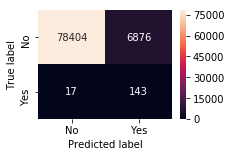

In [452]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_smote_res_pred_final.Class, y_test_smote_res_pred_final.predicted)
print(confusion)

plt.figure(figsize=(3,2))
sns.heatmap(confusion, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Precision formula is TP/(TP+FP) - Since there is class imbalance in test dataset, though 'No' in Test set has been predicted correctly 92% of the time, the count of 8% incorrectly predicted as 'Yes' (6876) far outnumber the number of True positives (143). This is the reason precision is low.

In [455]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [456]:
# Let's calculate some advanced metrics like sensitivity, specificity etc of our logistic regression model
print('Sensitivity or recall of the model is:',np.round(TP / float(TP+FN),2))
print('Specificity of the model is:',np.round(TN / float(TN+FP),2))
print('False Positive Rate for model is:',np.round(FP/ float(TN+FP),2))
print('Positive predictive value or precision is:',np.round(TP / float(TP+FP),2))
print('Negative predictive value is:',np.round(TN / float(TN+ FN),2))

Sensitivity or recall of the model is: 0.89
Specificity of the model is: 0.92
False Positive Rate for model is: 0.08
Positive predictive value or precision is: 0.02
Negative predictive value is: 1.0


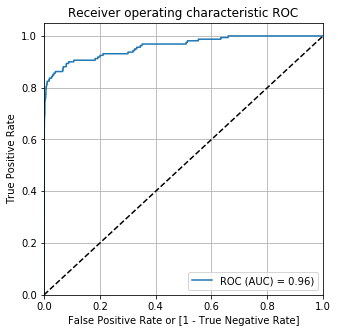

In [457]:
# Lets call the ROC plot fucnction on our model.
draw_roc(y_test_smote_res_pred_final.Class, y_test_smote_res_pred_final.Class_Prob)

### <font color='brown'>Lets create a data frame to store model name, model metrics, we can keep appending this after every new model built and check this in the end to see which model is giving better results

In [90]:
# Creating a data frame to store metrics of all the models for easy comparision later 
dfAllModelMetrics = pd.DataFrame(columns=['ModelName','Hyperparams',
                                          'TestTN','TestFP','TestFN','TestTP',
                                          'TrainAccuracy','TrainPrecision','TrainRecall',
                                          'TestAccuracy','TestPrecision','TestRecall'])

In [459]:
# Storing all metics in the model metrics data frame
trainAccuracy = metrics.accuracy_score(y_train_smote_res_pred_final.Class, y_train_smote_res_pred_final.predicted)
trainPrecision = precision_score(y_train_smote_res_pred_final.Class, y_train_smote_res_pred_final.predicted)
trainRecall = recall_score(y_train_smote_res_pred_final.Class, y_train_smote_res_pred_final.predicted)
testAccuracy = metrics.accuracy_score(y_test_smote_res_pred_final.Class, y_test_smote_res_pred_final.predicted)
testPrecision = precision_score(y_test_smote_res_pred_final.Class, y_test_smote_res_pred_final.predicted)
testRecall = recall_score(y_test_smote_res_pred_final.Class, y_test_smote_res_pred_final.predicted)

#Adding metrics into the dataframe
dfAllModelMetrics.loc[dfAllModelMetrics.shape[0]] = ['LogisticRegression_SMOTE', '', 
                TN, FP, FN, TP,
                trainAccuracy,trainPrecision,trainRecall,
                testAccuracy,testPrecision,testRecall]

In [460]:
# Visualizing the metrics dataframe
dfAllModelMetrics

,ModelName,Hyperparams,TestTN,TestFP,TestFN,TestTP,TrainAccuracy,TrainPrecision,TrainRecall,TestAccuracy,TestPrecision,TestRecall
0,LogisticRegression_SMOTE,,78404,6876,17,143,0.91479,0.913242,0.916665,0.919324,0.020373,0.89375


# <font color='red'>Random Forest Default model with SMOTE (No Tuning)</font>

In [461]:
X_train_smote_res_rf = X_train_smote_res_bkup.copy()
X_test_smote_res_rf = X_test.copy()
y_train_smote_res_rf = y_train_smote_res_bkup.copy()
y_test_smote_res_rf = y_test.copy()

In [462]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(X_train_smote_res_rf,y_train_smote_res_rf)

# Making predictions
y_train_pred = rfc.predict(X_train_smote_res_rf)
y_test_pred = rfc.predict(X_test_smote_res_rf)

In [463]:
# Printing classification report
print(classification_report(y_train_smote_res_rf, y_train_pred))
print(metrics.accuracy_score(y_train_smote_res_rf, y_train_pred))
# find precision score and recall score
precisionScore = precision_score(y_train_smote_res_rf, y_train_pred)
print('Precision score is:',precisionScore)
recallScore = recall_score(y_train_smote_res_rf, y_train_pred)
print('Recall score is:',recallScore)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199027
           1       1.00      1.00      1.00    199027

    accuracy                           1.00    398054
   macro avg       1.00      1.00      1.00    398054
weighted avg       1.00      1.00      1.00    398054

1.0
Precision score is: 1.0
Recall score is: 1.0


In [464]:
# Printing classification report
print(classification_report(y_test_smote_res_rf, y_test_pred))
print(metrics.accuracy_score(y_test_smote_res_rf, y_test_pred))
# find precision score and recall score
precisionScore = precision_score(y_test_smote_res_rf, y_test_pred)
print('Precision score is:',precisionScore)
recallScore = recall_score(y_test_smote_res_rf, y_test_pred)
print('Recall score is:',recallScore)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.83      0.79      0.81       160

    accuracy                           1.00     85440
   macro avg       0.91      0.89      0.90     85440
weighted avg       1.00      1.00      1.00     85440

0.9992977528089888
Precision score is: 0.8289473684210527
Recall score is: 0.7875


[[85254    26]
 [   34   126]]


Text(0.5, -3.0, 'Predicted label')

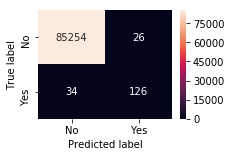

In [465]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_smote_res_rf, y_test_pred)
print(confusion)

plt.figure(figsize=(3,2))
sns.heatmap(confusion, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### We see a decent precision and recall score. Lets add this metrics to the dataframe

In [466]:
trainAccuracy = metrics.accuracy_score(y_train_smote_res_rf, y_train_pred)
trainPrecision = precision_score(y_train_smote_res_rf, y_train_pred)
trainRecall = recall_score(y_train_smote_res_rf, y_train_pred)
testAccuracy = metrics.accuracy_score(y_test_smote_res_rf, y_test_pred)
testPrecision = precision_score(y_test_smote_res_rf, y_test_pred)
testRecall = recall_score(y_test_smote_res_rf, y_test_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

dfAllModelMetrics.loc[dfAllModelMetrics.shape[0]] = ['RandomForest_SMOTE_Default', '', 
                TN, FP, FN, TP,
                trainAccuracy,trainPrecision,trainRecall,
                testAccuracy,testPrecision,testRecall]

In [467]:
dfAllModelMetrics.head()

,ModelName,Hyperparams,TestTN,TestFP,TestFN,TestTP,TrainAccuracy,TrainPrecision,TrainRecall,TestAccuracy,TestPrecision,TestRecall
0,LogisticRegression_SMOTE,,78404,6876,17,143,0.91479,0.913242,0.916665,0.919324,0.020373,0.89375
1,RandomForest_SMOTE_Default,,85254,26,34,126,1.00000,1.000000,1.000000,0.999298,0.828947,0.78750


### Sampling the TRAIN data with SMOTE

Till now we worked on the imbalanced dataset and build models on top of that. After the split, we know we had only 332 of class 1 samples in our train dataset and just 160 samples in our test dataset. We could get a better recall with ensemble models such as XGBoost and Random Forest on the imbalanced dataset while the linear model such as Logistic Regression was little bit underperforming. Hence now we can go ahead with balancing the dataset with approaches such as SMOTE and build models on top of that.

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
#Initialising the ADASYN object
smotesampl = SMOTE(sampling_strategy='minority',random_state=101)

In [0]:
#fit_resample on the train sets to produce the new resampled sets.
X_train_smote,y_train_smote = smotesampl.fit_resample(X_train,y_train)

In [73]:
X_train_smote.shape

(398054, 29)

In [74]:
y_train_smote.shape

(398054,)

We can see that currently we are having 398054 records with us after performing the SMOTE. Since the output of SMOTE is an nd array we can convert it back to dataframes. Further we can check what is the distribution of classes right now.

In [0]:
X_train_smote = pd.DataFrame(X_train_smote,columns=X_train.columns)

In [0]:
y_train_smote = pd.DataFrame(y_train_smote,columns=['Fraud'])

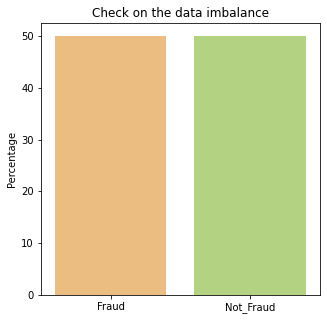

In [78]:
#Data Inbalance check for the Converted column.
yes=y_train_smote[y_train_smote['Fraud']==1]['Fraud'].value_counts()
no=y_train_smote[y_train_smote['Fraud']==0]['Fraud'].value_counts()

converted=np.array((yes/len(y_train_smote))*100) 
not_converted=np.array((no/len(y_train_smote))*100) 
stat_summ=pd.DataFrame({'Percentage':[converted[0],not_converted[0]]},index=['Fraud','Not_Fraud'])
plt.figure(figsize=(5,5))
sns.barplot(x=stat_summ.index,y=stat_summ['Percentage'],palette='RdYlGn')
plt.title('Check on the data imbalance')
plt.show()

We can see that the class imbalance problem has been addressed now with same percentage of total records present now for both the classes.

### Shuffling and sampling the train set to produce a new train set from the SMOTE datapoints.

In [79]:
X_train_smote.shape

(398054, 29)

In [80]:
y_train_smote.shape

(398054, 1)

In [0]:
X_train_smote_new = X_train_smote.copy()

In [0]:
X_train_smote_new['Fraud'] = y_train_smote['Fraud']

In [0]:
X_train_smote_fraud = X_train_smote_new.loc[X_train_smote_new['Fraud']==1]

In [0]:
X_train_smote_non_fraud = X_train_smote_new.loc[X_train_smote_new['Fraud']==0]

In [85]:
X_train_smote_fraud.shape

(199027, 30)

In [86]:
X_train_smote_non_fraud.shape

(199027, 30)

In [0]:
X_train_smote_fraud = X_train_smote_fraud.sample(frac=1)

In [0]:
X_train_smote_non_fraud = X_train_smote_non_fraud.sample(frac=1)

In [0]:
X_train_smote_fraud = X_train_smote_fraud[:50000]
X_train_smote_non_fraud = X_train_smote_non_fraud[:50000]

In [0]:
frames = [X_train_smote_fraud,X_train_smote_non_fraud]
X_train_smote_final = pd.concat(frames)

In [0]:
X_train_smote_final = X_train_smote_final.sample(frac=1)

In [92]:
X_train_smote_final

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
122538,-0.892051,-0.429002,2.975752,-0.768907,-0.983729,0.216082,-0.110551,-0.252316,0.664471,0.499365,-1.127307,0.223983,0.372735,-1.977280,-2.192114,-2.193175,0.502856,0.637946,-0.846862,-0.136033,-0.935798,-0.678756,-0.329356,1.405406,0.352605,1.758789,-0.228990,-0.400204,0.754181,0
301517,-2.242415,6.139286,-5.163752,4.108302,-7.049436,-3.042320,-8.865245,6.493744,-3.745758,-16.339693,6.961137,-6.872463,0.108182,-9.660530,0.838011,-9.139430,-16.930101,-7.237519,4.712734,0.130453,3.230479,1.397835,0.865968,0.748762,-0.562267,0.554468,0.168795,0.846728,1.708108,1
219328,0.663726,0.810655,-2.530509,1.139141,0.104046,-1.378095,-1.238085,0.120753,-0.586441,-3.879939,3.118421,-2.723438,-0.096159,-4.175580,-0.756610,-2.297774,-3.432921,-0.652561,0.715276,0.428621,0.546801,-0.031233,-0.277808,-0.337917,0.925245,0.571722,1.127402,0.678473,-0.235854,1
230165,-3.897328,6.878463,-5.967576,4.740721,-9.511586,-2.787428,-10.876711,14.238313,-8.992278,-16.899646,4.705160,-5.557719,1.590931,-7.827780,0.168292,-7.643244,-18.195901,-8.539190,2.514181,-1.804935,3.660229,0.153333,-0.767311,1.028325,1.188662,0.385279,-3.619481,-3.057315,0.748905,1
64765,0.602208,-0.049834,-0.084360,0.729718,-0.202813,-0.305307,-0.010091,-0.031722,0.113659,0.259325,0.664864,-0.544181,-2.189242,1.113478,0.491055,0.465500,-0.819096,0.853722,0.068767,-0.261839,0.094399,-0.035302,-0.265629,-0.166882,1.218542,-0.639257,-0.051575,0.036578,0.028988,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387075,-0.759910,1.009636,-0.928805,1.244988,-0.554276,0.611192,-2.639098,-1.196712,0.359900,-4.074891,2.322416,-2.874069,0.552093,-3.590334,-2.304136,-2.410659,-4.352208,-0.601632,0.507376,0.637716,0.152510,1.029213,-0.444448,-0.246841,0.721647,0.137502,1.199539,0.502855,-0.312865,1
3376,-0.713160,0.152943,1.907360,-1.524643,-0.627889,0.139218,-0.517034,0.234852,-0.807896,-0.075012,-1.209673,-0.833217,1.348874,-1.009000,0.743523,2.865545,-0.694925,-0.473507,-0.080498,0.161354,0.631665,1.693436,-0.810466,-0.705126,0.874154,-0.160737,-0.885911,-0.691292,-1.006696,0
119077,-1.444709,-2.209371,2.147392,-0.651868,2.023206,-1.298714,-2.097565,0.300978,1.600747,-0.434959,-1.325538,-2.228273,1.308509,0.272645,-2.384717,-1.225411,0.245332,2.016816,-2.367833,0.484011,-0.434141,-1.295670,1.001694,0.576188,-0.271312,0.640460,-0.600504,-0.075229,0.212430,0
292492,-3.479303,7.040778,-6.472975,4.024264,-7.388200,-4.169046,-12.072584,2.375970,-4.881680,-20.424550,6.075443,-6.471700,-0.313822,-8.732372,-1.543572,-8.394659,-15.272076,-6.992377,2.585965,0.553858,0.344671,2.047356,-0.621926,0.697182,-1.704783,-1.112049,-2.219770,-0.138614,0.371805,1


In [0]:
X_train_smote_sampled = X_train_smote_final.drop(['Fraud'],axis=1)
y_train_smote_sampled = X_train_smote_final['Fraud']

# <font color='red'>Random Forest on SMOTE Dataset</font>

In [0]:
from sklearn.ensemble import RandomForestClassifier

##### Hyper parameter tuning for Random Forest

#### MAX DEPTH

In [0]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'max_depth': range(2, 12, 3)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="recall",return_train_score=True)
rf.fit(X_train_smote_sampled,y_train_smote_sampled)
end = time.time()

In [0]:
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 4.49


In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.874665,0.015620,0.160395,0.002361,2,{'max_depth': 2},0.839983,0.849583,0.847534,0.84570,0.004128,4,0.840098,0.843608,0.853543,0.84575,0.005694
1,15.232105,0.028971,0.197915,0.000952,5,{'max_depth': 5},0.889122,0.891282,0.889716,0.89004,0.000911,3,0.889869,0.887889,0.894942,0.89090,0.002970
2,22.531360,0.036645,0.243163,0.002699,8,{'max_depth': 8},0.957581,0.957941,0.954098,0.95654,0.001733,2,0.960400,0.957760,0.958421,0.95886,0.001122
3,27.668500,0.284968,0.285230,0.001213,11,{'max_depth': 11},0.981880,0.981220,0.980799,0.98130,0.000445,1,0.984070,0.982810,0.983590,0.98349,0.000519


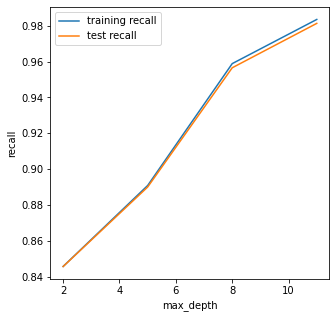

In [0]:
# plotting accuracies with max_depth
plt.figure(figsize=(5,5))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

Both train and test scores are in similar range throught out the range of values for max_depth. Hence we will select max_depth around 8,so that it wont overfit much on the train set.

#### N ESTIMATORS

In [0]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'n_estimators': range(200, 900, 200)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=8)
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,scoring="recall",return_train_score=True)
rf.fit(X_train_smote_sampled,y_train_smote_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 27.28


In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,44.449871,0.563430,0.463916,0.007599,200,{'n_estimators': 200},0.955601,0.958901,0.954818,0.95644,0.001769,4,0.95908,0.95890,0.959351,0.95911,0.000185
1,87.690893,0.553187,0.902589,0.010334,400,{'n_estimators': 400},0.956021,0.959621,0.953858,0.95650,0.002377,2,0.95947,0.96016,0.957941,0.95919,0.000927
2,131.807367,0.427412,1.339655,0.010046,600,{'n_estimators': 600},0.956141,0.958301,0.954938,0.95646,0.001391,3,0.95935,0.95869,0.959531,0.95919,0.000361
3,175.634257,0.555030,1.786317,0.012704,800,{'n_estimators': 800},0.956621,0.959261,0.956378,0.95742,0.001305,1,0.95977,0.95995,0.960191,0.95997,0.000173


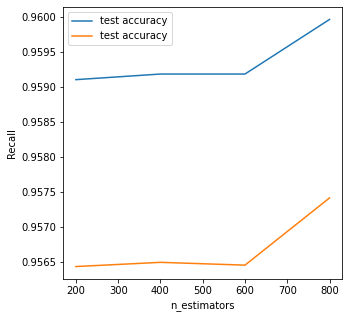

In [0]:
# plotting accuracies with n_estimators
plt.figure(figsize=(5,5))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="test accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

We could see the recall is almost in similar range through out the range of n_estimator values from 200 to 600 and there is only a slight increase after. Hence n_estimator to be taken around 200.

#### MAX_FEATURES

In [0]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
# instantiate the model
rf = RandomForestClassifier(max_depth=8,
                            n_estimators=200)
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="recall",return_train_score=True)
rf.fit(X_train_smote_sampled,y_train_smote_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 36.97


In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,35.085481,0.364215,0.467342,0.012623,4,{'max_features': 4},0.953081,0.956141,0.951398,0.95354,0.001963,5,0.95587,0.95626,0.956051,0.95606,0.000159
1,71.468692,2.194024,0.474375,0.005212,8,{'max_features': 8},0.965201,0.964781,0.962919,0.96430,0.000992,4,0.96745,0.96637,0.965651,0.96649,0.000739
2,123.328281,0.731015,0.457726,0.005277,14,{'max_features': 14},0.970961,0.971321,0.972459,0.97158,0.000639,3,0.97318,0.97357,0.974921,0.97389,0.000746
3,178.197696,0.280902,0.475269,0.001254,20,{'max_features': 20},0.973121,0.974561,0.975579,0.97442,0.001009,2,0.97615,0.97654,0.977800,0.97683,0.000704
4,213.201465,0.167199,0.463844,0.003139,24,{'max_features': 24},0.972521,0.977800,0.975639,0.97532,0.002167,1,0.97597,0.98047,0.978130,0.97819,0.001838


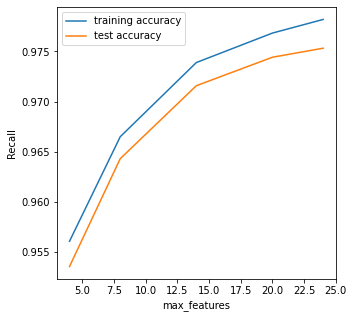

In [0]:
# plotting accuracies with max_features
plt.figure(figsize=(5,5))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

We will select max_features of 14

#### MIN_SAMPLES_LEAF

In [0]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'min_samples_leaf': range(50,300,50)}
# instantiate the model
rf = RandomForestClassifier(max_depth=8,
                            n_estimators=200,
                            max_features=14)
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="recall",return_train_score=True)
rf.fit(X_train_smote_sampled,y_train_smote_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 32.06


In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,121.996424,0.903477,0.468865,0.007628,50,{'min_samples_leaf': 50},0.964661,0.964781,0.965919,0.96512,0.000567,1,0.967600,0.966610,0.968831,0.96768,0.000908
1,119.074299,1.058599,0.474506,0.010665,100,{'min_samples_leaf': 100},0.957701,0.959861,0.960218,0.95926,0.001112,2,0.961270,0.960700,0.963071,0.96168,0.001011
2,115.501318,1.245102,0.463840,0.003151,150,{'min_samples_leaf': 150},0.954521,0.953981,0.953678,0.95406,0.000349,3,0.957250,0.953860,0.956201,0.95577,0.001417
3,109.143858,0.988885,0.443963,0.003990,200,{'min_samples_leaf': 200},0.948221,0.945641,0.946718,0.94686,0.001058,4,0.951100,0.945309,0.949031,0.94848,0.002396
4,105.910602,1.110128,0.448004,0.004284,250,{'min_samples_leaf': 250},0.943241,0.942521,0.939098,0.94162,0.001808,5,0.946389,0.941649,0.942011,0.94335,0.002154


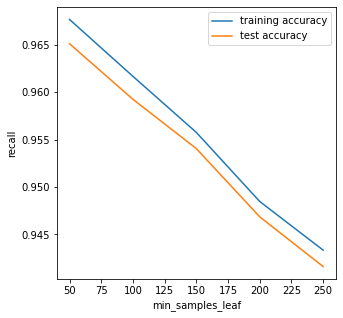

In [0]:
# plotting accuracies with min_samples_leaf
plt.figure(figsize=(5,5))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.legend()
plt.show()

We will go forward with 150 samples per leaf.

#### MIN_SAMPLES_SPLIT

In [95]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'min_samples_split': range(100, 300, 50)}
# instantiate the model
rf = RandomForestClassifier(max_depth=8,
                            n_estimators=200,
                            max_features=14,
                            min_samples_leaf=150)
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="recall",return_train_score=True)
rf.fit(X_train_smote_sampled,y_train_smote_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 27.03


In [96]:
 # scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,117.622713,1.631619,0.512518,0.003665,100,{'min_samples_split': 100},0.952961,0.951338,0.952601,0.95230,0.000696,4,0.95272,0.954341,0.95653,0.95453,0.001561
1,117.583998,1.072766,0.515500,0.003153,150,{'min_samples_split': 150},0.954581,0.950258,0.952361,0.95240,0.001765,3,0.95422,0.952991,0.95575,0.95432,0.001128
2,118.846805,1.457444,0.520652,0.005885,200,{'min_samples_split': 200},0.954701,0.952118,0.952421,0.95308,0.001153,1,0.95422,0.955391,0.95641,0.95534,0.000895
3,118.242238,1.592288,0.513556,0.004704,250,{'min_samples_split': 250},0.952961,0.951458,0.953021,0.95248,0.000723,2,0.95266,0.954281,0.95707,0.95467,0.001821


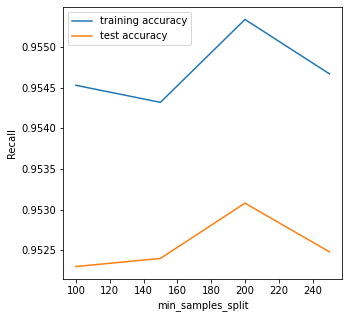

In [97]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(5,5))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

We can combine all the hyper parameter values which we got in the previous steps and build our random forest model with that and observe the metrics which the model is offering on train and test.

In [99]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=8,
                            max_features=14,
                            min_samples_leaf=150,
                            min_samples_split=200)
rf.fit(X_train_smote_sampled,y_train_smote_sampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_train_pred_rf_smote = rf.predict(X_train_smote_sampled)

In [101]:
accuracy_score(y_train_smote_sampled,y_train_pred_rf_smote)

0.97702

In [102]:
# Printing classification report
print(classification_report(y_train_smote_sampled, y_train_pred_rf_smote))
print(metrics.accuracy_score(y_train_smote_sampled, y_train_pred_rf_smote))
# find precision score and recall score
precisionScore = precision_score(y_train_smote_sampled, y_train_pred_rf_smote)
print('Precision score is:',precisionScore)
recallScore = recall_score(y_train_smote_sampled, y_train_pred_rf_smote)
print('Recall score is:',recallScore)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     50000
           1       0.99      0.96      0.98     50000

    accuracy                           0.98    100000
   macro avg       0.98      0.98      0.98    100000
weighted avg       0.98      0.98      0.98    100000

0.97702
Precision score is: 0.9933804972901411
Recall score is: 0.96044


[[49680   320]
 [ 1978 48022]]


Text(0.5, -3.0, 'Predicted label')

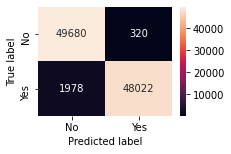

In [104]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_smote_sampled,y_train_pred_rf_smote)
print(confusion)

plt.figure(figsize=(3,2))
sns.heatmap(confusion, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [0]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [0]:
confusion

array([[48365,  1635],
       [ 3537, 46463]], dtype=int64)

<font color = 'purple'> <b> `RANDOM FOREST ON BALANCED DATASET WITH XGB -TRAIN` </b> <br>
`Specificity`          -> 97% <br>
`Precision`            -> 99%
    

Random Forest model seems to be a pretty good model on our sampled train set. Lets evaluate now on test set.

In [106]:
X_test.shape

(85440, 29)

In [107]:
y_test.shape

(85440,)

In [0]:
y_test_pred_rf_smote = rf.predict(X_test)

In [109]:
# Printing classification report
print(classification_report(y_test, y_test_pred_rf_smote))
print(metrics.accuracy_score(y_test, y_test_pred_rf_smote))
# find precision score and recall score
precisionScore = precision_score(y_test, y_test_pred_rf_smote)
print('Precision score is:',precisionScore)
recallScore = recall_score(y_test, y_test_pred_rf_smote)
print('Recall score is:',recallScore)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85280
           1       0.18      0.89      0.29       160

    accuracy                           0.99     85440
   macro avg       0.59      0.94      0.65     85440
weighted avg       1.00      0.99      0.99     85440

0.9920294943820225
Precision score is: 0.1763975155279503
Recall score is: 0.8875


[[84617   663]
 [   18   142]]


Text(0.5, -3.0, 'Predicted label')

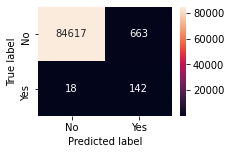

In [112]:
# Confusion matrix 
confusion_rf_smote = metrics.confusion_matrix(y_test, y_test_pred_rf_smote)
print(confusion_rf_smote)

plt.figure(figsize=(3,2))
sns.heatmap(confusion_rf_smote, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [0]:
TP = confusion_rf_smote[1,1] # true positive 
TN = confusion_rf_smote[0,0] # true negatives
FP = confusion_rf_smote[0,1] # false positives
FN = confusion_rf_smote[1,0] # false negatives

In [114]:
#Sensitivity / Recall
TP / float(TP + FN)

0.8875

In [115]:
#Specificity
TN / float(TN + FP)

0.9922256097560975

In [116]:
#Precision
TP / float(TP+FP)

0.1763975155279503

<font color = 'purple'> <b> `RANDOM FOREST ON BALANCED DATASET WITH ADASYN -TEST` </b> <br>
`Recall`/`Sensitivity` -> 89% <br>
`Specificity`          -> 99% <br>
`Precision`            -> 17% <br> 
<font color = 'black'> We can see that we are getting a similar recall specificity values with the randome forest model on test set similar to the train set. But there is a serious trade off between precision and recall, hence compromising on the precision to a greater extend.   

In [118]:
# Storing all metics in the model metrics data frame
trainAccuracy = metrics.accuracy_score(y_train_smote_sampled, y_train_pred_rf_smote)
trainPrecision = precision_score(y_train_smote_sampled, y_train_pred_rf_smote)
trainRecall = recall_score(y_train_smote_sampled, y_train_pred_rf_smote)
testAccuracy = metrics.accuracy_score(y_test, y_test_pred_rf_smote)
testPrecision = precision_score(y_test, y_test_pred_rf_smote)
testRecall = recall_score(y_test, y_test_pred_rf_smote)

params = 'n_estimators=200,max_depth=8,max_features=14,min_samples_leaf=150,min_samples_split=200'
#Adding metrics into the dataframe
dfAllModelMetrics.loc[dfAllModelMetrics.shape[0]] = ['Random_Forest_SMOTE_Tuned', params, 
                TN, FP, FN, TP,
                trainAccuracy,trainPrecision,trainRecall,
                testAccuracy,testPrecision,testRecall]

dfAllModelMetrics.head()

,ModelName,Hyperparams,TestTN,TestFP,TestFN,TestTP,TrainAccuracy,TrainPrecision,TrainRecall,TestAccuracy,TestPrecision,TestRecall
0,Random_Forest_SMOTE_Tuned,"n_estimators=200,max_depth=8,max_features=14,m...",84617,663,18,142,0.97702,0.99338,0.96044,0.992029,0.176398,0.8875


In [87]:
X_train_smote_sampled.shape

(100000, 29)

In [88]:
y_train_smote_sampled.shape

(100000,)

# <font color='red'>XGBOOST on SMOTE Dataset</font>

In [0]:
#Importing the libraries for XGBoost.
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
import time

In [0]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 4)}
# instantiate the model
xgb_model = XGBClassifier()
# fit tree on training data
xgb_model1 = GridSearchCV(xgb_model, parameters, cv=n_folds, scoring="recall",return_train_score=True)
xgb_model1.fit(X_train_smote_sampled,y_train_smote_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 10.52


In [0]:
cv_results = pd.DataFrame(xgb_model1.cv_results_)

In [0]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.487047,0.434455,0.089985,0.001738,2,{'max_depth': 2},0.941621,0.940781,0.936997,0.93980,0.002011,5,0.940449,0.939969,0.941651,0.94069,0.000707
1,27.741937,0.130521,0.198044,0.001542,6,{'max_depth': 6},0.998920,0.999040,0.997480,0.99848,0.000709,4,0.999670,0.999580,0.999280,0.99951,0.000167
2,40.897605,0.757106,0.268853,0.012702,10,{'max_depth': 10},0.999760,0.999700,0.999640,0.99970,0.000049,3,1.000000,1.000000,1.000000,1.00000,0.000000
3,47.926944,0.181990,0.300208,0.003754,14,{'max_depth': 14},0.999880,0.999760,0.999820,0.99982,0.000049,1,1.000000,1.000000,1.000000,1.00000,0.000000
4,53.539271,0.435136,0.314843,0.003056,18,{'max_depth': 18},0.999820,0.999760,0.999700,0.99976,0.000049,2,1.000000,1.000000,1.000000,1.00000,0.000000


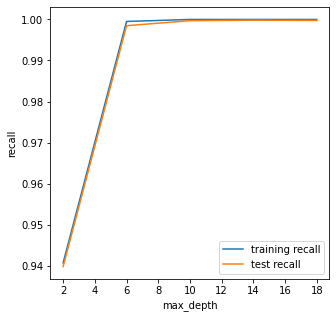

In [0]:
# plotting accuracies with max_depth
plt.figure(figsize=(5,5))
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training recall")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

Max depth around 6 would be a good measure where the train and test recall metrics are close enough.

In [91]:
start = time.time()
# specify number of folds for k-fold CV
n_folds = 3
# parameters to build the model on
parameters = {'n_estimators': range(100, 900, 200)}
# instantiate the model (note we are specifying a max_depth)
xgb_model = XGBClassifier(max_depth=6)
# fit tree on training data
xgb_model1 = GridSearchCV(xgb_model, parameters, cv=n_folds, scoring="recall",return_train_score=True)
xgb_model1.fit(X_train_smote_sampled,y_train_smote_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Amount of time taken for the above query in minutes: 26.32


In [0]:
cv_results = pd.DataFrame(xgb_model1.cv_results_)

In [93]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,33.853890,0.045042,0.216597,0.003401,100,{'n_estimators': 100},0.99814,0.99832,0.99838,0.99828,0.000102,4,0.99955,0.99961,0.99949,0.99955,0.000049
1,91.259461,0.526891,0.789230,0.010597,300,{'n_estimators': 300},1.00000,1.00000,0.99994,0.99998,0.000028,3,1.00000,1.00000,1.00000,1.00000,0.000000
2,139.139394,1.523661,1.261074,0.003871,500,{'n_estimators': 500},1.00000,1.00000,1.00000,1.00000,0.000000,1,1.00000,1.00000,1.00000,1.00000,0.000000
3,178.836736,1.536140,1.646546,0.027950,700,{'n_estimators': 700},1.00000,1.00000,1.00000,1.00000,0.000000,1,1.00000,1.00000,1.00000,1.00000,0.000000


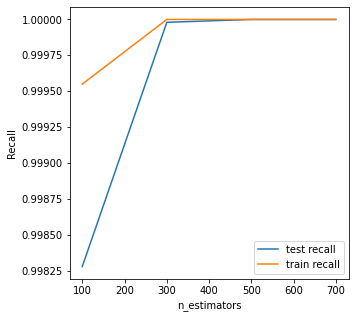

In [94]:
# plotting accuracies with n_estimators
plt.figure(figsize=(5,5))
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_test_score"], 
         label="test recall")
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_train_score"], 
         label="train recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

300 estimators seems to be a good parameter so that the recall is in similar range on train and test. Further with the increase in the n-estimators we can clearly see some overfitting on the train set.

In [95]:
start = time.time()
# hyperparameter tuning with XGBoost
# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=6,
                          n_estimators=300)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds,  
                        verbose = 1,
                        return_train_score=True)  
model_cv.fit(X_train_smote_sampled,y_train_smote_sampled)
end = time.time()
print("Amount of time taken for the above query in minutes:",round((end-start)/60 ,2))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 35.2min finished


In [99]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,49.823421,0.387134,0.738485,0.015838,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
1,71.470282,0.247488,0.782024,0.006891,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
2,82.370831,0.668658,0.792936,0.020932,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
3,43.352933,0.203268,0.628846,0.006805,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
4,61.935908,0.336633,0.694151,0.002746,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
5,70.131397,0.513125,0.730112,0.011721,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
6,40.959816,0.959610,0.567215,0.006414,0.3,0.3,"{'learning_rate': 0.3, 'subsample': 0.3}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
7,55.867520,0.244139,0.582522,0.005775,0.3,0.6,"{'learning_rate': 0.3, 'subsample': 0.6}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
8,63.826673,0.949510,0.612921,0.012487,0.3,0.9,"{'learning_rate': 0.3, 'subsample': 0.9}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
9,36.165634,0.153885,0.488958,0.006991,0.4,0.3,"{'learning_rate': 0.4, 'subsample': 0.3}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0


In [97]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,49.823421,0.387134,0.738485,0.015838,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
1,71.470282,0.247488,0.782024,0.006891,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
2,82.370831,0.668658,0.792936,0.020932,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
3,43.352933,0.203268,0.628846,0.006805,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
4,61.935908,0.336633,0.694151,0.002746,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0


In [101]:
cv_results['mean_test_score'].value_counts()

1.0    12
Name: mean_test_score, dtype: int64

In [102]:
cv_results['mean_train_score'].value_counts()

1.0    12
Name: mean_train_score, dtype: int64

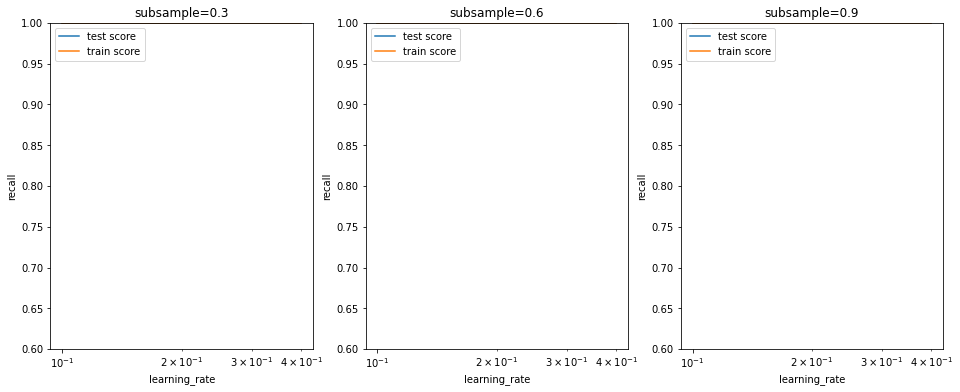

In [100]:
#plotting
plt.figure(figsize=(16,6))
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4], 
             'subsample': [0.3, 0.6, 0.9]} 
for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('recall')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Learning rate around 0.1 and subsample around 0.3 seems to be a good value.

In [103]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate':0.1,
          'max_depth':6, 
          'n_estimators':300,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_smote_sampled,y_train_smote_sampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [104]:
# predict
y_pred = model.predict_proba(X_train_smote_sampled)
y_pred[:10]

array([[0.9861898 , 0.01381024],
       [0.94139886, 0.05860116],
       [0.96654963, 0.03345038],
       [0.00343335, 0.99656665],
       [0.00146806, 0.99853194],
       [0.02485943, 0.9751406 ],
       [0.22259694, 0.77740306],
       [0.2723832 , 0.7276168 ],
       [0.9964254 , 0.00357459],
       [0.901544  , 0.09845601]], dtype=float32)

In [0]:
import sklearn

In [106]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_train_smote_sampled, y_pred[:, 1])
auc

0.9988767516

In [0]:
xgb_df = pd.DataFrame(y_pred[:, 1],columns=["Predicted_probability"])

In [0]:
xgb_df['Churn'] = y_train_smote_sampled.values

In [109]:
xgb_df

,Predicted_probability,Churn
0,0.013810,0
1,0.058601,0
2,0.033450,0
3,0.996567,1
4,0.998532,1
...,...,...
99995,0.998453,1
99996,0.002634,0
99997,0.997525,1
99998,0.005093,0


In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    xgb_df[i]= xgb_df.Predicted_probability.map(lambda x: 1 if x > i else 0)
xgb_df.head()

,Predicted_probability,Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.013810,0,1,0,0,0,0,0,0,0,0,0
1,0.058601,0,1,0,0,0,0,0,0,0,0,0
2,0.033450,0,1,0,0,0,0,0,0,0,0,0
3,0.996567,1,1,1,1,1,1,1,1,1,1,1
4,0.998532,1,1,1,1,1,1,1,1,1,1,1


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(xgb_df.Churn, xgb_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0   0.50000      1.00000      0.00000
0.1          0.1   0.93423      0.99996      0.86850
0.2          0.2   0.97161      0.99736      0.94586
0.3          0.3   0.98063      0.99018      0.97108
0.4          0.4   0.98255      0.98124      0.98386
0.5          0.5   0.97866      0.96758      0.98974
0.6          0.6   0.97409      0.95410      0.99408
0.7          0.7   0.96610      0.93512      0.99708
0.8          0.8   0.95137      0.90394      0.99880
0.9          0.9   0.93409      0.86872      0.99946


<Figure size 360x360 with 0 Axes>

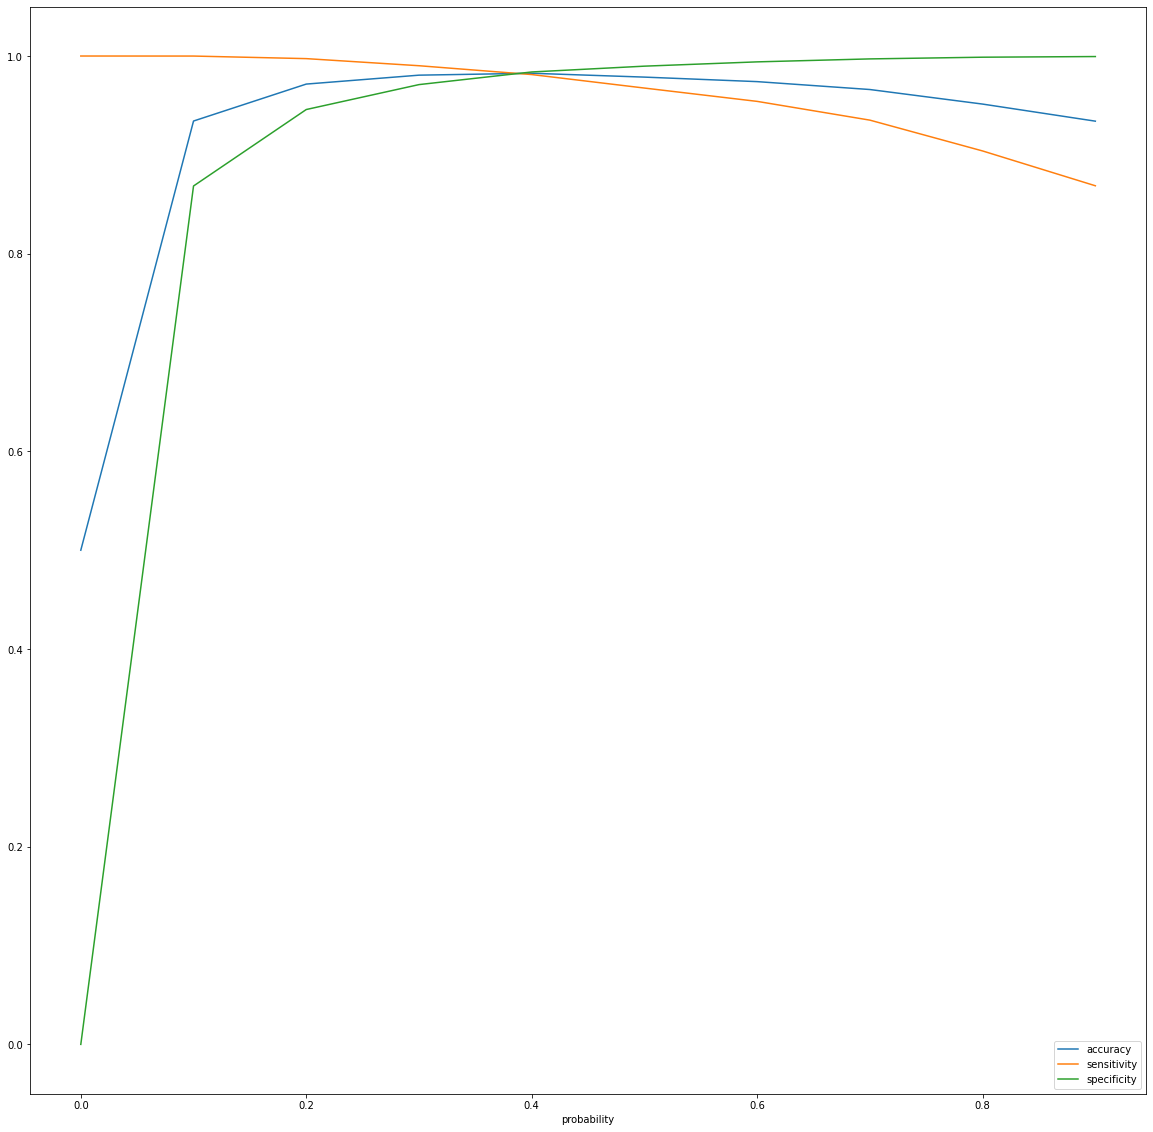

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(5,5))
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df1 = pd.DataFrame( columns = ['probability','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(xgb_df.Churn, xgb_df[i] )
    total1=sum(sum(cm1))
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    rec = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,prec, rec]
print(cutoff_df1)

     probability  precision   recall
0.0          0.0   0.500000  1.00000
0.1          0.1   0.883778  0.99996
0.2          0.2   0.948512  0.99736
0.3          0.3   0.971622  0.99018
0.4          0.4   0.983818  0.98124
0.5          0.5   0.989507  0.96758
0.6          0.6   0.993833  0.95410
0.7          0.7   0.996887  0.93512
0.8          0.8   0.998674  0.90394
0.9          0.9   0.999379  0.86872


<Figure size 360x360 with 0 Axes>

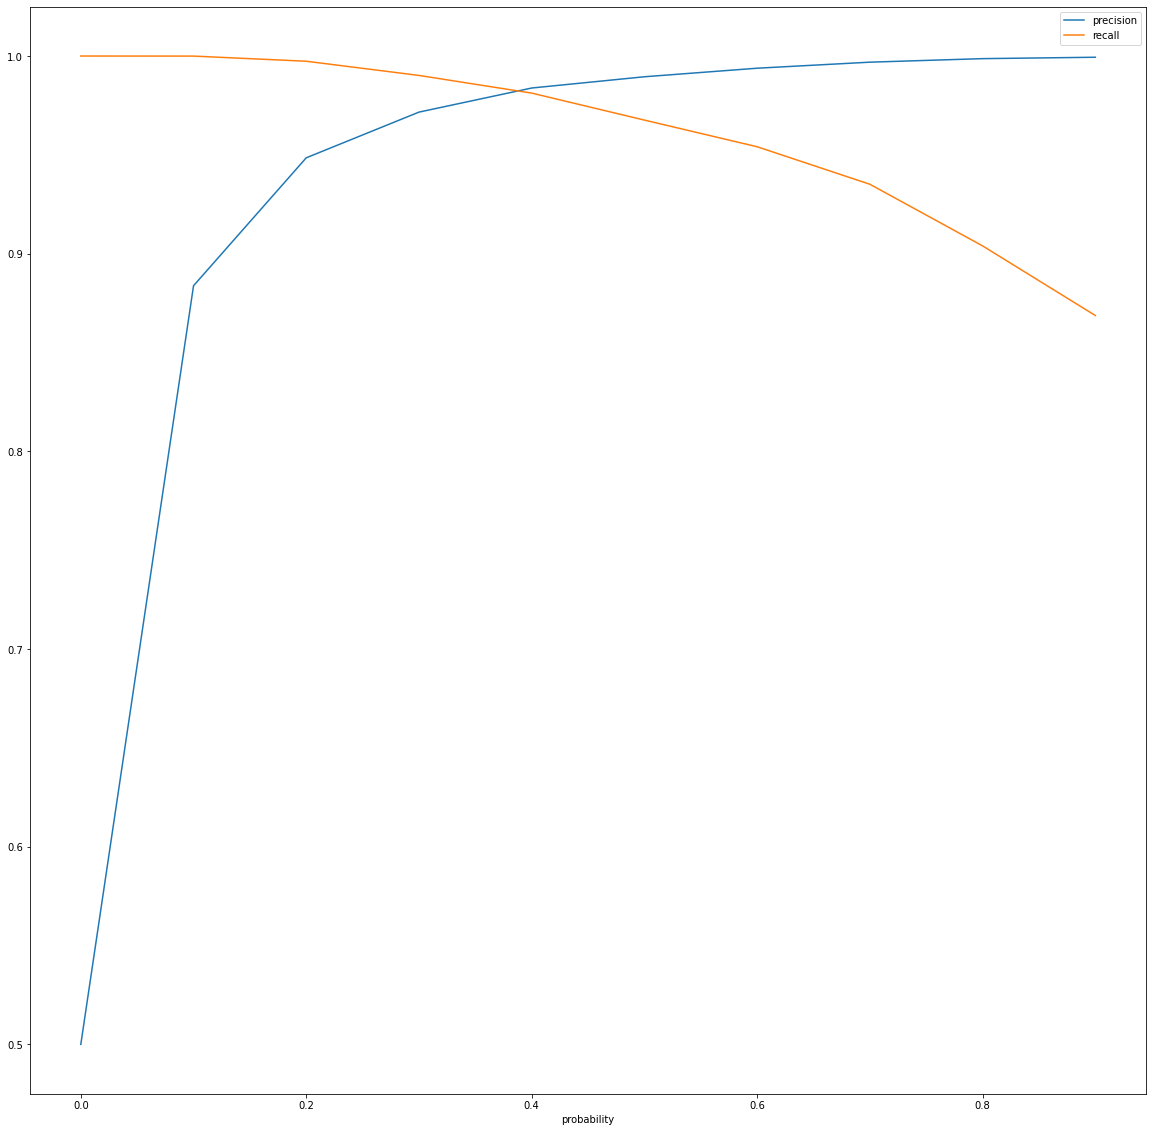

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(5,5))
cutoff_df1.plot.line(x='probability', y=['precision','recall'])
plt.show()

In [120]:
#Selecting the cut-off probability as 0.4 and predicting for Churn.
xgb_df['Final_predicted'] = xgb_df.Predicted_probability.map( lambda x: 1 if x > 0.4 else 0)
xgb_df.head()

,Predicted_probability,Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0.013810,0,1,0,0,0,0,0,0,0,0,0,0
1,0.058601,0,1,0,0,0,0,0,0,0,0,0,0
2,0.033450,0,1,0,0,0,0,0,0,0,0,0,0
3,0.996567,1,1,1,1,1,1,1,1,1,1,1,1
4,0.998532,1,1,1,1,1,1,1,1,1,1,1,1


In [121]:
y_pred_test = model.predict_proba(X_test)
y_pred_test[:10]

array([[0.9927438 , 0.00725624],
       [0.98427016, 0.01572984],
       [0.99138993, 0.00861007],
       [0.9903236 , 0.00967642],
       [0.99276066, 0.00723935],
       [0.98413724, 0.01586275],
       [0.9804747 , 0.0195253 ],
       [0.9354985 , 0.06450153],
       [0.9851006 , 0.01489935],
       [0.9931196 , 0.00688039]], dtype=float32)

In [0]:
xgb_test_df = pd.DataFrame(y_pred_test[:, 1],columns=["Predicted_probability"])

In [0]:
xgb_test_df['y_test'] = y_test.values

In [124]:
xgb_test_df

,Predicted_probability,y_test
0,0.007256,0
1,0.015730,0
2,0.008610,0
3,0.009676,0
4,0.007239,0
...,...,...
85435,0.014778,0
85436,0.023526,0
85437,0.004854,0
85438,0.010358,0


In [126]:
#Selecting the cut-off probability as 0.4 and predicting for Churn.
xgb_test_df['Final_predicted'] = xgb_test_df.Predicted_probability.map( lambda x: 1 if x > 0.4 else 0)
xgb_test_df.head()

,Predicted_probability,y_test,Final_predicted
0,0.007256,0,0
1,0.015730,0,0
2,0.008610,0,0
3,0.009676,0,0
4,0.007239,0,0


In [135]:
# Printing classification report
print(classification_report(y_test, xgb_test_df.Final_predicted))
print(metrics.accuracy_score(y_test, xgb_test_df.Final_predicted))
# find precision score and recall score
precisionScore = precision_score(y_test, xgb_test_df.Final_predicted)
print('Precision score is:',precisionScore)
recallScore = recall_score(y_test, xgb_test_df.Final_predicted)
print('Recall score is:',recallScore)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85280
           1       0.09      0.91      0.16       160

    accuracy                           0.98     85440
   macro avg       0.54      0.95      0.57     85440
weighted avg       1.00      0.98      0.99     85440

0.9815191947565544
Precision score is: 0.0853302162478083
Recall score is: 0.9125


In [127]:
confusion_xgb = confusion_matrix(xgb_test_df['y_test'],xgb_test_df['Final_predicted'])
confusion_xgb

array([[83715,  1565],
       [   14,   146]])

In [0]:
TP = confusion_xgb[1,1] # true positive 
TN = confusion_xgb[0,0] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

[[83715  1565]
 [   14   146]]


Text(0.5, -3.0, 'Predicted label')

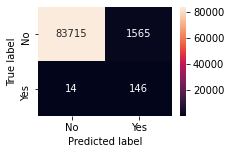

In [136]:
# Confusion matrix 
confusion_xgb = confusion_matrix(xgb_test_df['y_test'],xgb_test_df['Final_predicted'])
print(confusion_xgb)

plt.figure(figsize=(3,2))
sns.heatmap(confusion_xgb, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [129]:
#Sensitivity / Recall
TP / float(TP + FN)

0.9125

In [130]:
#Specificity
TN / float(TN + FP)

0.9816486866791745

In [131]:
#Precision
TP / float(TP + FP)

0.0853302162478083

<font color = 'purple'> <b> `XGBOOST ON SMOTE OVERSAMPLED DATASET-TEST` </b> <br>
`Precision`            -> 8.5% <br>
`Recall`/`Sensitivity` -> 91% <br>
`Specificity`          -> 98.1% 

In [ ]:
# Storing all metics in the model metrics data frame
trainAccuracy = metrics.accuracy_score(y_train_smote_sampled, y_train_pred_rf_smote)
trainPrecision = precision_score(y_train_smote_sampled, y_train_pred_rf_smote)
trainRecall = recall_score(y_train_smote_sampled, y_train_pred_rf_smote)
testAccuracy = metrics.accuracy_score(y_test, y_test_pred_rf_smote)
testPrecision = precision_score(y_test, y_test_pred_rf_smote)
testRecall = recall_score(y_test, y_test_pred_rf_smote)

params = 'n_estimators=200,max_depth=8,max_features=14,min_samples_leaf=150,min_samples_split=200'
#Adding metrics into the dataframe
dfAllModelMetrics.loc[dfAllModelMetrics.shape[0]] = ['Random_Forest_SMOTE_Tuned', params, 
                TN, FP, FN, TP,
                trainAccuracy,trainPrecision,trainRecall,
                testAccuracy,testPrecision,testRecall]

dfAllModelMetrics.head()

We can see that XGBoost seems to perform well subjected to the Recall metric with 91% on test as compared to Logistic Regression and even Random Forest model but there is a clear trade off between the precision and recall values here. To avoid possible overfitting on the data we selected the cut off probability of 0.1 on the test dataset as well which we selected based on the metrics on train sets. The precision we got is around 8.5% which is to the lower side in comparison with the Random Forest and KNN models.

_______________________________________________________________________

# <font color='purple'>Bayesian Optimization - XGB</font>

In [56]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning':0})

from sklearn.model_selection import StratifiedKFold

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from imblearn.combine import SMOTETomek,SMOTEENN

import lightgbm as lgb

import xgboost as xgb
from xgboost.sklearn import XGBClassifier


from sklearn.metrics import roc_auc_score,classification_report

import warnings
warnings.filterwarnings('ignore')

!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

In [0]:
y_train_df = pd.DataFrame(y_train)

In [0]:
# Scaling weight = Ratio of number of 0's to 1's so it can scale the weight of 1's
scale_pos_weight_factor = y_train[y_train_df.Class==0].shape[0] / y_train[y_train_df.Class==1].shape[0]

In [0]:
def xgb_best_params(X,y,opt_params,init_points=10, optimization_round=5, n_folds=3, random_seed=0, cv_estimators=600): 
    # prepare dataset
    training_data = xgb.DMatrix(X, y)
    
    def xgb_run(learning_rate,max_depth,min_child_weight,gamma,subsample,colsample_bytree,reg_alpha,reg_lambda):
        params = {'objective':'binary:logistic','n_estimators':cv_estimators,'scale_pos_weight':scale_pos_weight_factor ,'early_stopping_round':int(cv_estimators/20), 'metric':'auc'}
        params["gamma"] = gamma
        params['subsample'] = subsample
        params['colsample_bytree'] = colsample_bytree
        params['max_depth'] = int(round(max_depth))
        params['reg_alpha'] = reg_alpha
        params['reg_lambda'] = reg_lambda
        params['min_child_weight'] = int(min_child_weight)
        params['learning_rate'] = learning_rate
        cv_result = xgb.cv(params, training_data, nfold=n_folds, seed=random_seed ,stratified=True,shuffle=True ,verbose_eval =int(cv_estimators/20),num_boost_round=cv_estimators, metrics='auc')

        return cv_result['test-auc-mean'].max()
    
    
    params_finder = BayesianOptimization(xgb_run, opt_params, random_state=100)
    # optimize
    params_finder.maximize(init_points=init_points, n_iter=optimization_round)

    # return best parameters
    return params_finder.max

In [0]:
folds = 3

bounds = {
    'learning_rate': (0.002, 0.2),
    'max_depth':(1,20),
    'min_child_weight':(1,100),
    'gamma':(0,1),
    'subsample':(0.1,1),
    'colsample_bytree':(0.1,0.8),
    'reg_alpha':(0.1,20),
    'reg_lambda':(0.1,20)
}

In [0]:
#a = []
#while(1):
#    a.append('1000000')

In [61]:
best_params= []
cv_estimators = [500]
optimization_round = 10
init_points = 10
random_seed = 0
    
    
for cv_estimator in cv_estimators:
    opt_params = xgb_best_params(X, y,bounds, init_points=init_points, optimization_round=optimization_round, n_folds=folds, random_seed=random_seed, cv_estimators=cv_estimator)
    opt_params['params']['iteration'] = cv_estimator
    opt_params['params']['fold'] = folds
    opt_params['params']['auc'] = opt_params['target']
    best_params.append(opt_params['params'])


|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
[0]	train-auc:0.993003+0.00185677	test-auc:0.949453+0.0128131
[25]	train-auc:0.999895+1.0403e-05	test-auc:0.978105+0.0048792
[50]	train-auc:0.999891+1.32749e-05	test-auc:0.980136+0.00498605
[75]	train-auc:0.999948+1.69967e-06	test-auc:0.982739+0.00646399
[100]	train-auc:0.999979+2.16025e-06	test-auc:0.982473+0.00730152
[125]	train-auc:0.999993+8.16497e-07	test-auc:0.98279+0.00750317
[150]	train-auc:0.999996+1.24722e-06	test-auc:0.982976+0.00704922
[175]	train-auc:0.999998+1.24722e-06	test-auc:0.983205+0.00696206
[200]	train-auc:0.999999+8.16497e-07	test-auc:0.9829+0.00715653
[225]	train-auc:1+4.71405e-07	test-auc:0.98283+0.00690779
[250]	train-auc:1+4.71405e-07	test-auc:0.98284+0.00678921
[275]	train-auc:1+0	test-auc:0.982613+0.00705759
[300]	tra

In [71]:
max_auc = 0
max_auc_index = -1
for idx in range(0,len(best_params)):
  if best_params[idx]['auc'] > max_auc:
    max_auc = best_params[idx]['auc']
    max_auc_index = idx

xgb_best_params = best_params[max_auc_index]

print('***** PARAMETERS WITH TOP AUC SCORE *****')
for key in xgb_best_params:
  print(key,':',xgb_best_params[key])

KeyError: ignored

In [72]:
xgb_best_params

{'colsample_bytree': 0.486762459401864,
 'fold': 3,
 'gamma': 0.45887258329793945,
 'iteration': 500,
 'learning_rate': 0.029765811767616952,
 'max_depth': 18.529079919204676,
 'min_child_weight': 1.5063862931736682,
 'reg_alpha': 0.6062312973063103,
 'reg_lambda': 15.839995310627312,
 'subsample': 0.4170693072022591}

In [0]:
xgb_tuned_params = xgb_best_params.copy()
del xgb_tuned_params['auc']
xgb_tuned_params['metric'] = 'auc'
xgb_tuned_params['max_depth'] = int(xgb_tuned_params['max_depth'])
xgb_tuned_params['min_child_weight'] = int(xgb_tuned_params['min_child_weight'])

In [0]:
training_data = xgb.DMatrix(X_train, y_train)
xgb_tuned_model = xgb.train(xgb_tuned_params,training_data)

In [0]:
xgb_train_data = xgb.DMatrix(X_train[X.columns])
y_train_pred_bo_xgb = xgb_tuned_model.predict(xgb_train_data)

In [0]:
xgb_test_data = xgb.DMatrix(X_test[X.columns])
y_test_pred_bo_xgb = xgb_tuned_model.predict(xgb_test_data)

In [92]:
print(roc_auc_score(y_train,y_train_pred_bo_xgb))

0.916837182471035


In [91]:
print(roc_auc_score(y_test,y_test_pred_bo_xgb))

0.9246289428939963


In [94]:
# Lets create a data frame with Original Class values and predicted Class probability values 
y_train_pred_bo_xgb_final = pd.DataFrame({'Class':y_train, 'Class_Prob':y_train_pred_bo_xgb})
y_test_pred_bo_xgb_final = pd.DataFrame({'Class':y_test, 'Class_Prob':y_test_pred_bo_xgb})
y_train_pred_bo_xgb_final.head()

,Class,Class_Prob
145629,0,0.369732
169195,0,0.369732
233827,0,0.369732
31406,0,0.369732
244108,0,0.369732


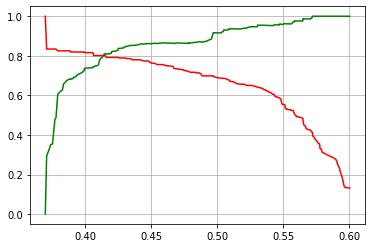

In [96]:
# Precison - recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_bo_xgb_final.Class, y_train_pred_bo_xgb_final.Class_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid(b=None, which='major', axis='both')
plt.show()

In [0]:
# Lets see how the predicted values turn out with 42% probability cut off
y_train_pred_bo_xgb_final['Class_Pred'] = y_train_pred_bo_xgb_final.Class_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_test_pred_bo_xgb_final['Class_Pred'] = y_test_pred_bo_xgb_final.Class_Prob.map(lambda x: 1 if x > 0.42 else 0)

[[198969     58]
 [    69    263]]


Text(0.5, -3.0, 'Predicted label')

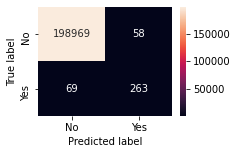

In [99]:
# Confusion matrix for training
confusion = metrics.confusion_matrix(y_train_pred_bo_xgb_final.Class, y_train_pred_bo_xgb_final.Class_Pred)
print(confusion)

plt.figure(figsize=(3,2))
sns.heatmap(confusion, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

[[85244    36]
 [   33   127]]


Text(0.5, -3.0, 'Predicted label')

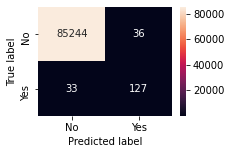

In [121]:
# Confusion matrix for test
confusion = metrics.confusion_matrix(y_test_pred_bo_xgb_final.Class, y_test_pred_bo_xgb_final.Class_Pred)
print(confusion)

plt.figure(figsize=(3,2))
sns.heatmap(confusion, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [0]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [0]:
# Storing all metics in the model metrics data frame
trainAccuracy = metrics.accuracy_score(y_train_pred_bo_xgb_final.Class, y_train_pred_bo_xgb_final.Class_Pred)
trainPrecision = precision_score(y_train_pred_bo_xgb_final.Class, y_train_pred_bo_xgb_final.Class_Pred)
trainRecall = recall_score(y_train_pred_bo_xgb_final.Class, y_train_pred_bo_xgb_final.Class_Pred)
testAccuracy = metrics.accuracy_score(y_test_pred_bo_xgb_final.Class, y_test_pred_bo_xgb_final.Class_Pred)
testPrecision = precision_score(y_test_pred_bo_xgb_final.Class, y_test_pred_bo_xgb_final.Class_Pred)
testRecall = recall_score(y_test_pred_bo_xgb_final.Class, y_test_pred_bo_xgb_final.Class_Pred)

#Adding metrics into the dataframe
dfAllModelMetrics.loc[dfAllModelMetrics.shape[0]] = ['XGB_Bayesian_Optimization_Tuned', str(xgb_tuned_params), 
                TN, FP, FN, TP,
                trainAccuracy,trainPrecision,trainRecall,
                testAccuracy,testPrecision,testRecall]

In [124]:
dfAllModelMetrics.head()

,ModelName,Hyperparams,TestTN,TestFP,TestFN,TestTP,TrainAccuracy,TrainPrecision,TrainRecall,TestAccuracy,TestPrecision,TestRecall
0,XGB_Bayesian_Optimization_Tuned,"{'colsample_bytree': 0.486762459401864, 'gamma...",85244,36,33,127,0.999363,0.819315,0.792169,0.999192,0.779141,0.79375


# <font color='purple'>Bayesian Optimization with lightGBM</font>

In [68]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning':0})
from sklearn.model_selection import StratifiedKFold

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from imblearn.combine import SMOTETomek,SMOTEENN
import lightgbm as lgb

#import xgboost as xgb
#from xgboost.sklearn import XGBClassifier


from sklearn.metrics import roc_auc_score,classification_report

import warnings
warnings.filterwarnings('ignore')

#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
import lightgbm as lgb

In [109]:
y_train_df = pd.DataFrame(y_train)
# Scaling weight = Ratio of number of 0's to 1's so it can scale the weight of 1's
scale_pos_weight_factor = y_train[y_train_df.Class==0].shape[0] / y_train[y_train_df.Class==1].shape[0]
print('scale_pos_weight_factor value:',scale_pos_weight_factor)

scale_pos_weight_factor value: 599.4789156626506


In [0]:
def lightgbm_best_params(X, y,opt_params,init_points=10, optimization_round=5, n_folds=3, random_seed=0, cv_estimators=500): 
    # prepare dataset
    training_data = lgb.Dataset(X_train, y_train)
    
    def lightgbm_run(max_depth,
                     num_leaves,
                     #colsample_bytree,
                     reg_alpha,  #also called lambdal1
                     reg_lambda, # also called lambdal2
                     min_child_samples, #Minimum number of data needed in a child (leaf).
                     learning_rate,
                     feature_fraction
                     ): 
        params = {'objective':'binary',
                  'n_estimators':cv_estimators, #Number of boosted trees to fit.
                  'early_stopping_round':int(cv_estimators/20),
                  'metric':'auc',
                  'subsample_freq':5, #Frequence of subsample - Need to understand more (<=0 means no enable.)
                  'bagging_seed':42,
                  'verbosity':-1,
                  'num_threads':20,
                  #Not using class_weight as per documentation; since class_weight is for multi class classification. For binary classification
                  #can use is_unbalance = True OR scale_pos_weight parameter. Using is_unbalance
                  'is_unbalance':True 
                  }
        params['max_depth'] = int(round(max_depth))
        params['num_leaves'] = int(round(num_leaves))
        #params['colsample_bytree'] = colsample_bytree
        params['reg_alpha'] = reg_alpha
        params['reg_lambda'] = reg_lambda
        params['min_child_samples'] = int(min_child_samples) 
        # params['min_data_in_leaf'] = int(min_data_in_leaf)
        params['learning_rate'] = learning_rate
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        cv_result = lgb.cv(params,
                           training_data,
                           nfold=n_folds,
                           seed=random_seed,
                           stratified=True,
                           metrics=['auc'])

        print('cv_result',cv_result)
        return max(cv_result['auc-mean'])
    
    
    params_finder = BayesianOptimization(lightgbm_run, opt_params, random_state=100)
    # optimize
    params_finder.maximize(init_points=init_points, n_iter=optimization_round)

    # return best parameters
    return params_finder.max

In [0]:
bounds = {
    'max_depth':(3,40),
    'num_leaves':(25, 4000), #Maximum tree leaves for base learners.
    #'colsample_bytree':(0.1,0.8),
    'reg_alpha':(0.1,20),
    'reg_lambda':(0.1,20),
    'min_child_samples':(50, 4000),
    'learning_rate': (0.002, 0.2),
    'feature_fraction':(0.1,1) #Alias colsample_bytree, sub_feature -> helps reduce overfitting and increase speed, let me use only 10 to 80% of features
}

In [0]:
best_params= []
cv_estimators = [200,400,600,800,1000]
optimization_round = 10
init_points = 10
random_seed = 0
folds = 3

In [122]:
for cv_estimator in cv_estimators:
    opt_params = lightgbm_best_params(X_train,
                                 y_train,
                                 bounds,
                                 init_points=init_points,
                                 optimization_round=optimization_round,
                                 n_folds=folds,
                                 random_seed=random_seed,
                                 cv_estimators=cv_estimator)
    print(opt_params)
    opt_params['params']['iteration'] = cv_estimator
    opt_params['params']['fold'] = folds
    opt_params['params']['auc'] = opt_params['target']
    best_params.append(opt_params['params'])
    print('best_params as of now:',best_params)

|   iter    |  target   | featur... | learni... | max_depth | min_ch... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------
cv_result {'auc-mean': [0.95061402315061], 'auc-stdv': [0.010918748240734365]}
|  1        |  0.9506   |  0.5891   |  0.05712  |  18.71    |  3.387e+0 |  43.76    |  2.519    |  13.45    |
cv_result {'auc-mean': [0.9442230250947734, 0.3758283345299727, 0.9390555929711101, 0.3824978517406332, 0.9389883035024953, 0.9468867245265019, 0.9457001423814329, 0.670114806091647, 0.9467215385013952, 0.9472063741592641, 0.9468159686342577, 0.9472755741705039], 'auc-stdv': [0.008271938594467237, 0.2910909519056368, 0.004946400320557945, 0.4016640145053634, 0.010951564660016585, 0.009031174674572552, 0.009045860480361954, 0.39786765219472603, 0.010538046263368694, 0.011868776803051064, 0.011561059878333354, 0.011870545077884468]}
|  2        |  0.9473   |  0.8433   |  0.02907  |  24.

In [130]:
max_auc = 0
max_auc_index = -1
for idx in range(0,len(best_params)):
  if best_params[idx]['auc'] > max_auc:
    max_auc = best_params[idx]['auc']
    max_auc_index = idx

gbm_best_params = best_params[max_auc_index]

print('***** PARAMETERS WITH TOP AUC SCORE *****')
for key in gbm_best_params:
  print(key,':',gbm_best_params[key])

***** PARAMETERS WITH TOP AUC SCORE *****
feature_fraction : 0.34656029527679055
learning_rate : 0.0043197999565058355
max_depth : 4.227606970572611
min_child_samples : 2822.1162509755995
num_leaves : 242.19669807524062
reg_alpha : 19.4971353643036
reg_lambda : 19.92135459893443
iteration : 200
fold : 3
auc : 0.9774313773219699


In [0]:
gbm_tuned_params = gbm_best_params.copy()
del gbm_tuned_params['auc']
gbm_tuned_params['metric'] = 'auc'
gbm_tuned_params['max_depth'] = int(gbm_tuned_params['max_depth'])
gbm_tuned_params['num_leaves'] = int(gbm_tuned_params['num_leaves'])
gbm_tuned_params['min_child_samples'] = int(gbm_tuned_params['min_child_samples'])

In [0]:
training_data = lgb.Dataset(X_train, y_train)
gbm_tuned_model = lgb.train(gbm_tuned_params,training_data)

In [0]:
y_train_pred_bo_gbm = gbm_tuned_model.predict(X_train)
y_test_pred_bo_gbm = gbm_tuned_model.predict(X_test)

In [152]:
print(roc_auc_score(y_train,y_train_pred_bo_gbm))

0.9716104087348809


In [153]:
print(roc_auc_score(y_test,y_test_pred_bo_gbm))

0.968070363801595


In [154]:
# Lets create a data frame with Original Class values and predicted Class probability values 
y_train_pred_bo_gbm_final = pd.DataFrame({'Class':y_train, 'Class_Prob':y_train_pred_bo_gbm})
y_test_pred_bo_gbm_final = pd.DataFrame({'Class':y_test, 'Class_Prob':y_test_pred_bo_gbm})
y_train_pred_bo_gbm_final.head()

,Class,Class_Prob
145629,0,0.001118
169195,0,0.001118
233827,0,0.001165
31406,0,0.001118
244108,0,0.001123


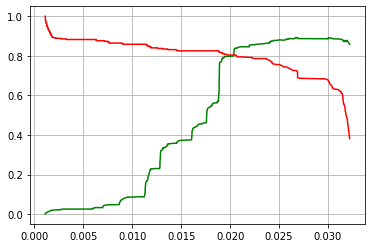

In [157]:
# Precison - recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_bo_gbm_final.Class, y_train_pred_bo_gbm_final.Class_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid(b=None, which='major', axis='both')
plt.show()

In [0]:
# Lets see how the predicted values turn out with 2% probability cut off (0.02)
y_train_pred_bo_gbm_final['Class_Pred'] = y_train_pred_bo_gbm_final.Class_Prob.map(lambda x: 1 if x > 0.02 else 0)
y_test_pred_bo_gbm_final['Class_Pred'] = y_test_pred_bo_gbm_final.Class_Prob.map(lambda x: 1 if x > 0.02 else 0)

[[198960     67]
 [    65    267]]


Text(0.5, -3.0, 'Predicted label')

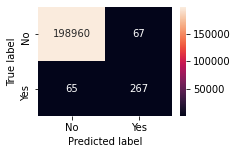

In [198]:
# Confusion matrix for training
confusion = metrics.confusion_matrix(y_train_pred_bo_gbm_final.Class, y_train_pred_bo_gbm_final.Class_Pred)
print(confusion)

plt.figure(figsize=(3,2))
sns.heatmap(confusion, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

[[85244    36]
 [   30   130]]


Text(0.5, -3.0, 'Predicted label')

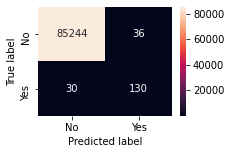

In [200]:
# Confusion matrix for test
confusion = metrics.confusion_matrix(y_test_pred_bo_gbm_final.Class, y_test_pred_bo_gbm_final.Class_Pred)
print(confusion)

plt.figure(figsize=(3,2))
sns.heatmap(confusion, annot=True, xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [0]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [0]:
# Storing all metics in the model metrics data frame
trainAccuracy = metrics.accuracy_score(y_train_pred_bo_gbm_final.Class, y_train_pred_bo_gbm_final.Class_Pred)
trainPrecision = precision_score(y_train_pred_bo_gbm_final.Class, y_train_pred_bo_gbm_final.Class_Pred)
trainRecall = recall_score(y_train_pred_bo_gbm_final.Class, y_train_pred_bo_gbm_final.Class_Pred)
testAccuracy = metrics.accuracy_score(y_test_pred_bo_gbm_final.Class, y_test_pred_bo_gbm_final.Class_Pred)
testPrecision = precision_score(y_test_pred_bo_gbm_final.Class, y_test_pred_bo_gbm_final.Class_Pred)
testRecall = recall_score(y_test_pred_bo_gbm_final.Class, y_test_pred_bo_gbm_final.Class_Pred)

#Adding metrics into the dataframe
dfAllModelMetrics.loc[dfAllModelMetrics.shape[0]] = ['LightGBM_Bayesian_Optimization_Tuned', str(gbm_tuned_params), 
                TN, FP, FN, TP,
                trainAccuracy,trainPrecision,trainRecall,
                testAccuracy,testPrecision,testRecall]

In [206]:
dfAllModelMetrics.head()

,ModelName,Hyperparams,TestTN,TestFP,TestFN,TestTP,TrainAccuracy,TrainPrecision,TrainRecall,TestAccuracy,TestPrecision,TestRecall
0,LightGBM_Bayesian_Optimization_Tuned,"{'feature_fraction': 0.34656029527679055, 'lea...",85244,36,30,130,0.999338,0.799401,0.804217,0.999228,0.783133,0.8125


__________________________________

### COST BENEFIT ANALYSIS

Models in hand and corresponding metrics on TEST set. <br>

|  | Model Details | Recall/Sensitivity | Precision | Specificity |
| --- | --- | --- | --- | --- |
| Imbalanced | Decision Tree | 63% | 86% | 99.9% |
| Imbalanced | Random Forest | 69% | 83% | 99.9% |
| Imbalanced | Logistic Regression | 79% | 77% | 99.9% |
| Imbalanced | KNN with n-neighbors=5 | 79% | 93% | 99.9% |
|<b> Imbalanced |<b> XGBoost |<b> 86% |<b> 76% |<b> 99.9% |
| Balanced with ADASYN | Logistic Regression | 93% | 2% | 86% |
| Balanced with ADASYN | Random Forest | 93% | 5% | 97% |
| Balanced with ADASYN | XGBoost | 93% | 6% | 97% |
| Random OverSampling | Random Forest | 89% | 16% | 99% |
| Balanced with SMOTE | Logistic Regression | 89% | 2% | 91% |
| Balanced with SMOTE | Random Forest | 89% | 18% | 99% |
| Balanced with SMOTE | XGBoost | 91% | 9% | 98% |
|<b> Bayesian Optimisation |<b> XGBoost |<b> 79% |<b> 78% |<b> 99% |
|<b> Bayesian Optimisation |<b> Light GBM |<b> 81% |<b> 78% |<b> 99% |

Out of all the models listed above, with the metric Recall in consideration, we could find a couple of good models from the list. Among these some of the models especially the one built on ADASYN and SMOTE are having a recall value, but with a serious trade-off on the precision value. Since we are selecting a good model which predicts fraudulent transactions as much as possible but also with a good precision, we can shortlist a couple of models (which are as highlighted bold). <br>
Out of these three models, we can further narrow down and select the XGBoost model ran on unbalanced dataset which offers the below given metric - <br>
 - Recall - 86%
 - Precision - 76%
 - Specificity - 99.9%

<b>`xgb_test_df_ca`</b> is the final dataframe we have, containing the y_test values,predicted probability and the predicted y values selected using cut-off probability for the <b>`XGBoost model on Imbalanced dataset`</b>. <br>
Also, we are having a copy of both X_test and y_test.

In [86]:
xgb_test_df_ca.head()

,Predicted_probability,y_test,Final_predicted
0,0.000058,0,0
1,0.000403,0,0
2,0.000086,0,0
3,0.000084,0,0
4,0.000134,0,0


In [84]:
X_test_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212740,2.068522,-0.763198,-0.654918,-0.334647,-0.947186,-0.983274,-0.442618,-0.260828,-0.343791,0.796048,-0.861236,0.321081,0.641446,-0.056812,0.119496,-1.307872,-0.140464,0.393875,-0.596986,-0.516713,-0.827910,-1.917449,0.583887,-0.028829,-0.799033,0.036258,-0.038878,-0.036134,43.90
154346,2.036922,0.023155,-0.471931,1.275265,0.083998,0.182638,-0.555893,-0.096274,2.148027,-0.171912,-0.739899,-2.184860,2.690272,1.228404,0.078777,0.641304,-0.424830,0.777143,-0.645954,-0.228374,0.016617,0.515827,0.022537,-1.119391,0.040120,-0.534139,0.038002,-0.046629,1.00
35996,-0.459392,-0.763853,2.350380,-0.992721,-1.794539,0.361548,-0.537123,0.181925,-1.822392,0.784690,-0.791235,-1.088087,-0.443233,-0.880435,-0.625848,-1.971558,1.994371,-0.471047,0.983117,-0.034821,-0.138613,0.150847,-0.008393,0.397845,0.216331,0.100330,0.114244,0.081745,96.12
281513,1.796733,-0.648913,-1.453157,0.056731,0.558043,0.983920,-0.206730,0.247666,1.136501,-0.376774,-0.480659,0.687572,-0.214647,0.151602,0.446765,-1.526636,0.795936,-1.798353,-0.851965,-0.184450,0.195013,0.812871,0.093185,-0.284402,-0.028336,0.255063,0.008879,-0.056096,71.95
228150,2.124100,0.069050,-1.740184,0.069000,0.730254,-0.424721,0.273231,-0.323711,0.406888,-0.043532,-1.041400,0.829515,1.685633,0.142051,0.721743,-0.110941,-0.812083,-0.068522,-0.035876,-0.101491,0.216388,0.832989,-0.063533,0.101378,0.415883,-0.101012,-0.012868,-0.055943,2.69


In [115]:
cost_analysis_df = xgb_test_df_ca.copy()

In [117]:
cost_analysis_df['Amount'] = X_test_copy['Amount'].values

In [119]:
#Final cost analsys dataframe after combining the df having y_test and pred values with the Amount column.
cost_analysis_df.head()

,Predicted_probability,y_test,Final_predicted,Amount
0,0.000058,0,0,43.90
1,0.000403,0,0,1.00
2,0.000086,0,0,96.12
3,0.000084,0,0,71.95
4,0.000134,0,0,2.69


In [120]:
#We can drop the probability column which is not needed.
cost_analysis_df.drop(['Predicted_probability'],axis=1,inplace=True)

In [121]:
cost_analysis_df.head()

,y_test,Final_predicted,Amount
0,0,0,43.90
1,0,0,1.00
2,0,0,96.12
3,0,0,71.95
4,0,0,2.69


In [122]:
confusion_cost_analysis = confusion_matrix(cost_analysis_df['y_test'],cost_analysis_df['Final_predicted'])

In [123]:
confusion_cost_analysis

array([[85236,    44],
       [   23,   137]], dtype=int64)

In [124]:
TP = confusion_cost_analysis[1,1] # true positive 
TN = confusion_cost_analysis[0,0] # true negatives
FP = confusion_cost_analysis[0,1] # false positives
FN = confusion_cost_analysis[1,0] # false negatives

In [125]:
Total_fraud_predictions = TP + FP
Total_fraud_predictions

181

We can create a function `confusion_col` to create a column marking the status of prediction for each record in test.

In [130]:
def confusion_col(s):
    if(s['y_test']==1 and s['Final_predicted']==1):
        return 'TP'
    elif(s['y_test']==0 and s['Final_predicted']==0):
        return 'TN'
    if(s['y_test']==0 and s['Final_predicted']==1):
        return 'FP'
    elif(s['y_test']==1 and s['Final_predicted']==0):
        return 'FN'

In [131]:
cost_analysis_df['Confusion_label'] = cost_analysis_df.apply(confusion_col,axis=1)

In [137]:
cost_analysis_df.head()

,y_test,Final_predicted,Amount,Confusion_label
0,0,0,43.90,TN
1,0,0,1.00,TN
2,0,0,96.12,TN
3,0,0,71.95,TN
4,0,0,2.69,TN


Total amount of correct predictions made: TP x Cost of each transaction which is correctly predicted. <br> In other terms total amount of correct predictions would be summed amount where y_test and predicted value both are 1.

In [138]:
total_amnt_crct_pred = cost_analysis_df.loc[(cost_analysis_df['Confusion_label']=='TP'),'Amount'].sum()
total_amnt_crct_pred

13596.64

Similarly total amount of incorrect predictions made: FN x Cost of each transaction which is incorrectly predicted,are those which are actually of class 1 i.e. y_test=1 but our model incorrectly predicted as non-fraudulent i.e. predicted value 0.


In [139]:
total_amnt_incrct_pred = cost_analysis_df.loc[(cost_analysis_df['Confusion_label']=='FN'),'Amount'].sum()
total_amnt_incrct_pred

3450.0899999999997

In [140]:
Total_savings = round(total_amnt_crct_pred - ((Total_fraud_predictions * 10 ) + total_amnt_incrct_pred),3)

In [141]:
print(Total_savings)

8336.55


Hence the final savings made with our model is around 8336.55 Euros provided the call charges is in Euros.